<a href="https://colab.research.google.com/github/JoseDrube/Analisis-No-Supervisado-del-Dataset-Wine-Quality/blob/main/Proyecto_integrador_Data_Science_Wine_Quality_Drube_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science - ICARO
_________________________________
Proyecto integrador
_________________________________


# Introducción

El análisis de datos no supervisado representa una herramienta fundamental dentro de la Ciencia de Datos, ya que permite descubrir patrones ocultos y estructuras intrínsecas sin depender de etiquetas previamente definidas. En este proyecto se aborda el estudio del dataset Wine Quality, utilizando técnicas de clustering y reducción de dimensionalidad para explorar la organización natural de los datos a partir de sus características fisicoquímicas.

El trabajo comienza con una etapa de preparación y análisis exploratorio de datos (EDA), orientada a comprender la distribución de las variables, detectar posibles outliers y evaluar relaciones relevantes entre las features. Posteriormente, se implementan algoritmos de aprendizaje no supervisado, específicamente KMeans y DBSCAN, con el objetivo de identificar agrupaciones naturales que puedan reflejar diferencias entre los tipos de vino.

Para complementar el análisis, se aplican técnicas de reducción de dimensionalidad como PCA, t-SNE y UMAP, facilitando la visualización de estructuras complejas en espacios de menor dimensión. Estas metodologías no solo mejoran la interpretación de los resultados, sino que también permiten evaluar la calidad de los clusters desde una perspectiva visual.

En conjunto, este proyecto busca demostrar cómo la combinación de clustering y visualización avanzada puede generar insights valiosos sobre datasets multidimensionales, aportando una comprensión más profunda de la organización interna de los datos.



# Resumen del Proyecto

El presente proyecto tuvo como objetivo principal identificar patrones y agrupaciones naturales dentro del dataset Wine Quality mediante el uso de técnicas de aprendizaje no supervisado. Tras una adecuada preparación de los datos y un análisis exploratorio inicial, se aplicaron algoritmos de clustering para evaluar la existencia de estructuras subyacentes en función de las propiedades fisicoquímicas de los vinos.

Los resultados muestran que KMeans es el algoritmo más efectivo para este caso de estudio, logrando una separación clara en dos clusters que se corresponden en gran medida con los tipos de vino: blanco y tinto. Esto indica que las variables químicas contienen suficiente información para diferenciar naturalmente ambos grupos sin necesidad de etiquetas.

Por otro lado, no se observó una segmentación significativa en relación con la calidad del vino, ya que ambos clusters presentan distribuciones similares en esta variable. Esto sugiere que la calidad podría depender de factores más complejos o de relaciones no lineales que no se capturan completamente mediante estos métodos.

En términos de visualización, UMAP se destacó como la técnica más eficiente al equilibrar velocidad de procesamiento y preservación de la estructura global y local de los datos. Aunque t-SNE ofrece representaciones muy claras para presentaciones, su mayor costo computacional puede limitar su aplicabilidad en ciertos escenarios.

En conclusión, este trabajo evidencia el valor de las técnicas no supervisadas para revelar estructuras ocultas en los datos y resalta la importancia de combinar múltiples metodologías para obtener interpretaciones más robustas. Como línea futura, se podría profundizar en el feature engineering, explorar nuevos hiperparámetros o incorporar variables adicionales para mejorar la separación de los grupos y enriquecer el análisis.

## Objetivo:
- Aplicar un flujo de trabajo de Machine Learning de principio a fin para resolver un problema de clasificación y uno de regresión, utilizando el dataset "Wine Quality".

---

## Índice

1. [Imports y Configuración Inicial](#imports)
2. [Carga y Preparación de Datos](#carga)
3. [Análisis Exploratorio de Datos (EDA)](#eda)
4. [**Tarea 1: Clasificación (Predecir Tipo de Vino)**](#clasificacion)
    - 4.1. [Preparación de Datos para Clasificación](#prep_clasificacion)
    - 4.2. [Modelos Base de Clasificación](#modelos_base_clasificacion)
    - 4.3. [**(A COMPLETAR) Modelos Avanzados y Optimización**](#completar_clasificacion)
    - 4.4. [**(A COMPLETAR) Tabla de Resultados y Conclusión de Clasificación**](#conclusion_clasificacion)
5. [**Tarea 2: Regresión (Predecir Calidad del Vino)**](#regresion)
    - 5.1. [Preparación de Datos para Regresión](#prep_regresion)
    - 5.2. [Modelo Base de Regresión](#modelo_base_regresion)
    - 5.3. [**(A COMPLETAR) Modelos Avanzados y Optimización**](#completar_regresion)
    - 5.4. [**(A COMPLETAR) Tabla de Resultados y Conclusión de Regresión**](#conclusion_regresion)
6. [**(A COMPLETAR) Conclusiones Finales del Proyecto**](#final)

---


<a name="imports"></a>
## 1. Imports y Configuración Inicial
En esta primera celda, importaremos todas las librerías que necesitaremos para nuestro análisis.

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np
import random
from typing import List, Dict, Any
from abc import ABC, abstractmethod

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Modelos y Preprocesamiento
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
import time

# Métricas de evaluación
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             mean_absolute_error, roc_curve, auc, mean_squared_error, r2_score)


<a name="carga"></a>
## 2. Carga y Preparación de Datos
Vamos a cargar los dos datasets (vino tinto y vino blanco), añadiremos una columna para identificar el tipo de vino y luego los uniremos en un único DataFrame.

In [ ]:
# URLs de los datasets
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Carga de los dataframes
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

# Creación de la columna 'type'
df_red['type'] = 'red'
df_white['type'] = 'white'

# Unión de los dataframes
df_ori = pd.concat([df_red, df_white], axis=0)

# Reseteamos el índice
df_ori.reset_index(drop=True, inplace=True)

print("Forma del dataset combinado:", df_ori.shape)
print("\nPrimeras 5 filas:")
display(df_ori.head())

Forma del dataset combinado: (6497, 13)

Primeras 5 filas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
# Modifico nombres de las features para su claridad en espanol
df_ori = df_ori.rename(columns={'fixed acidity': 'Acidez Fija',
                        'volatile acidity': 'Acidez Volatil',
                        'citric acid': 'Acido Citrico',
                        'residual sugar': 'Azucar Residual',
                        'chlorides': 'Cloruros',
                        'free sulfur dioxide': 'SO2 Libre',
                        'total sulfur dioxide': 'SO2 Total',
                        'density': 'Densidad',
                        'sulphates': 'Sulfatos',
                        'alcohol': 'Alcohol',
                        'quality': 'Calidad',
                        'type': 'Tipo de Vino'})
display(df_ori.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


<a name="eda"></a>
## 3. Análisis Exploratorio de Datos (EDA)
Es fundamental entender nuestros datos antes de modelar. Realizaremos un análisis descriptivo y algunas visualizaciones clave.

In [ ]:
# Voy a trabajar con una copia del DataFrame original df_ori
df = df_ori.copy()

In [ ]:
# Información general y chequeo de nulos
print("Información del DataFrame:")
df.info()

print("\nEstadísticas Descriptivas:")
display(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Acidez Fija      6497 non-null   float64
 1   Acidez Volatil   6497 non-null   float64
 2   Acido Citrico    6497 non-null   float64
 3   Azucar Residual  6497 non-null   float64
 4   Cloruros         6497 non-null   float64
 5   SO2 Libre        6497 non-null   float64
 6   SO2 Total        6497 non-null   float64
 7   Densidad         6497 non-null   float64
 8   pH               6497 non-null   float64
 9   Sulfatos         6497 non-null   float64
 10  Alcohol          6497 non-null   float64
 11  Calidad          6497 non-null   int64  
 12  Tipo de Vino     6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

Estadísticas Descriptivas:


,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000



Valores nulos por columna:
Acidez Fija        0
Acidez Volatil     0
Acido Citrico      0
Azucar Residual    0
Cloruros           0
SO2 Libre          0
SO2 Total          0
Densidad           0
pH                 0
Sulfatos           0
Alcohol            0
Calidad            0
Tipo de Vino       0
dtype: int64


No se encuentran valores nulos en el dataset

### **Distribucion de variables**
Voy a ver como se distribuyen las variables. Con la presencia de 2 picos o más, realizaré kdeplots para ver si se puede deber a una diferencia marcada entre ambos tipos de vino.

En la distribucion de la Calidad del vino podemos ver que el vino tinto presenta su mayor cantidad de valores para la calificacion igual a 5, seguido muy cerca por la calificacion 6. Mientras que el vino blanco presenta mayor cantidad de valores para el valor 6, seguida por el 5 y luego 7.

--------------------------------------------------
**Tipo de Vino**

--------------------------------------------------

Quiero verificar como se distribuye la variable Type para ver el enfoque que utilizaré (balancear las clases o utilizacion de modelos para clases desbalanceadas).

In [ ]:
# Realizo un barplot para analizar la distribucion de la variable categorica Tipo de Vino
type_counts = df['Tipo de Vino'].value_counts(normalize=True).reset_index()
type_counts.columns = ['Tipo de Vino', 'proportion']
type_counts['proportion'] = type_counts['proportion'] * 100

fig = px.bar(type_counts, x='Tipo de Vino', y='proportion',
             title='Distribución Relativa del Tipo de Vino',
             labels={'Tipo de Vino': 'Tipo de Vino', 'proportion': 'Porcentaje'},
             color='Tipo de Vino',
             color_discrete_map={'red': '#B22222', 'white': '#9DC183'},
             )
fig.show()

Debido a que las clases se encuentran con un desbalance importante, no voy a generar datos sinteticos para balancear las clases, sino que usaré modelos que se ajusten a clases desbalanceadas.

--------------------------------------------------
**Quality**

--------------------------------------------------

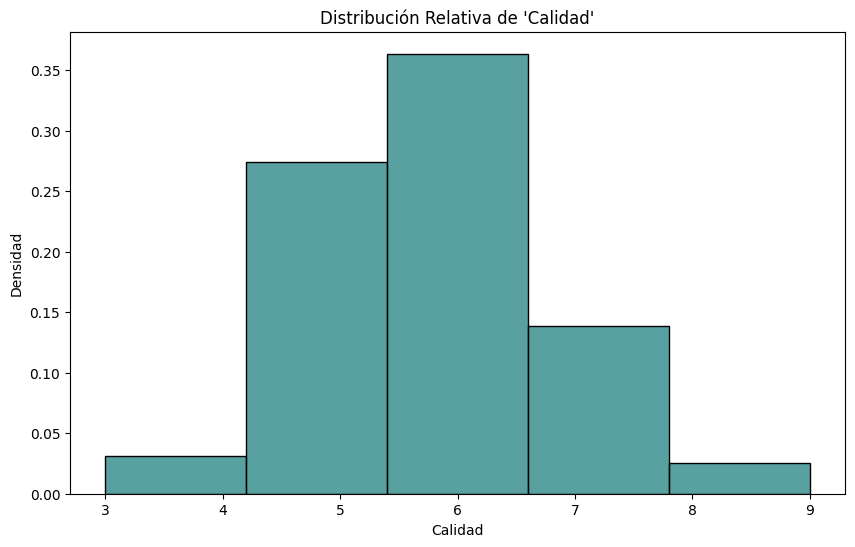

In [ ]:
# Realizo un histoplot para analizar la distribución de Calidad
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Calidad", bins=5 , stat='density', color='#228080')
plt.title("Distribución Relativa de 'Calidad'")
plt.xlabel("Calidad")
plt.ylabel("Densidad")
plt.show()

En base a este histograma podemos ver que la calidad que mas encontramos es la puntuada con 6, seguida por 5 y en menor proporcion 7.


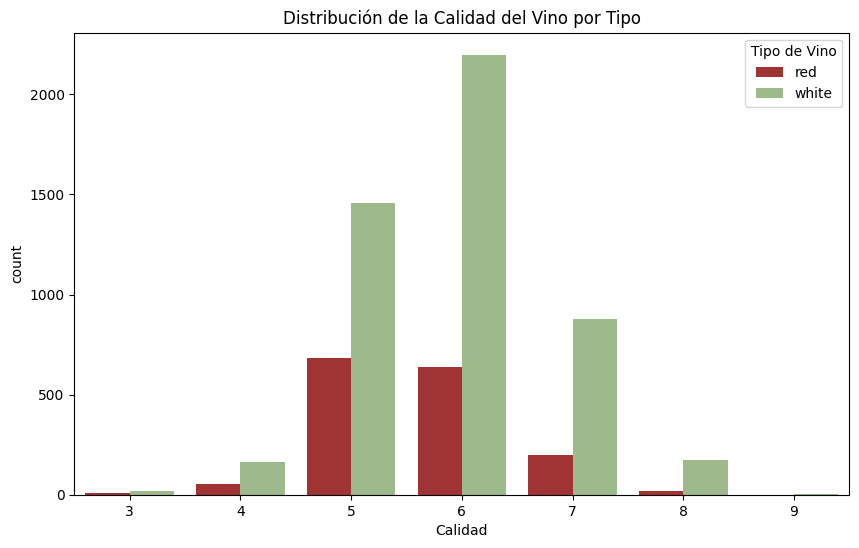

In [ ]:
# Distribución de la variable 'Calidad' por Tipo de Vino
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Calidad', hue='Tipo de Vino', palette={'red': '#B22222', 'white': '#9DC183'})
plt.xlabel('Calidad')
plt.title('Distribución de la Calidad del Vino por Tipo')
plt.show()

Cuando analizamos la distribucion de la Calidad por Tipo de Vino, vemos que para el vino tinto los valores mas encontrados son 5 y 6, casi con la misma cantidad. Luego en menor proporcion el 7 y 4, además se encuentran muy pocos casos en 3 y 8 pero ninguno en 9.

Para el vino blanco, tenemos en primer lugar en cantidad la calidad 6, en segundo 5 y en tercer lugar 7, las tres calidades separadas por una cantidad importante de valores. En menor proporcion tenemos 8 y 4, en ese orden, y pocos casos para 3 y 9.

--------------------------------------------------
**Acidez Fija**

--------------------------------------------------

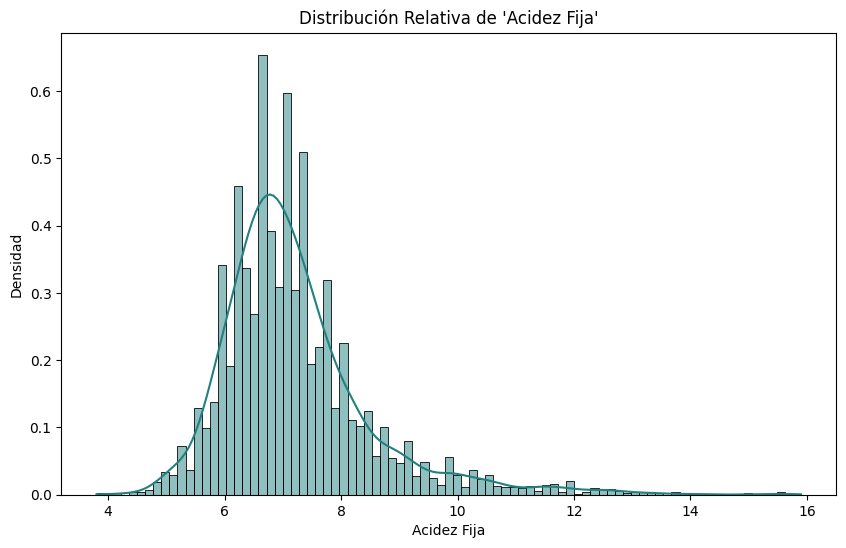

In [ ]:
# Realizo un histoplot para analizar la distribución de Acidez Fija
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Acidez Fija", kde=True, stat='density', color='#228080')
plt.title("Distribución Relativa de 'Acidez Fija'")
plt.xlabel("Acidez Fija")
plt.ylabel("Densidad")
plt.show()

La variable fixed acidity presenta una distribucion levemente sesgada hacia la derecha, alcanzando valores cercanos al 16, con una sola campana concentrada aproximadamente entre los valores 6 y 8.

--------------------------------------------------
**Acidez Volatil**

--------------------------------------------------

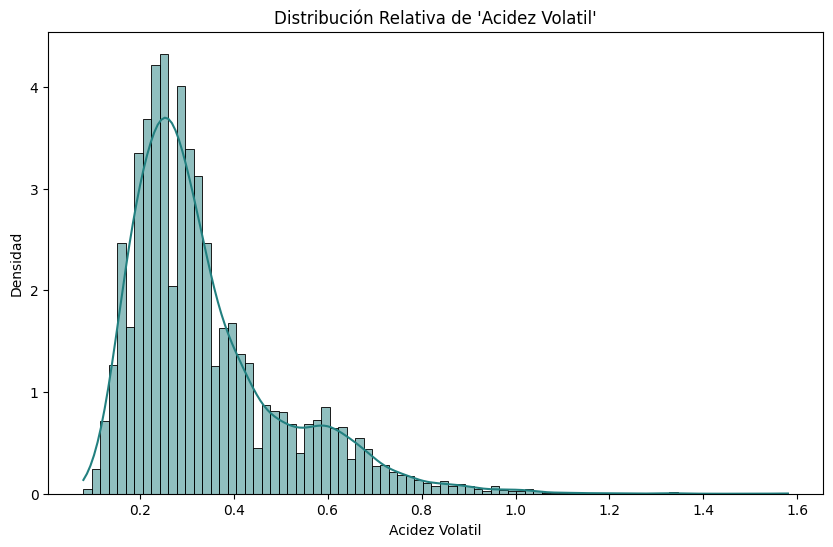

In [ ]:
# Realizo un histoplot para analizar la distribución de Acidez Volatil
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Acidez Volatil", kde=True, stat='density', color='#228080')
plt.title("Distribución Relativa de 'Acidez Volatil'")
plt.xlabel("Acidez Volatil")
plt.ylabel("Densidad")
plt.show()

La variable acidez volatil presenta una distribucion asimetrica con una cola hacia la derecha. Sus valores se concentran entre los 0.18 y 0.36, alcanzando valores cercanos al 1.6.

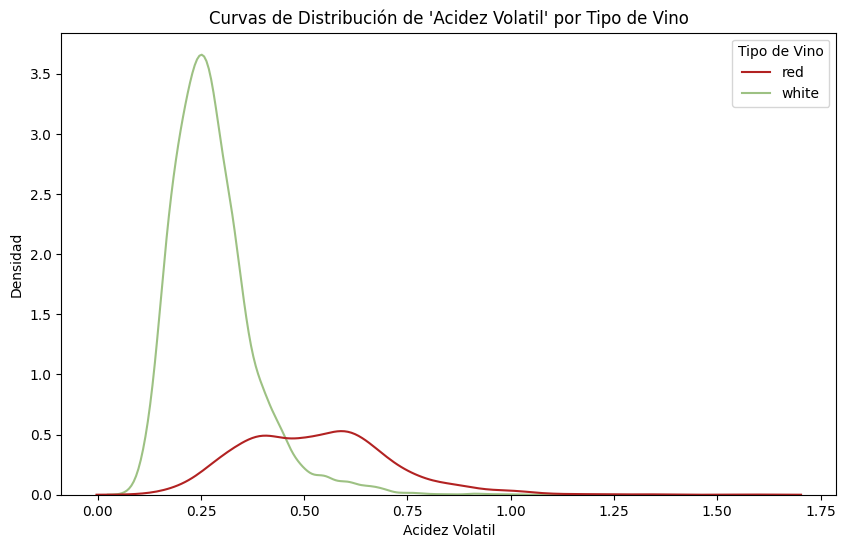

In [ ]:
# Separo las curvas de distribucion por tipo de vino para ver si hay una distribucion marcada en cada tipo
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Acidez Volatil", hue="Tipo de Vino", palette={'red': '#B22222', 'white': '#9DC183'})
plt.title("Curvas de Distribución de 'Acidez Volatil' por Tipo de Vino")
plt.xlabel("Acidez Volatil")
plt.ylabel("Densidad")
plt.show()

In [ ]:
# Imprimo el valor maximo de acidez volatil del tipo de vino blanco porque no se logra ver en el grafico
max_volatile_acidity_white = df[df['Tipo de Vino'] == 'white']['Acidez Volatil'].max()
print(f"El valor máximo de acidez volátil para el vino blanco es: {max_volatile_acidity_white}")

El valor máximo de acidez volátil para el vino blanco es: 1.1


La distribucion de ambos tipos tienen picos en valores distintos. Los valores del vino tinto se encuentran distribuidos de manera equilibrada aproximadamente entre 0.375 y 0.65, con valores que se acercan a 1.75. Por el otro lado, la mayoria de los valores del vino blanco se concentran alrededor del 0.25 pero presenta valores hasta el 1.1.

--------------------------------------------------
**Distribucion de acido citrico**

--------------------------------------------------

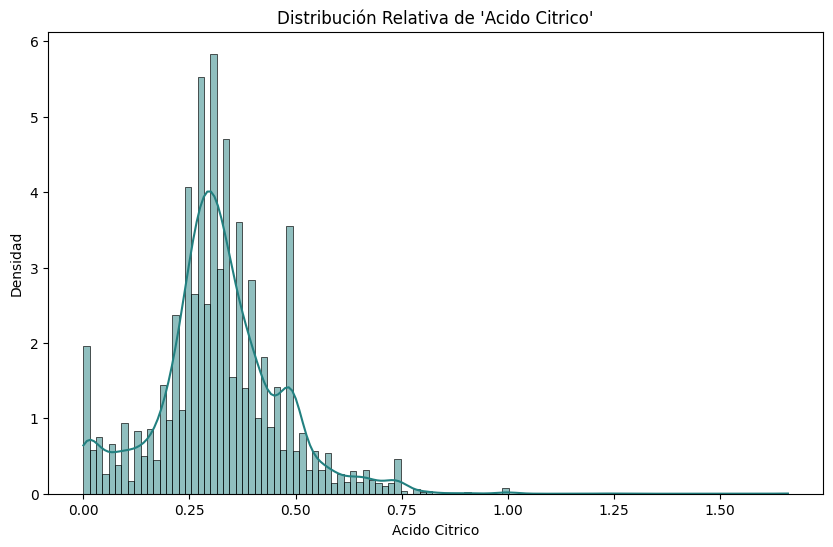

In [ ]:
# Realizo un histoplot para analizar la distribución de citric acid
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Acido Citrico", kde=True, stat='density', color='#228080')
plt.title("Distribución Relativa de 'Acido Citrico'")
plt.xlabel("Acido Citrico")
plt.ylabel("Densidad")
plt.show()

Badandome en el histograma puedo decir que los datos de la variable acido citrico presentan una distribucion asimétrica, con un pico concentrado alrededor de 0.3, pero con un leve pico al 0.5 y un gran sesgo hacia la derecha, alcanzando valores mayores al 1.5.


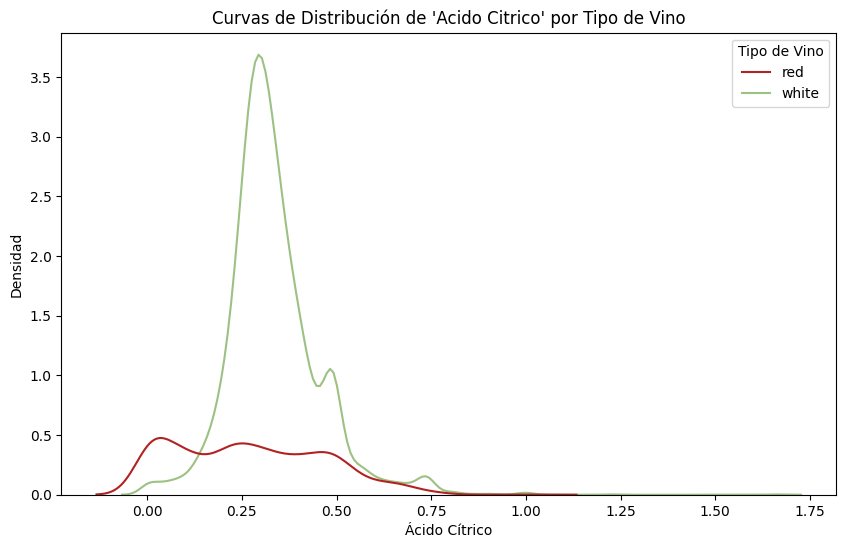

In [ ]:
# Separo las curvas de distribucion por tipo de vino para ver si hay una distribucion marcada en cada tipo
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Acido Citrico", hue="Tipo de Vino", palette={'red': '#B22222', 'white': '#9DC183'})
plt.title("Curvas de Distribución de 'Acido Citrico' por Tipo de Vino")
plt.xlabel("Ácido Cítrico")
plt.ylabel("Densidad")
plt.show()

En base a las curvas de distribucion de ambos tipos de vino podemos ver que al parecer los datos concentrados cerca de cero se deben mas al tipo de vino tinto, pero este presenta una distribucion bastante regular a lo largo entre 0 y 0.5. A diferencia del tipo de vino blanco que presenta un pico importante en 0.3 y un leve pico al 0.5.

A su vez, los valores del vino tinto llegan hasta el 1.125, mientras que los del vino blanco se extienden a 1.75.

--------------------------------------------------
**Azucar Residual**

--------------------------------------------------


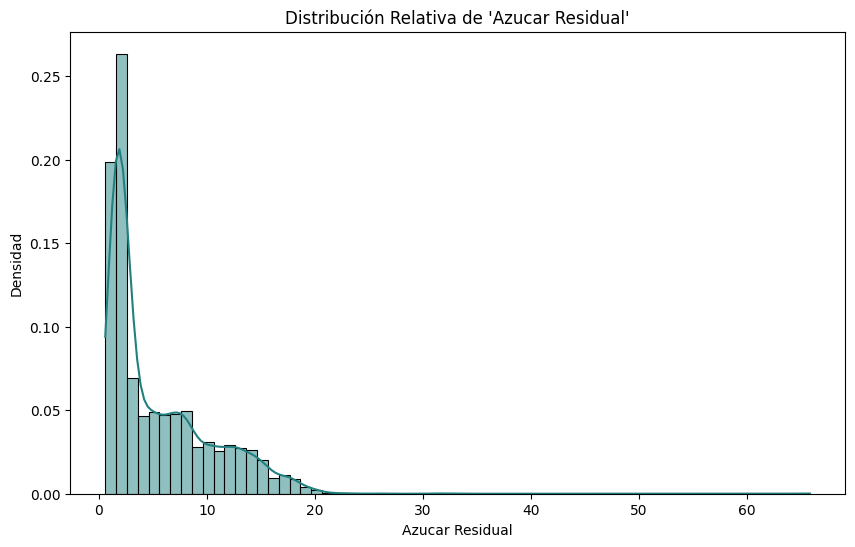

In [ ]:
# Realizo un histoplot para analizar la distribución de azucar residual
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Azucar Residual", kde=True, bins= 65, stat='density', color='#228080')
plt.title("Distribución Relativa de 'Azucar Residual'")
plt.xlabel("Azucar Residual")
plt.ylabel("Densidad")
plt.show()

La distribucion de la variable residual sugar es asimetrica con un gran pico alrededor de 2 con dos lomadas mas pequeñas alrededor del 7 y 12 y una gran cola hacia la derecha con valores que superan los 60.


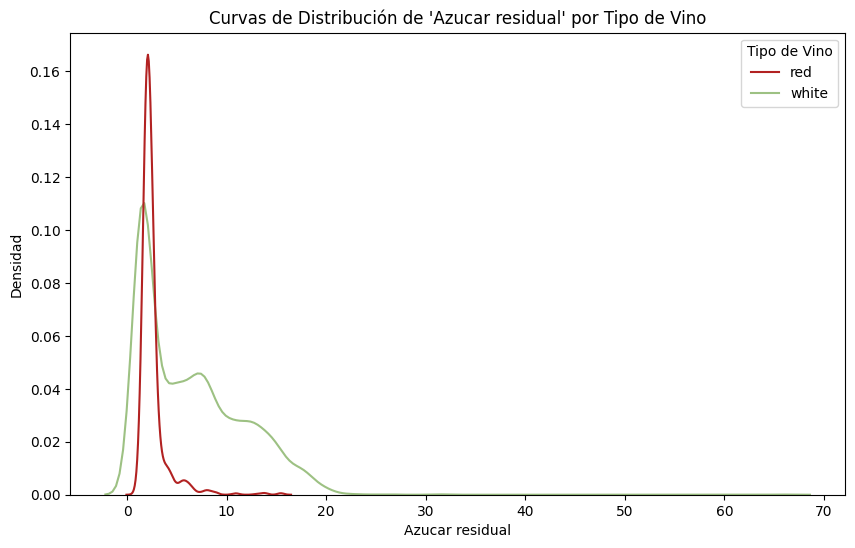

In [ ]:
# Separo las curvas de distribucion por tipo de vino para ver si hay una distribucion marcada en cada tipo
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Azucar Residual", hue="Tipo de Vino", palette={'red': '#B22222', 'white': '#9DC183'})
plt.title("Curvas de Distribución de 'Azucar residual' por Tipo de Vino")
plt.xlabel("Azucar residual")
plt.ylabel("Densidad")
plt.show()

En base a las curvas de distribución en base a los tipos podemos ver que los valores del vino tinto se concentran alrededor de 2, mientras que los valores del vino blanco si bien tienen su mayor pico en el 2, trambien presentan los picos al 7 y 12 visto en el histograma anterior.

Solo los valores del vino blanco alcanzan los valores atipicos cercanos al 70.

--------------------------------------------------
**Cloruros**

--------------------------------------------------

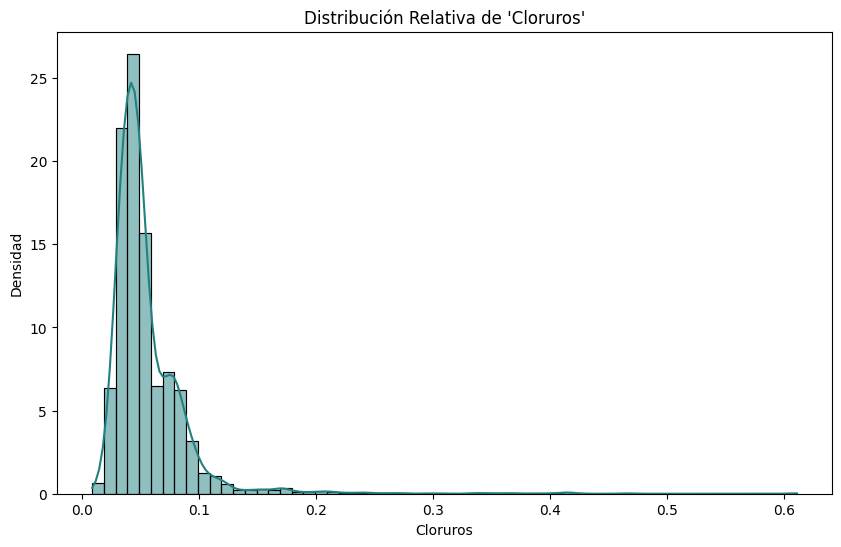

In [ ]:
# Realizo un histoplot para analizar la distribución de los chlorides
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Cloruros", kde=True, bins=60, stat='density', color='#228080')
plt.title("Distribución Relativa de 'Cloruros'")
plt.xlabel("Cloruros")
plt.ylabel("Densidad")
plt.show()

La distribucion de la variable Cloruros presenta una distribucion asimetrica con un pico alrededor los 0.04 y una gran cola alcanzando el 0.6.

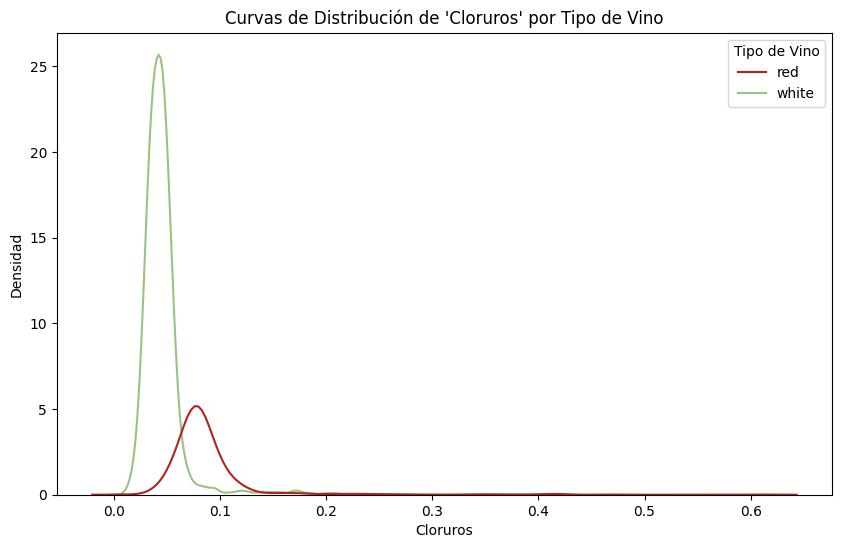

In [ ]:
# Separo las curvas de distribucion por tipo de vino para ver si hay una distribucion marcada en cada tipo
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Cloruros", hue="Tipo de Vino", palette={'red': '#B22222', 'white': '#9DC183'})
plt.title("Curvas de Distribución de 'Cloruros' por Tipo de Vino")
plt.xlabel("Cloruros")
plt.ylabel("Densidad")
plt.show()

In [ ]:
# Imprimo el valor maximo de cloruros para el vino blanco porque no se logra ver en el grafico
max_volatile_acidity_white = df[df['Tipo de Vino'] == 'white']['Cloruros'].max()
print(f"El valor máximo de cloruros para el vino blanco es: {max_volatile_acidity_white}")

El valor máximo de cloruros para el vino blanco es: 0.346


Las clases de vino parecen estar separadas, para el vino blanco, un pico en 0.5 aproximadamente, concentrandose los datos entre 0.1 y 0.8 aproximadamente. Alcanzan valores cercanos al 0.35.

Por el otro lado, para el vino tinto, su pico se encuentra alrededor de 0.9, y su campana comprende valores desde 0.5 hasta 0.11. Pero su cola se extiende pasando el 0.6.

--------------------------------------------------
**Dioxido de Azufre Total**

--------------------------------------------------


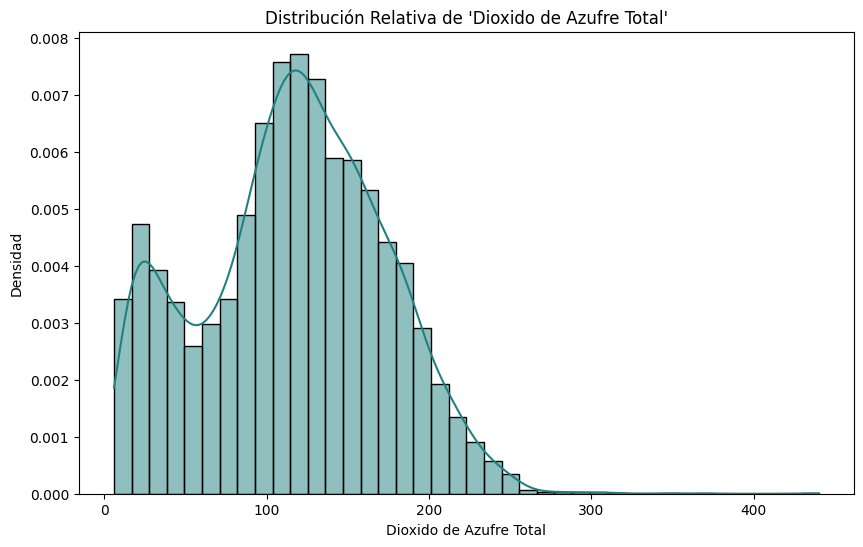

In [ ]:
# Realizo un histoplot para analizar la distribución del Dioxido de azufre total
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="SO2 Total", kde=True, bins=40, stat='density', color='#228080')
plt.title("Distribución Relativa de 'Dioxido de Azufre Total'")
plt.xlabel("Dioxido de Azufre Total")
plt.ylabel("Densidad")
plt.show()

Este grafico muestra una distribucion en forma de camello, con dos picos importantes, siendo el pico alrededor de 120 mayor al pico que encontramos cerca de 20. La cola se extiende hacia la derecha alcanzando valores mayores a 400.

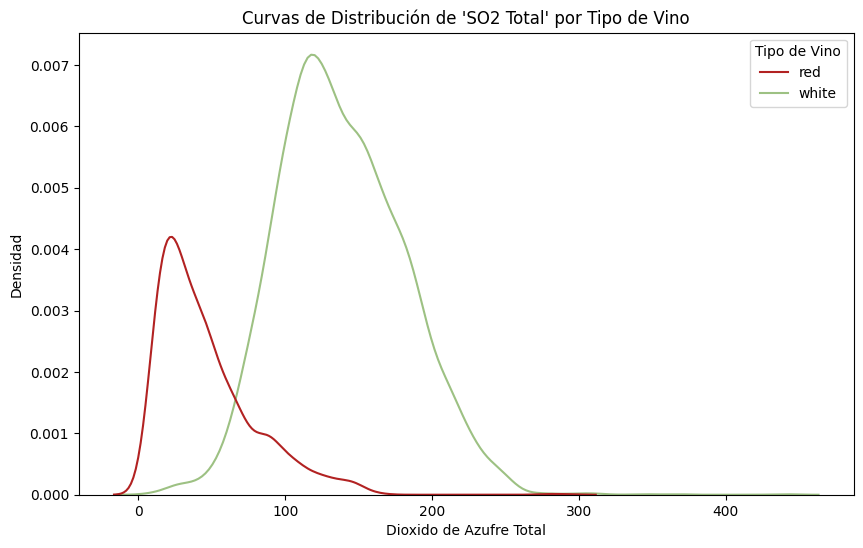

In [ ]:
# Separo las curvas de distribucion por tipo de vino para ver si hay una distribucion marcada en cada tipo
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="SO2 Total", hue="Tipo de Vino", palette={'red': '#B22222', 'white': '#9DC183'})
plt.title("Curvas de Distribución de 'SO2 Total' por Tipo de Vino")
plt.xlabel("Dioxido de Azufre Total")
plt.ylabel("Densidad")
plt.show()

La distribucion de ambos tipos de vino se encuentra en gran parte dividida. El primer pico representa los valores del vino tinto y la campana mas grande, los del vino blanco. La cola correspondiente al vino tinto alcanza el valor 300 pero la del vino blanco se exitende hacia mayores valores, superando el 400.

--------------------------------------------------
**Densidad Liquida**

--------------------------------------------------

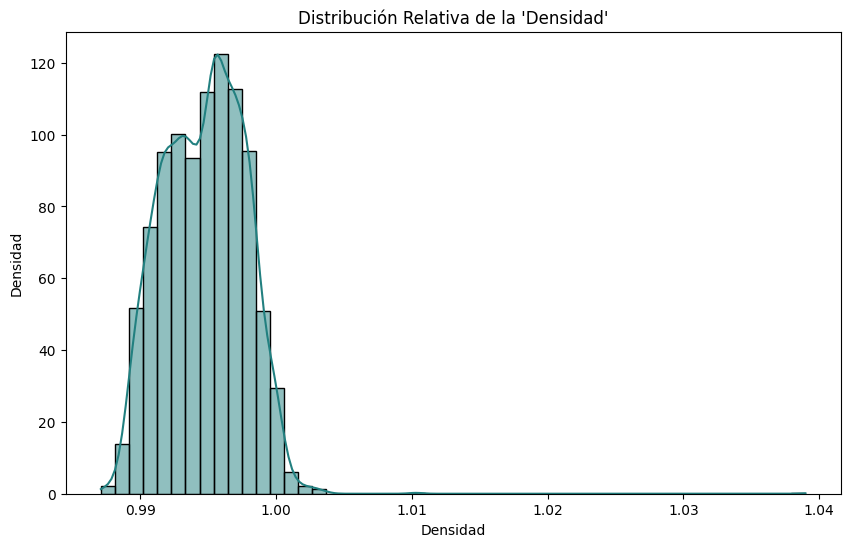

In [ ]:
# Realizo un histoplot para analizar la distribución de la densidad
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Densidad", kde=True, bins=50, stat='density', color='#228080')
plt.title("Distribución Relativa de la 'Densidad'")
plt.xlabel("Densidad")
plt.ylabel("Densidad")
plt.show()

La mayoria de los datos se concentran entre 0.98 y 1. La distribucion esta sesgada hacia la derecha con valores que se acercan al 1.04.

--------------------------------------------------
**pH**

--------------------------------------------------

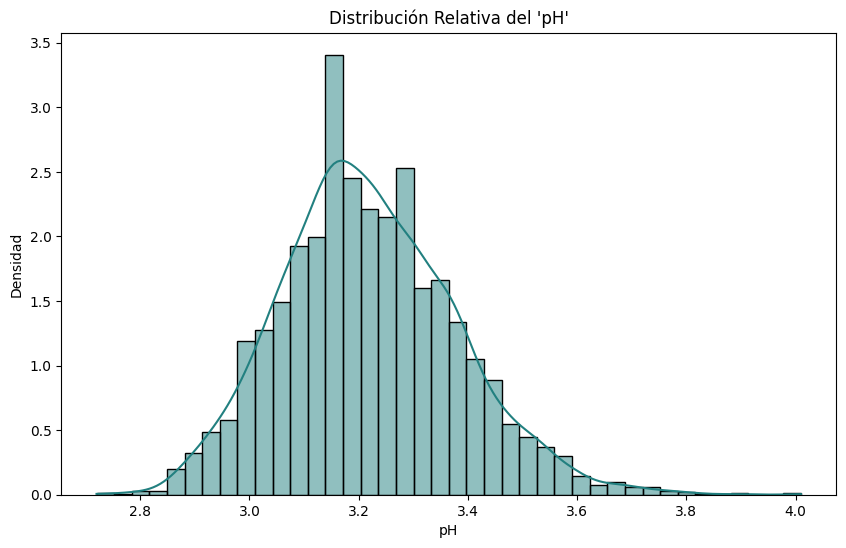

In [ ]:
# Realizo un histoplot para analizar la distribución de los pH
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="pH", kde=True, bins=40, stat='density', color='#228080')
plt.title("Distribución Relativa del 'pH'")
plt.xlabel("pH")
plt.ylabel("Densidad")
plt.show()

La distribucion del ph se asemeja a una distribucion normal con un leve sesgo hacia la derecha. Su pico se da en el ph=3.18, y los valores se concentran entre el 3 y 3.4.

--------------------------------------------------
**Sulfatos**

--------------------------------------------------

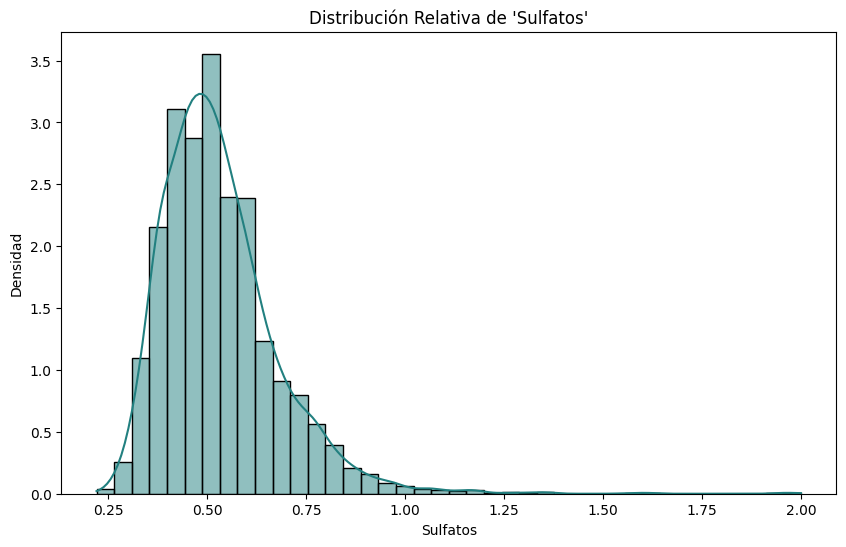

In [ ]:
# Realizo un histoplot para analizar la distribución de los Sulfatos
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Sulfatos", kde=True, bins=40, stat='density', color='#228080')
plt.title("Distribución Relativa de 'Sulfatos'")
plt.xlabel("Sulfatos")
plt.ylabel("Densidad")
plt.show()

La distribucion de esta feature presenta una sola campana con un pico cercano al 0.5 con un sesgo hacia la derecha alcanzando valores iguales.

### Outliers
Identifico outliers para cada feature numerica

In [ ]:
# Selecciono las columnas numericas
numerical_cols = df.select_dtypes(include=np.number)

# Calculo Q1, Q3, e IQR para columnas numericas
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Definir los limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifico outliers para cada columna numerica
outliers_count = {}
for col in df.select_dtypes(include=np.number).columns:
    col_outliers = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]
    outliers_count[col] = len(col_outliers)

print("Numeros de outliers por columna numerica (utilizando IQR):")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

print("Lower Bound for numerical columns (Q1 - 1.5 * IQR):\n", lower_bound)
print("\nUpper Bound for numerical columns (Q3 + 1.5 * IQR):\n", upper_bound)

Numeros de outliers por columna numerica (utilizando IQR):
Acidez Fija: 357
Acidez Volatil: 377
Acido Citrico: 509
Azucar Residual: 118
Cloruros: 286
SO2 Libre: 62
SO2 Total: 10
Densidad: 3
pH: 73
Sulfatos: 191
Alcohol: 3
Calidad: 228
Lower Bound for numerical columns (Q1 - 1.5 * IQR):
 Acidez Fija         4.450000
Acidez Volatil     -0.025000
Acido Citrico       0.040000
Azucar Residual    -7.650000
Cloruros           -0.002500
SO2 Libre         -19.000000
SO2 Total         -41.500000
Densidad            0.985365
pH                  2.795000
Sulfatos            0.175000
Alcohol             6.800000
Calidad             3.500000
dtype: float64

Upper Bound for numerical columns (Q3 + 1.5 * IQR):
 Acidez Fija          9.650000
Acidez Volatil       0.655000
Acido Citrico        0.600000
Azucar Residual     17.550000
Cloruros             0.105500
SO2 Libre           77.000000
SO2 Total          274.500000
Densidad             1.003965
pH                   3.635000
Sulfatos             0.85

In [ ]:
print("Outliers en base a 'Tipo de Vino' en cada columna:")
for col in df.select_dtypes(include=np.number).columns:
    # Identify outliers for the current column
    col_outliers_df = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]

    # Count 'red' and 'white' wine types among the outliers
    outliers_by_type = col_outliers_df['Tipo de Vino'].value_counts()

    # Print results for the current column
    print(f"\n-- {col} --")
    if not outliers_by_type.empty:
        print(f"  Outliers Vino Tinto: {outliers_by_type.get('red', 0)}")
        print(f"  Outliers Vino Blanco: {outliers_by_type.get('white', 0)}")
    else:
        print("  No presenta Outliers.")

Outliers en base a 'Tipo de Vino' en cada columna:

-- Acidez Fija --
  Outliers Vino Tinto: 326
  Outliers Vino Blanco: 31

-- Acidez Volatil --
  Outliers Vino Tinto: 341
  Outliers Vino Blanco: 36

-- Acido Citrico --
  Outliers Vino Tinto: 323
  Outliers Vino Blanco: 186

-- Azucar Residual --
  Outliers Vino Tinto: 0
  Outliers Vino Blanco: 118

-- Cloruros --
  Outliers Vino Tinto: 179
  Outliers Vino Blanco: 107

-- SO2 Libre --
  Outliers Vino Tinto: 0
  Outliers Vino Blanco: 62

-- SO2 Total --
  Outliers Vino Tinto: 2
  Outliers Vino Blanco: 8

-- Densidad --
  Outliers Vino Tinto: 0
  Outliers Vino Blanco: 3

-- pH --
  Outliers Vino Tinto: 34
  Outliers Vino Blanco: 39

-- Sulfatos --
  Outliers Vino Tinto: 150
  Outliers Vino Blanco: 41

-- Alcohol --
  Outliers Vino Tinto: 1
  Outliers Vino Blanco: 2

-- Calidad --
  Outliers Vino Tinto: 28
  Outliers Vino Blanco: 200


Debido al desbalance de clases de Tipo de Vino, voy a eliminar los outliers que sean Tipo de Vino blanco, y a los Outliers que sean Tipo de Vino tinto los voy a reemplazar por la media correspondiente.

In [ ]:
# Creo una lista para guardar los índices de las filas a eliminar
rows_to_drop = []

# Itero sobre cada columna numérica
for col in df.select_dtypes(include=np.number).columns:
    # Identifico los outliers para la columna actual
    col_outliers_df = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]

    # Filtro los outliers que son Tipo de Vino 'white'
    white_wine_outliers = col_outliers_df[col_outliers_df['Tipo de Vino'] == 'white']

    # Guardo los índices de estas filas
    rows_to_drop.extend(white_wine_outliers.index.tolist())

# Elimino índices duplicados
rows_to_drop = list(set(rows_to_drop))

print(f"Forma original del DataFrame: {df.shape}")

# Elimino las filas identificadas del DataFrame
df_cleaned = df.drop(rows_to_drop)

print(f"Forma del DataFrame después de eliminar outliers de vino blanco: {df_cleaned.shape}")

# Actualizo el DataFrame principal si es necesario
df = df_cleaned

print("Filas con outliers de vino blanco eliminadas exitosamente.")

Forma original del DataFrame: (6497, 13)
Forma del DataFrame después de eliminar outliers de vino blanco: (5757, 13)
Filas con outliers de vino blanco eliminadas exitosamente.


Ahora reemplazo outliers que sean de Tipo de Vino Red por las medias en base a la Calidad de los datos no outliers.

In [ ]:
# Defino las medias de los valores no outliers en base a la Calidad
mean_non_outlier_values = {}
for col in numerical_cols.columns:
    if col == 'Calidad':
        continue
    # Filtro los outliers de la columna actual
    non_outliers_df = numerical_cols[(numerical_cols[col] >= lower_bound[col]) & (numerical_cols[col] <= upper_bound[col])]
    # Calculo la media de con los no-outliers agrupados por Calidad
    mean_non_outlier_values[col] = non_outliers_df.groupby('Calidad')[col].mean()


Defino una funcion para reemplazar los outliers en base a la media de los valores agrupados por Calidad.

In [ ]:
# Defino la funcion para reemplazar los outliers por las medias de los grupos por Calidad
def replace_outliers_conditionally(df_row, col_name):
    value = df_row[col_name]
    calidad = df_row['Calidad']

    # Verifica si el valor es un outlier
    if (value < lower_bound[col_name]) or (value > upper_bound[col_name]):
        # Si es un outlier, lo reemplaza por la media de los no-outliers para esa calidad
        if calidad in mean_non_outlier_values[col_name].index:
            return mean_non_outlier_values[col_name][calidad]
        else:
            # Si no hay una media para esa calidad, devuelve la media general incluyendo outliers
            return numerical_cols[col_name][(numerical_cols[col_name] >= lower_bound[col_name]) & (numerical_cols[col_name] <= upper_bound[col_name])].mean()
    else:
        return value

# Aplico la funcion para cada columna numerica excluyendo 'Calidad'
for col in numerical_cols.columns:
    if col == 'Calidad':
        continue
    df[col] = df.apply(lambda row: replace_outliers_conditionally(row, col), axis=1)

print("Conditional outlier replacement applied to all numerical columns (excluding 'Calidad').")
print("First 5 rows of the DataFrame after outlier replacement:")
display(df.head())
df.describe()

Conditional outlier replacement applied to all numerical columns (excluding 'Calidad').
First 5 rows of the DataFrame after outlier replacement:


,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,5757.000000,5757.000000,5757.00000,5757.000000,5757.000000,5757.00000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000
mean,7.028829,0.316729,0.31683,5.088623,0.051684,29.14921,111.713974,0.994654,3.220434,0.520807,10.515665,5.789300
std,0.884933,0.122342,0.10759,4.308809,0.018643,16.20362,56.304311,0.002871,0.150743,0.118562,1.158297,0.786816
min,4.600000,0.080000,0.04000,0.600000,0.009000,1.00000,6.000000,0.987110,2.800000,0.220000,8.400000,3.000000
25%,6.400000,0.230000,0.26000,1.800000,0.038000,16.00000,71.000000,0.992320,3.120000,0.440000,9.500000,5.000000
50%,6.958576,0.296325,0.31000,2.800000,0.048000,28.00000,115.000000,0.994920,3.210000,0.510000,10.400000,6.000000
75%,7.500000,0.370000,0.38000,7.700000,0.061000,40.00000,151.000000,0.996880,3.320000,0.590000,11.300000,6.000000
max,9.600000,0.655000,0.60000,17.500000,0.105000,77.00000,272.000000,1.003690,3.630000,0.850000,14.000000,8.000000


In [ ]:
# Realizo un barplot para analizar la distribucion de la variable categorica Tipo de Vino
# Despues de haber eliminado outliers para el Tipo de Vino white
type_counts = df['Tipo de Vino'].value_counts(normalize=True).reset_index()
type_counts.columns = ['Tipo de Vino', 'proportion']
type_counts['proportion'] = type_counts['proportion'] * 100

fig = px.bar(type_counts, x='Tipo de Vino', y='proportion',
             title='Distribución Relativa del Tipo de Vino',
             labels={'Tipo de Vino': 'Tipo de Vino', 'proportion': 'Porcentaje'},
             color='Tipo de Vino',
             color_discrete_map={'red': '#B22222', 'white': '#9DC183'},
             )
fig.show()

El desbalance de clases disminuyó aproximadamente 3%.

### Creacion de Features

--------------------------------------------------
**Ratio Acidez Volatil / Acidez Fija**

--------------------------------------------------

Feature para expresar la proporcion de la Acidez Volatil con respecto a la Acidez Fija

In [ ]:
# Creo la feature haciendo un ratio / entre 'Acidez Volatil' y 'Acidez Fija'
df['Ratio Acidez Volatil / Acidez Fija'] = df['Acidez Volatil'] / df['Acidez Fija']
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0.044773
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.044773
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0.040238
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193


--------------------------------------------------
**Ratio Acido Citrico / Acidez Fija**

--------------------------------------------------

Feature para expresar la proporcion del Acido Citrico con respecto a la Acidez Fija

In [ ]:
# Creo la feature haciendo una ratio / entre 'Acido Citrico' y 'Acidez Fija'
df['Ratio Acido Citrico / Acidez Fija'] = df['Acido Citrico'] / df['Acidez Fija']
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0.044773,0.039265
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.044773,0.005128
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0.040238,0.080476
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388


--------------------------------------------------
**Acidez Total**

--------------------------------------------------

Feature que representa la suma ponderada de las variables que aportan a la acidez del vino. Los valores tomados para la ponderación fueron elegidos en base a bibliografía que explica lo siguiente:

- La Acidez Fija representa el 60-70% del total acido
- La Acidez Volatil representa el 20-30% del total acido
- El Acido Citrico representa el 5-10% del total acido

In [ ]:
# Creo la feature 'Acidez Total' haciendo una suma ponderada de 'Acidez Fija', 'Acidez Volatil' y 'Acido Citrico'
df['Acidez Total'] = df['Acidez Fija'] * 0.6 + df['Acidez Volatil'] * 0.3 + df['Acido Citrico'] * 0.1
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0.044773,0.039265,4.815396
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.044773,0.005128,4.788769
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0.040238,0.080476,4.315145
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396


--------------------------------------------------
**Densidad por Azucar Residual**

--------------------------------------------------

Esta feature indica un ratio que vincula la densidad por azucares residuales, ya que a mayor azucar en un liquido, mayor densidad.

In [ ]:
# Creo la feature 'Densidad / Azucar Residual' haciendo una relacion / de 'Densidad' y 'Azucar Residual'
df['Densidad / Azucar Residual'] = df['Densidad'] / df['Azucar Residual']
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396,0.525158
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0.044773,0.039265,4.815396,0.383385
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.044773,0.005128,4.788769,0.433478
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0.040238,0.080476,4.315145,0.525263
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396,0.525158


--------------------------------------------------
**Ratio Cloruros/Sulfatos**

--------------------------------------------------

Feature que desmuestra el ratio entre estas moleculas.

In [ ]:
# Creo la feature 'Ratio Cloruros / Sulfatos' haciendo una relacion / entre 'Cloruros' y 'Sulfatos'
df['Ratio Cloruros / Sulfatos'] = df['Cloruros'] / df['Sulfatos']
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396,0.525158,0.135714
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0.044773,0.039265,4.815396,0.383385,0.144118
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.044773,0.005128,4.788769,0.433478,0.141538
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0.040238,0.080476,4.315145,0.525263,0.129310
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396,0.525158,0.135714


--------------------------------------------------
**Indice Acido/pH**

--------------------------------------------------

Este indice fue generado debido al vinculo directo que se encuentra entre la acidez y el pH.

In [ ]:
# Creo la feature 'Indice Acido/pH' haciendo una relacion / entre 'Acidez total' y 'pH'
df['Indice Acido / pH'] = df['Acidez Total'] / df['pH']
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice Acido / pH
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0.044773,0.039265,4.815396,0.383385,0.144118,1.504811
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.044773,0.005128,4.788769,0.433478,0.141538,1.468948
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0.040238,0.080476,4.315145,0.525263,0.129310,1.365552
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532


--------------------------------------------------
**Indice SO2 libre / total**

--------------------------------------------------

Feature que indica la proporcion del dioxido de azufre libre sobre el total.

In [ ]:
# Creo la feature 'Indice SO2 libre / total' haciendo una relacion / entre 'SO2 Libre' y 'SO2 Total'
df['Indice SO2 libre / total'] = df['SO2 Libre'] / df['SO2 Total']
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice Acido / pH,Indice SO2 libre / total
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0.044773,0.039265,4.815396,0.383385,0.144118,1.504811,0.373134
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.044773,0.005128,4.788769,0.433478,0.141538,1.468948,0.277778
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0.040238,0.080476,4.315145,0.525263,0.129310,1.365552,0.283333
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529


--------------------------------------------------
**Indice Sulfatos/Dioxido de Azufre Total**

--------------------------------------------------

Feature que indica que la relacion entre Sulfatos solidos y los gaseosos.

In [ ]:
# Creo la feature haciendo una relacion / entre 'Sulfatos' y 'SO2 Total'
df['Indice Sulfatos / SO2 Total'] = df['Sulfatos'] / df['SO2 Total']
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,...,Calidad,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice Acido / pH,Indice SO2 libre / total,Indice Sulfatos / SO2 Total
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,5,red,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529,0.016471
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,5,red,0.044773,0.039265,4.815396,0.383385,0.144118,1.504811,0.373134,0.010149
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,5,red,0.044773,0.005128,4.788769,0.433478,0.141538,1.468948,0.277778,0.012037
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,6,red,0.040238,0.080476,4.315145,0.525263,0.129310,1.365552,0.283333,0.009667
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,5,red,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529,0.016471


--------------------------------------------------
**Relacion Densidad / Alcohol**

--------------------------------------------------

Feature que vincula la densidad por el alcohol.

In [ ]:
# Creo la feature haciendo una relacion / entre 'Densidad' y 'Alcohol'
df['Relacion Densidad / Alcohol'] = df['Densidad'] / df['Alcohol']
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,...,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice Acido / pH,Indice SO2 libre / total,Indice Sulfatos / SO2 Total,Relacion Densidad / Alcohol
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,red,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529,0.016471,0.106149
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,red,0.044773,0.039265,4.815396,0.383385,0.144118,1.504811,0.373134,0.010149,0.101714
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,red,0.044773,0.005128,4.788769,0.433478,0.141538,1.468948,0.277778,0.012037,0.101735
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,red,0.040238,0.080476,4.315145,0.525263,0.129310,1.365552,0.283333,0.009667,0.101837
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,red,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529,0.016471,0.106149


--------------------------------------------------
**Indice de Cuerpo**

--------------------------------------------------

Esta feature representa el 'Cuerpo' del vino provocada por el alcohol, densidad y azucar residual. Los valores asignados en la suma ponderada fueron elegidos en base al impacto que tienen esas variables sobre el cuerpo de un vino.

In [ ]:
# Creo la feature haciendo una suma ponderada entre 'Alcohol', 'Densidad' y 'Azucar Residual'
df['Indice de Cuerpo'] = df['Alcohol'] * 0.5 + df['Densidad'] * 0.3 + df['Azucar Residual'] * 0.2
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,...,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice Acido / pH,Indice SO2 libre / total,Indice Sulfatos / SO2 Total,Relacion Densidad / Alcohol,Indice de Cuerpo
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529,0.016471,0.106149,5.37934
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.044773,0.039265,4.815396,0.383385,0.144118,1.504811,0.373134,0.010149,0.101714,5.71904
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.044773,0.005128,4.788769,0.433478,0.141538,1.468948,0.277778,0.012037,0.101735,5.65910
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.040238,0.080476,4.315145,0.525263,0.129310,1.365552,0.283333,0.009667,0.101837,5.57940
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.047193,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529,0.016471,0.106149,5.37934


--------------------------------------------------
**Indice Alcohol / Calidad**

--------------------------------------------------

Feature que muestra el impacto del acohol sobre la calidad del vino.

In [ ]:
# Creo la feature haciendo una multiplicacion entre 'Alcohol' y 'Calidad'
df['Indice Alcohol * Calidad'] = df['Alcohol'] * df['Calidad']
display(df.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,...,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice Acido / pH,Indice SO2 libre / total,Indice Sulfatos / SO2 Total,Relacion Densidad / Alcohol,Indice de Cuerpo,Indice Alcohol * Calidad
0,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529,0.016471,0.106149,5.37934,47.0
1,7.800000,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.039265,4.815396,0.383385,0.144118,1.504811,0.373134,0.010149,0.101714,5.71904,49.0
2,7.800000,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.005128,4.788769,0.433478,0.141538,1.468948,0.277778,0.012037,0.101735,5.65910,49.0
3,6.958576,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.080476,4.315145,0.525263,0.129310,1.365552,0.283333,0.009667,0.101837,5.57940,58.8
4,7.400000,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.041388,4.575396,0.525158,0.135714,1.303532,0.323529,0.016471,0.106149,5.37934,47.0


### **Matriz de correlación**

Genero una nueva matriz de correlacion para analizar las nuevas features creadas.

Si existen features con una colinealidad >95% serán evaluadas y me quedaré con la que tenga mayor correlacion con la mayoria de las features para eliminar redundancia.

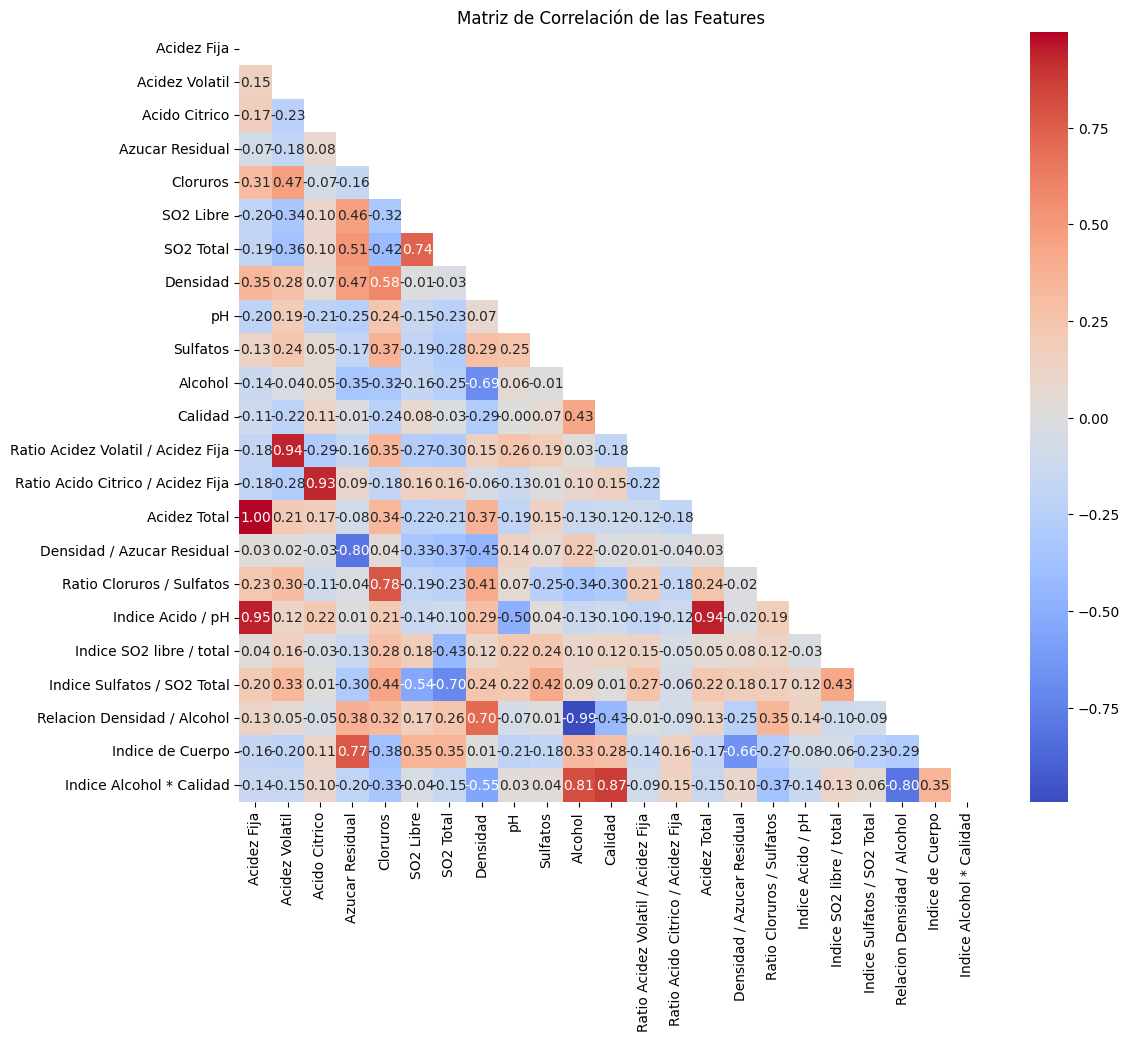

In [ ]:
# Matriz de correlación de todas las variables
plt.figure(figsize=(12, 10))

# Excluimos la columna 'type' porque no es numérica
correlation_matrix = df.drop('Tipo de Vino', axis=1).corr()

# Crear una máscara para mostrar solo el triángulo inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Matriz de Correlación de las Features')
plt.show()

En base a esta matrix de correlacion podemos ver que se encuentra una colinealidad >95% entre algunas features, estas son candidatas a ser eliminadas para reducir redundancia.

Candidatos a ser analizados:

- Indice Acido/pH vs Acidez Fija
- Indice Acido/pH vs Acidez Total
- Acidez Total vs Acidez Fija
- Relacion Densidad / Alcohol vs Alcohol

In [ ]:
# Calculo la correlacion de matrix excluyendo la columna 'Tipo de Vino'
correlation_matrix = df.drop('Tipo de Vino', axis=1).corr()

# Selecciono las correlaciones para 'Acidez Total' y 'fixed acidity' vs las demas features
selected_correlations = correlation_matrix.loc[['Indice Acido / pH','Acidez Total', 'Acidez Fija']]

print("Correlacion de 'Indice Acido/pH', 'Acidez Total', 'Acidez Fija' con otras features:")
display(selected_correlations)

Correlacion de 'Indice Acido/pH', 'Acidez Total', 'Acidez Fija' con otras features:


,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,...,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice Acido / pH,Indice SO2 libre / total,Indice Sulfatos / SO2 Total,Relacion Densidad / Alcohol,Indice de Cuerpo,Indice Alcohol * Calidad
Indice Acido / pH,0.946170,0.121652,0.220978,0.008534,0.209876,-0.140101,-0.103322,0.291312,-0.498908,0.040290,...,-0.117337,0.943737,-0.018133,0.186437,1.000000,-0.027907,0.119635,0.135440,-0.082099,-0.140200
Acidez Total,0.997899,0.214867,0.171868,-0.082524,0.337452,-0.215818,-0.207067,0.365754,-0.188547,0.146315,...,-0.182603,1.000000,0.026907,0.244063,0.943737,0.053982,0.221910,0.131465,-0.173978,-0.150384
Acidez Fija,1.000000,0.153962,0.170539,-0.073217,0.312072,-0.197909,-0.187325,0.350773,-0.200744,0.131155,...,-0.184851,0.997899,0.026945,0.229382,0.946170,0.044266,0.202309,0.130860,-0.164994,-0.144233


Debido a que Acidez Total es la feature que mayor correlacion tiene con la mayoria de las variables, me quedaré con esta feature. Acidez Fija e Indice Acido/pH serán eliminadas.

In [ ]:
# Elimino las features Acidez Fija' e 'Indice Acido/pH'
df = df.drop(columns=['Acidez Fija', 'Indice Acido / pH'])
df.head()

,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,...,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice SO2 libre / total,Indice Sulfatos / SO2 Total,Relacion Densidad / Alcohol,Indice de Cuerpo,Indice Alcohol * Calidad
0,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,...,0.047193,0.041388,4.575396,0.525158,0.135714,0.323529,0.016471,0.106149,5.37934,47.0
1,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,...,0.044773,0.039265,4.815396,0.383385,0.144118,0.373134,0.010149,0.101714,5.71904,49.0
2,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,...,0.044773,0.005128,4.788769,0.433478,0.141538,0.277778,0.012037,0.101735,5.65910,49.0
3,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,...,0.040238,0.080476,4.315145,0.525263,0.129310,0.283333,0.009667,0.101837,5.57940,58.8
4,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,...,0.047193,0.041388,4.575396,0.525158,0.135714,0.323529,0.016471,0.106149,5.37934,47.0


In [ ]:
# Calculo la correlacion de matrix excluyendo la columna 'Tipo de Vino'
correlation_matrix = df.drop('Tipo de Vino', axis=1).corr()

# Selecciono las correlaciones para 'Relacion Densidad / Alcohol' y 'Alcohol' vs las demas features
selected_correlations = correlation_matrix.loc[['Relacion Densidad / Alcohol', 'Alcohol']]

print("Correlacion de 'Relacion Densidad / Alcohol' y 'Alcohol' con otras features:")
display(selected_correlations)

Correlacion de 'Relacion Densidad / Alcohol' y 'Alcohol' con otras features:


,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,...,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice SO2 libre / total,Indice Sulfatos / SO2 Total,Relacion Densidad / Alcohol,Indice de Cuerpo,Indice Alcohol * Calidad
Relacion Densidad / Alcohol,0.052899,-0.045264,0.377092,0.323963,0.171646,0.256067,0.702605,-0.072932,0.007823,-0.993386,...,-0.008031,-0.090467,0.131465,-0.246158,0.346019,-0.104029,-0.094382,1.000000,-0.291760,-0.802911
Alcohol,-0.038200,0.049294,-0.345944,-0.322952,-0.164452,-0.247668,-0.688825,0.060274,-0.009618,1.000000,...,0.025173,0.096047,-0.134897,0.218335,-0.342689,0.101126,0.092637,-0.993386,0.327606,0.814326


La feature Relacion Densidad / Alcohol presenta mayor correlacion con la mayoria de las features, por lo tanto eliminaré Alcohol para eliminar redundancia.

In [ ]:
# Elimino la feature 'Alcohol'
df = df.drop(columns='Alcohol')
df.head()

,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Calidad,...,Ratio Acidez Volatil / Acidez Fija,Ratio Acido Citrico / Acidez Fija,Acidez Total,Densidad / Azucar Residual,Ratio Cloruros / Sulfatos,Indice SO2 libre / total,Indice Sulfatos / SO2 Total,Relacion Densidad / Alcohol,Indice de Cuerpo,Indice Alcohol * Calidad
0,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,...,0.047193,0.041388,4.575396,0.525158,0.135714,0.323529,0.016471,0.106149,5.37934,47.0
1,0.349231,0.306269,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,...,0.044773,0.039265,4.815396,0.383385,0.144118,0.373134,0.010149,0.101714,5.71904,49.0
2,0.349231,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,...,0.044773,0.005128,4.788769,0.433478,0.141538,0.277778,0.012037,0.101735,5.65910,49.0
3,0.280000,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,...,0.040238,0.080476,4.315145,0.525263,0.129310,0.283333,0.009667,0.101837,5.57940,58.8
4,0.349231,0.306269,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,...,0.047193,0.041388,4.575396,0.525158,0.135714,0.323529,0.016471,0.106149,5.37934,47.0


Creo una tabla de las features con correlacion >|0.50|

In [ ]:
# Calculo la matriz de correlacion, excluyendo la columna 'Tipo de Vino'
correlation_matrix = df.drop('Tipo de Vino', axis=1).corr()

# Stackeo la matriz de correlacion y reseteo el index
stacked_corr = correlation_matrix.stack().reset_index()

# Nombro las columnas
stacked_corr.columns = ['Variable 1', 'Variable 2', 'Correlacion']

# Filtro por correlacion >|0.50|, excluyendo auto-correlacion
high_corr = stacked_corr[(abs(stacked_corr['Correlacion']) > 0.50) & (stacked_corr['Variable 1'] != stacked_corr['Variable 2'])].copy()

# Creo un identificador para cada par y elimino los duplicados
high_corr['Pair'] = high_corr.apply(lambda row: tuple(sorted((row['Variable 1'], row['Variable 2']))), axis=1)
high_corr = high_corr.drop_duplicates(subset=['Pair']).drop(columns=['Pair'])

# Ordeno por correlacion absoluta
high_corr = high_corr.sort_values(by='Correlacion', ascending=False)

# Reseteo index para mayor orden y claridad
high_corr = high_corr.reset_index(drop=True)


print("Pares de variables con correlacion absoluta > 0.50:")
display(high_corr)

Pares de variables con correlacion absoluta > 0.50:


,Variable 1,Variable 2,Correlacion
0,Acidez Volatil,Ratio Acidez Volatil / Acidez Fija,0.936893
1,Acido Citrico,Ratio Acido Citrico / Acidez Fija,0.928879
2,Calidad,Indice Alcohol * Calidad,0.872934
3,Cloruros,Ratio Cloruros / Sulfatos,0.784076
4,Azucar Residual,Indice de Cuerpo,0.773144
5,SO2 Libre,SO2 Total,0.736667
6,Densidad,Relacion Densidad / Alcohol,0.702605
7,Cloruros,Densidad,0.578398
8,Azucar Residual,SO2 Total,0.512152
9,SO2 Libre,Indice Sulfatos / SO2 Total,-0.541288


### **Análisis del EDA**
*Observando las visualizaciones y estadísticas, respondan:*
*- ¿Existen valores nulos en el dataset?*
*- ¿Qué variables parecen tener una mayor correlación (positiva o negativa) con la `quality`?*
*- ¿La distribución de la calidad es similar para vinos tintos y blancos? ¿Qué pueden decir de la distribución general de la calidad?*

**Escriban sus respuestas aquí.**

Según el EDA realizado:

- No se encontraron valores nulos en el dataset.
- La variable **Tipo de Vino** está desbalanceada, con una mayor proporción de vinos blancos.
- La distribución de la **Calidad** general muestra que las puntuaciones más frecuentes son 5, 6 y 7. Siendo el valor mas repetido el 6.
- La distribución de la **Calidad** difiere entre vinos tintos y blancos:
    - Vinos tintos: Las calidades más comunes son 5 y 6, con menor presencia de 4 y 7, y muy pocos casos en 3 y 8. No hay vinos tintos con **Calidad** 9.
    - Vinos blancos: Las calidades más comunes son 6, 5 y 7. Hay menor presencia de 4 y 8, y pocos casos en 3 y 9.
- Varias variables fisicoquímicas (**Acidez Volatil, Acido Citrico, Azucar Residual, Cloruros, SO2 Total, Densidad**) muestran distribuciones diferentes para vinos tintos y blancos, por lo que considero que podrian ser importantes para nuestro objetivo de clasificación.
- Se identificaron outliers en varias columnas numéricas utilizando el método IQR. Sin embargo, en al area de la química es comun encontrar outliers en las mediciones por lo que por el momento no se eliminarán.
- La matriz de correlación mostró alta colinealidad entre **Acidez Fija, Acidez Total** e **Indice Acido/pH**. También entre **Alcohol** y **Relacion Densidad / Alcohol**. Se decidió eliminar **Acidez Fija, Indice Acido/pH** y **Alcohol** para reducir redundancia, manteniendo **Acidez Total** y **Relacion Densidad / Alcohol** debido a su mayor correlación con la mayoria de las demás features.
- Las variables con mayor correlación absoluta (> 0.50) se identificaron en la siguiente tabla.


In [ ]:
print("Pares de variables con correlacion absoluta > 0.50:")
display(high_corr)

Pares de variables con correlacion absoluta > 0.50:


,Variable 1,Variable 2,Correlacion
0,Acidez Volatil,Ratio Acidez Volatil / Acidez Fija,0.936893
1,Acido Citrico,Ratio Acido Citrico / Acidez Fija,0.928879
2,Calidad,Indice Alcohol * Calidad,0.872934
3,Cloruros,Ratio Cloruros / Sulfatos,0.784076
4,Azucar Residual,Indice de Cuerpo,0.773144
5,SO2 Libre,SO2 Total,0.736667
6,Densidad,Relacion Densidad / Alcohol,0.702605
7,Cloruros,Densidad,0.578398
8,Azucar Residual,SO2 Total,0.512152
9,SO2 Libre,Indice Sulfatos / SO2 Total,-0.541288


<a name="clasificacion"></a>
## 4. Clasificación (Predecir Tipo de Vino)
El objetivo aquí es construir un modelo que pueda identificar si un vino es tinto o blanco basándose en sus características fisicoquímicas.

<a name="prep_clasificacion"></a>
### 4.1. Preparación de Datos para Clasificación
Definiremos nuestras variables `X` (features) e `y` (target), y luego dividiremos los datos y los escalaremos.

In [ ]:
# Diccionario para almacenar resultados de rendimiento y tiempos
model_results = {}

In [ ]:
# Definición de Features (X) y Target (y)
X_clf = df.drop('Tipo de Vino', axis=1)
y_clf = df['Tipo de Vino']

# División en Train y Test (estratificada para mantener la proporción de clases)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)

# Escalar las features es crucial para muchos modelos
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print("Forma de X_train escalado:", X_train_clf_scaled.shape)
print("Forma de X_test escalado:", X_test_clf_scaled.shape)

Forma de X_train escalado: (4317, 20)
Forma de X_test escalado: (1440, 20)


<a name="modelos_base_clasificacion"></a>
### 4.2. Modelos Base de Clasificación
Comenzamos con modelos simples para tener una línea de base (baseline) de rendimiento.

#### **Logistic Regression**

In [ ]:
# Regresión Logística

print("--- Entrenando Regresión Logística ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

start_time = time.time()
log_reg.fit(X_train_clf_scaled, y_train_clf)
end_time = time.time()
train_time_dt = end_time - start_time

y_pred_log = log_reg.predict(X_test_clf_scaled)

print(f"Tiempo de entrenamiento (Logistic Regression): {train_time_dt:.4f} segundos")
print("\n\n\nReporte de clasificación (Logistic Regression - Test):")
print(classification_report(y_test_clf, y_pred_log))

# Obtener el classification report para calcular el F1-score
report_log_reg = classification_report(y_test_clf, y_pred_log, output_dict=True)
f1_score_log_reg_weighted = report_log_reg['weighted avg']['f1-score']

# Guardamos los resultados y tiempo de entrenamiento en nuestro diccionario
model_results['Logistic Regression'] = {
    'Accuracy_Test': accuracy_score(y_test_clf, y_pred_log),
    'F1_Score_Weighted': f1_score_log_reg_weighted,
    'Train_Time_s': train_time_dt
}

--- Entrenando Regresión Logística ---
Tiempo de entrenamiento (Logistic Regression): 0.1079 segundos



Reporte de clasificación (Logistic Regression - Test):
              precision    recall  f1-score   support

         red       0.99      0.99      0.99       400
       white       1.00      0.99      1.00      1040

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440



**Analisis de métricas**


ROC_AUC

ROC-AUC para Regresión Logística: 0.9979


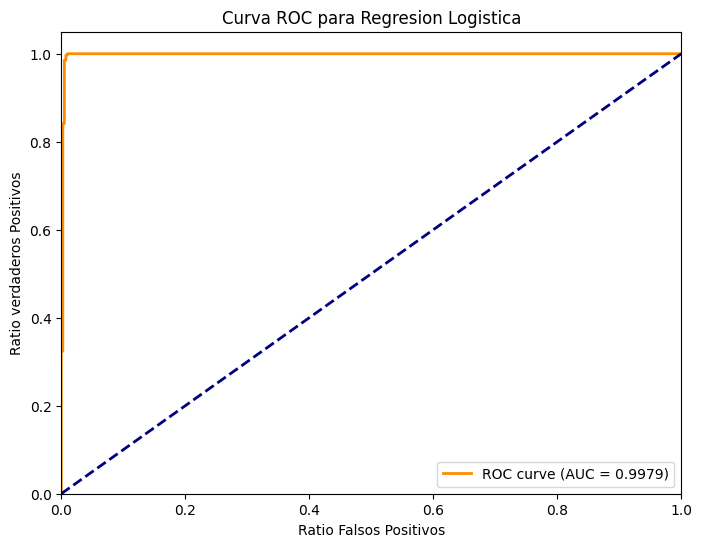

In [ ]:
# Obtengo probabilidades para la clase positiva (white)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_clf_scaled)[:, 1]

# Calculo curva ROC
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba_log_reg, pos_label='white')

# Calculo AUC
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC para Regresión Logística: {roc_auc:.4f}")

# Plot curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio Falsos Positivos')
plt.ylabel('Ratio verdaderos Positivos')
plt.title('Curva ROC para Regresion Logistica')
plt.legend(loc="lower right")
plt.show()

La curva ROC para la Regresion Logistica tiene un valor AUC = 0.9979, lo que indica un ratio de verdaderos positivos casi perfecto con un ratio de falsos positivos casi nulos.

**Matriz de Confusion**

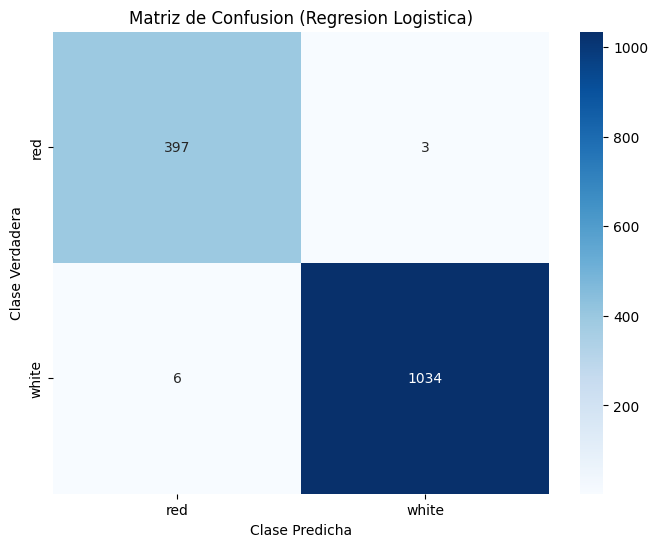

In [ ]:
# Calculo la matriz de confusion para el set test
cm = confusion_matrix(y_test_clf, y_pred_log)

# Obtengo las labels para las clases
class_labels = log_reg.classes_

# Creo un heatmap de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusion (Regresion Logistica)')
plt.show()

La matriz de Confusion para la Regresion Logistica muestra un buen desempeño del modelo, clasificando mejor los vinos blancos (solo 3 blancos clasificados como tintos). En el caso del tinto, falló en la clasificacion en 6 casos.

#### **DecisionTree**

In [ ]:
# Árbol de Decisión
print("\n--- Entrenando Árbol de Decisión ---")
tree_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

start_time = time.time()
tree_clf.fit(X_train_clf_scaled, y_train_clf)
end_time = time.time()
train_time_dt = end_time - start_time

y_pred_tree = tree_clf.predict(X_test_clf_scaled)

print(f"Tiempo de entrenamiento (Decision Tree): {train_time_dt:.4f} segundos")
print("\n\n\nReporte de clasificación (Decision Tree - Test):")
print(classification_report(y_test_clf, y_pred_tree))

# Obtener el classification report para calcular el F1-score
report_tree = classification_report(y_test_clf, y_pred_tree, output_dict=True)
f1_score_tree_weighted = report_tree['weighted avg']['f1-score']

# Guardamos los resultados y tiempo de entrenamiento en nuestro diccionario
model_results['Decision Tree'] = {
    'Accuracy_Test': accuracy_score(y_test_clf, y_pred_tree),
    'F1_Score_Weighted': f1_score_tree_weighted,
    'Train_Time_s': train_time_dt
}


--- Entrenando Árbol de Decisión ---
Tiempo de entrenamiento (Decision Tree): 0.1915 segundos



Reporte de clasificación (Decision Tree - Test):
              precision    recall  f1-score   support

         red       0.98      0.97      0.97       400
       white       0.99      0.99      0.99      1040

    accuracy                           0.99      1440
   macro avg       0.98      0.98      0.98      1440
weighted avg       0.99      0.99      0.99      1440



**Analisis de métricas**


ROC_AUC

ROC-AUC para Árbol de Decisión: 0.9807


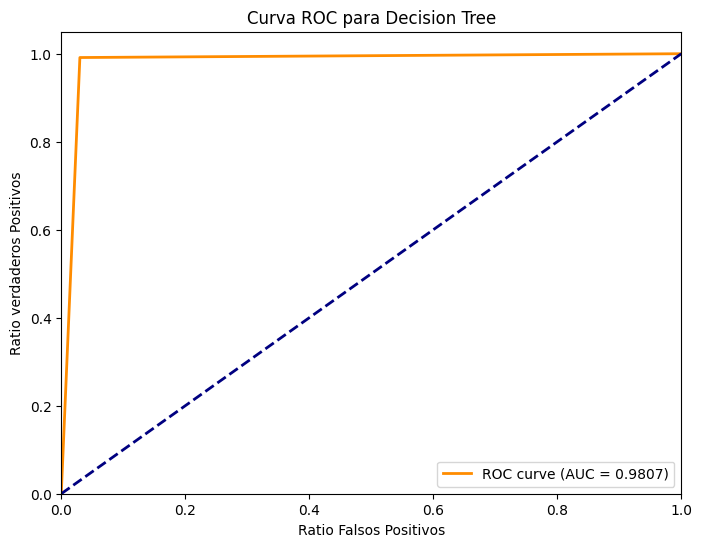

In [ ]:
# Obtengo probabilidades para la clase positiva (white)
y_pred_proba_tree = tree_clf.predict_proba(X_test_clf_scaled)[:, 1]

# Calculo curva ROC
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba_tree, pos_label='white')

# Calculo AUC
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC para Árbol de Decisión: {roc_auc:.4f}")

# Plot curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio Falsos Positivos')
plt.ylabel('Ratio verdaderos Positivos')
plt.title('Curva ROC para Decision Tree')
plt.legend(loc="lower right")
plt.show()

La curva ROC para el Arbol de Decision muestra un valor AUC = 0.9807. Este valor inferior a la Regresion Lineal analizada anteriormente muestra un buen desempeño. Se puede ver que cuando el Ratio de Verdaderos Positivos alcanza el valor 1, el Ratio de Falsos Positivos aumenta levemente.

**Matriz de Confusion**

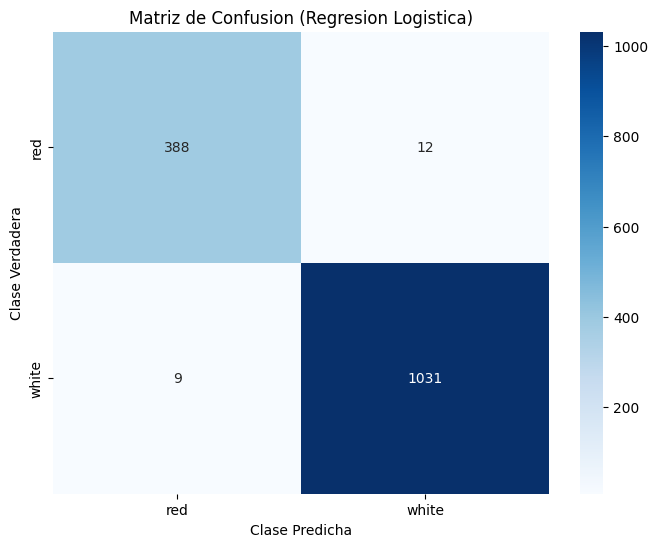

In [ ]:
# Calculo la matriz de confusion para el set test
cm = confusion_matrix(y_test_clf, y_pred_tree)

# Obtengo las labels para las clases
class_labels = tree_clf.classes_

# Creo un heatmap de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusion (Regresion Logistica)')
plt.show()

En la Matriz de Confusion para el Decision Tree vemos una mayor tasa de error en la clasificacion con respecto a la regresion logistica. En este modelo funciona mejor para la clasificacion de los vinos tintos (9 clasificados erroneamente vs 12 para el blanco)

<a name="completar_clasificacion"></a>
### 4.3. Modelos Avanzados y Optimización
Ahora es su turno. Deben entrenar un `RandomForestClassifier` y un `XGBClassifier`. Para ambos, utilicen `GridSearchCV` para encontrar los mejores hiperparámetros.

#### **Random Forest**

In [ ]:
# Defino la grilla de parámetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8],
    'max_features': ['sqrt', 'log2']
}

print("Iniciando GridSearchCV para Random Forest...")
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=2)

start_time_grid_search = time.time()
grid_search_rf.fit(X_train_clf_scaled, y_train_clf)
end_time_grid_search = time.time()
rf_train_time = end_time_grid_search - start_time_grid_search

print("\n--- Resultados de GridSearchCV (Random Forest) ---")
print(f"Mejores hiperparámetros encontrados: {grid_search_rf.best_params_}")
print(f"Mejor puntuación (precisión) en validación cruzada: {grid_search_rf.best_score_:.4f}")

best_rf_model = grid_search_rf.best_estimator_
y_test_pred_rf = best_rf_model.predict(X_test_clf_scaled)
test_accuracy_optimized_rf = accuracy_score(y_test_clf, y_test_pred_rf)
print(f"Accuracy del mejor modelo Random Forest (optimizado) en el conjunto de prueba: {test_accuracy_optimized_rf:.4f}")
print(f"Tiempo total de ejecución de GridSearchCV: {rf_train_time:.4f} segundos")

# Obtener el classification report para calcular el F1-score
report_rf = classification_report(y_test_clf, y_test_pred_rf, output_dict=True)
f1_score_rf_weighted = report_rf['weighted avg']['f1-score']
print(f"F1-Score (weighted avg) del mejor modelo Random Forest: {f1_score_rf_weighted:.4f}")

model_results['Random Forest (Optimizado)'] = {
    'Accuracy_Test': test_accuracy_optimized_rf,
    'F1_Score_Weighted': f1_score_rf_weighted,
    'Train_Time_s': rf_train_time
}

Iniciando GridSearchCV para Random Forest...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

--- Resultados de GridSearchCV (Random Forest) ---
Mejores hiperparámetros encontrados: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuación (precisión) en validación cruzada: 0.9926
Accuracy del mejor modelo Random Forest (optimizado) en el conjunto de prueba: 0.9944
Tiempo total de ejecución de GridSearchCV: 218.6407 segundos
F1-Score (weighted avg) del mejor modelo Random Forest: 0.9944


**Analisis de métricas**


ROC_AUC

ROC-AUC para Random Forest: 0.9662


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



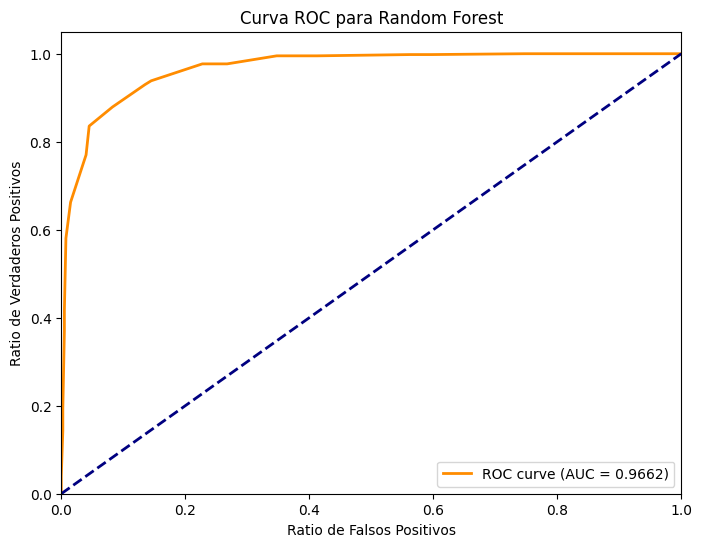

In [ ]:
# Probabilidades para la clase positiva white
y_pred_proba_rf = best_rf_model.predict_proba(X_test_clf)[:, 1]

# Calculo la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba_rf, pos_label='white')

# Calculo AUC
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC para Random Forest: {roc_auc:.4f}")

# Plot curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')
plt.title('Curva ROC para Random Forest')
plt.legend(loc="lower right")
plt.show()

La curva ROC para el Random Forest tiene un valor AUC = 0.9662. La recta se ve mas realista que en ambos modelos analizados anteriormente, ya que su valor AUC estaba muy proximo al 1.

**Matriz de Confusion**

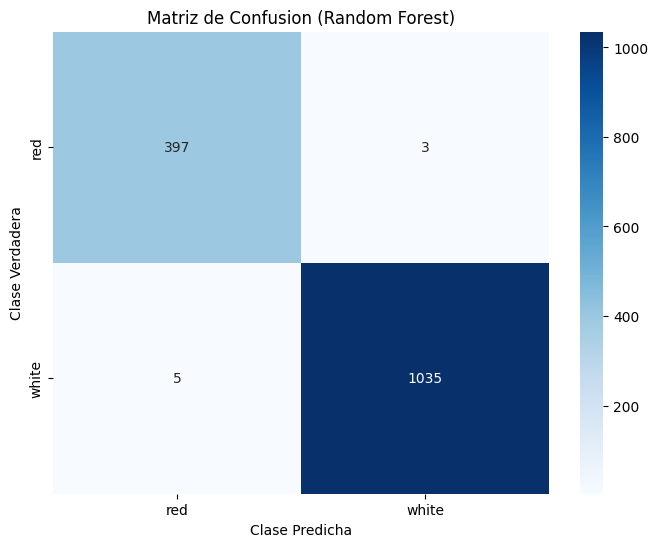

In [ ]:
# Calculo la matriz de confusion para el set test
cm = confusion_matrix(y_test_clf, y_test_pred_rf)

# Obtengo las labels de las clases
class_labels = best_rf_model.classes_

# Creo un heatmap de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusion (Random Forest)')
plt.show()

La matriz de confusion para este modelo muestra una buena clasificacion en ambos casos pero mejor para los vinos blancos (3 clasificados de manera incorrecta vs 5 para el tinto)


Top 10 características más importantes:
                        Feature  Importance
16  Indice Sulfatos / SO2 Total    0.242815
5                     SO2 Total    0.233915
3                      Cloruros    0.173928
0                Acidez Volatil    0.061134
6                      Densidad    0.055905
15     Indice SO2 libre / total    0.038758
8                      Sulfatos    0.027673
13   Densidad / Azucar Residual    0.027010
4                     SO2 Libre    0.024930
2               Azucar Residual    0.023642


/tmp/ipython-input-2987964873.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




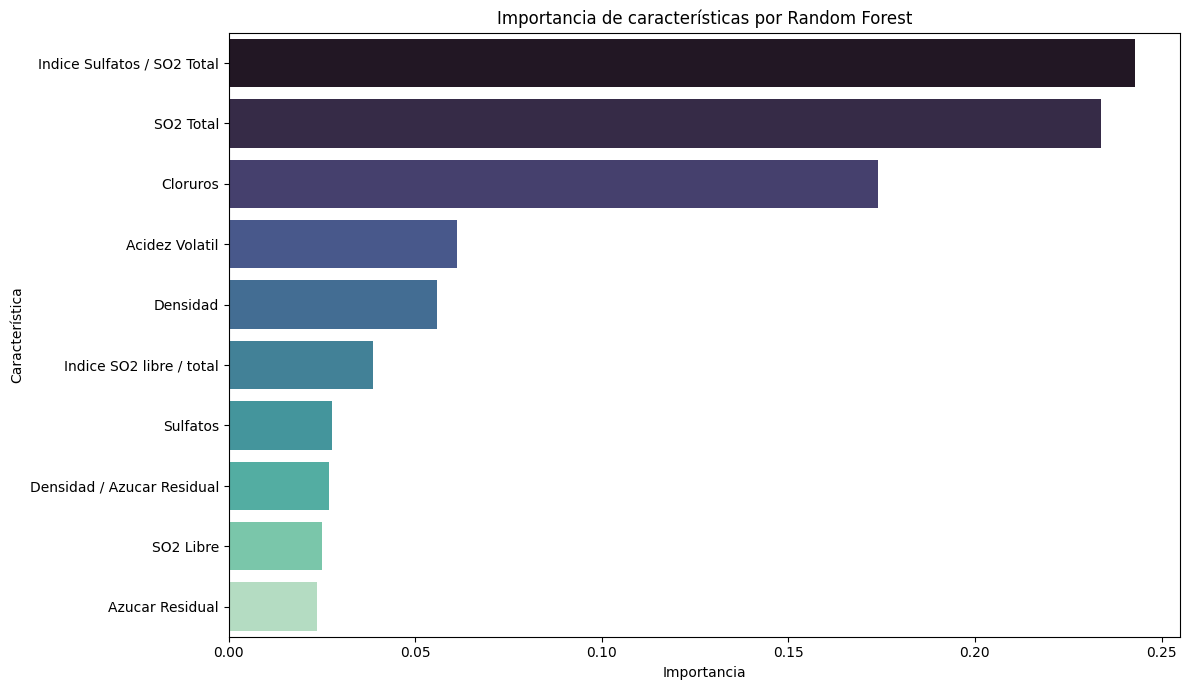

In [ ]:
# Usare el mejor modelo de Random Forest encontrado por GridSearchCV
feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X_train_clf.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 características más importantes:")
print(features_df.head(10))

# Visualización de la importancia de las características
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='mako')
plt.title('Importancia de características por Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

Se puede apreciar que las features con mayor importancia para el Random Forest Base son:
- Indice Sulfatos / SO2 Total
- SO2 Total
- Cloruros


#### **XGBClassifier**

In [ ]:
# Encode the target variable
y_train_clf_encoded, y_labels = pd.factorize(y_train_clf)
y_test_clf_encoded = pd.Categorical(y_test_clf, categories=y_labels).codes

# Defino la grilla de parámetros para XGBClassifier
param_grid_xgb = {
    'n_estimators': [300, 500, 700],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
}

xgb_tuned_base = xgb.XGBClassifier(objective='binary:logistic',
                                   eval_metric='logloss',
                                   random_state=42,
                                   n_jobs=-1)

grid_search_xgb = GridSearchCV(estimator=xgb_tuned_base,
                               param_grid=param_grid_xgb,
                               cv=3,
                               scoring='accuracy',
                               verbose=1,
                               n_jobs=-1)

start_time_xgb_opt = time.time()
grid_search_xgb.fit(X_train_clf_scaled, y_train_clf_encoded)
end_time_xgb_opt = time.time()
opt_time_xgb = end_time_xgb_opt - start_time_xgb_opt

print(f"Tiempo de optimización de hiperparámetros (XGBoost): {opt_time_xgb:.4f} segundos")
print("Mejores parámetros encontrados para XGBoost:", grid_search_xgb.best_params_)
print("Mejor accuracy en CV para XGBoost:", grid_search_xgb.best_score_)

best_xgb_model_tuned = grid_search_xgb.best_estimator_
y_test_pred_xgb_tuned = best_xgb_model_tuned.predict(X_test_clf_scaled)
test_accuracy_best_xgb_tuned = accuracy_score(y_test_clf_encoded, y_test_pred_xgb_tuned)

# Obtener el classification report para calcular el F1-score
report_xgb = classification_report(y_test_clf_encoded, y_test_pred_xgb_tuned, output_dict=True)
f1_score_xgb_weighted = report_xgb['weighted avg']['f1-score']

print(f"Accuracy del mejor modelo XGBoost (optimizado) en el conjunto de prueba: {test_accuracy_best_xgb_tuned:.4f}")
print(f"F1-Score (weighted avg) del mejor modelo XGBoost: {f1_score_xgb_weighted:.4f}")
print("\nReporte de Clasificación (XGBoost Optimizado - Test):")
print(classification_report(y_test_clf_encoded, y_test_pred_xgb_tuned))

model_results['XGBoost (Optimizado)'] = {
    'Accuracy_Test': test_accuracy_best_xgb_tuned,
    'F1_Score_Weighted': f1_score_xgb_weighted,
    'Train_Time_s': opt_time_xgb
}

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tiempo de optimización de hiperparámetros (XGBoost): 28.2610 segundos
Mejores parámetros encontrados para XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
Mejor accuracy en CV para XGBoost: 0.9932823720176048
Accuracy del mejor modelo XGBoost (optimizado) en el conjunto de prueba: 0.9986
F1-Score (weighted avg) del mejor modelo XGBoost: 0.9986

Reporte de Clasificación (XGBoost Optimizado - Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00      1040

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



**Analisis de métricas**


ROC_AUC

ROC-AUC para XGBoost (Optimizado): 1.0000


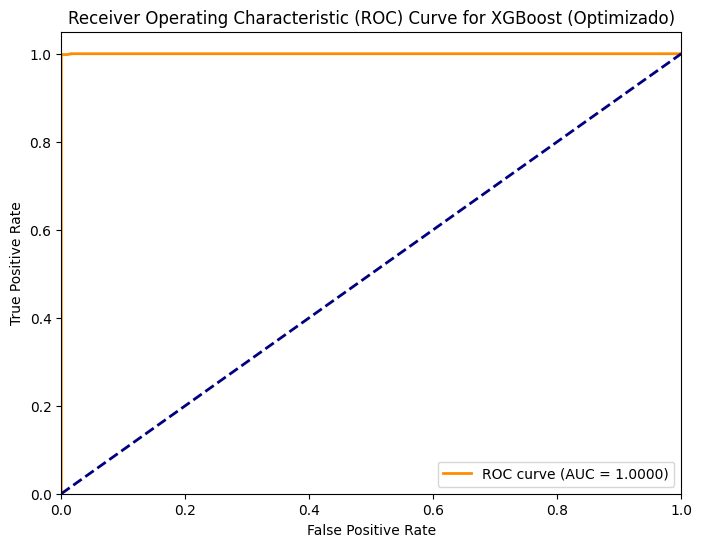

In [ ]:
# Probabilidades para la clase positiva white
y_pred_proba_xgb_tuned = best_xgb_model_tuned.predict_proba(X_test_clf_scaled)[:, 1]

# Calculo la curva ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_clf_encoded, y_pred_proba_xgb_tuned)

# Calculo AUC
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print(f"ROC-AUC para XGBoost (Optimizado): {roc_auc_xgb:.4f}")

# Plot curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost (Optimizado)')
plt.legend(loc="lower right")
plt.show()

La curva ROC para el XGBoost Classifier es "perfecta", con un valor AUC = 1. Por lo que Supone una clasificacion perfecta, lo cual pone en duda la calidad del modelo y la capacidad para clasificar nuevos datos fuera del dataset.

**Matriz de Confusion**

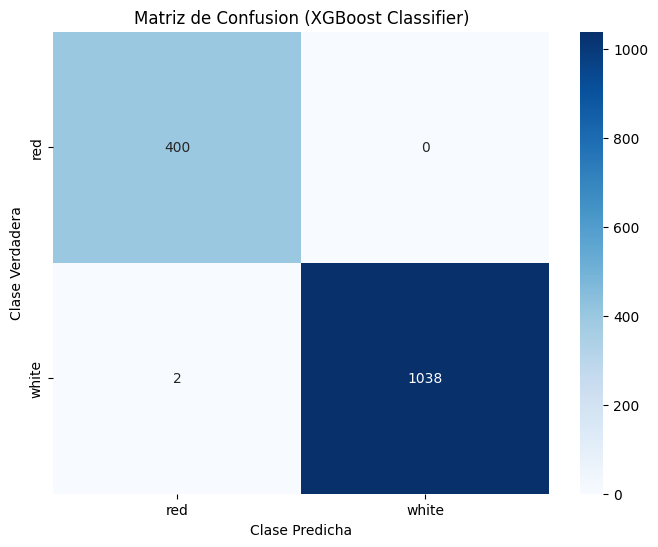

In [ ]:
# Calculo la matriz de confusion para el set test
cm = confusion_matrix(y_test_clf_encoded, y_test_pred_xgb_tuned)

# Obtengo las labels de las clases
class_labels = y_labels

# Creo un heatmap de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusion (XGBoost Classifier)')
plt.show()

La matriz de Confusion muestra una clasificacion perfecta para el tipo de vino blanco y casi excelente para el tinto (solo 2 Falsos Negativos). Esto puede sugerir que el modelo aprendio del dataset.

/tmp/ipython-input-4239776551.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




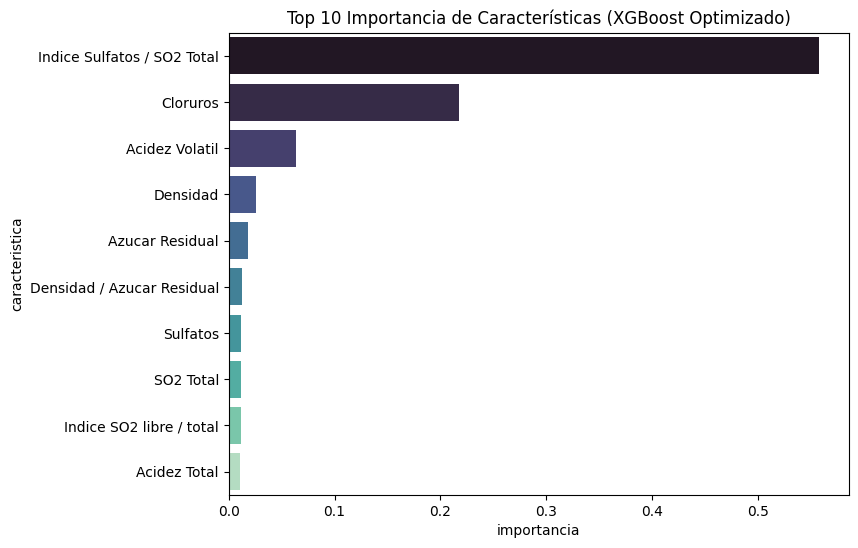

In [ ]:
# Importancia de Features para XGBoost
fi_xgb = pd.DataFrame(columns=["caracteristica", "importancia"])
fi_xgb["caracteristica"] = X_train_clf.columns
fi_xgb["importancia"] = best_xgb_model_tuned.feature_importances_
fi_xgb = fi_xgb.sort_values("importancia", ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(y=fi_xgb.caracteristica, x=fi_xgb.importancia, palette='mako')
plt.title('Top 10 Importancia de Características (XGBoost Optimizado)')
plt.show()

En base a este grafico podemos ver que la feature mas relevante para este modelo es el Indice Sulfatos / SO2 Total con una importancia mayor al 50%, seguida por los Cloruros.


Resumen Comparativo de Rendimiento y Tiempos:
                            Accuracy_Test  F1_Score_Weighted  Train_Time_s
Modelo                                                                    
XGBoost (Optimizado)               0.9986             0.9986       28.2610
Random Forest (Optimizado)         0.9944             0.9944      218.6407
Logistic Regression                0.9938             0.9938        0.1079
Decision Tree                      0.9854             0.9854        0.1915


/tmp/ipython-input-2296147022.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




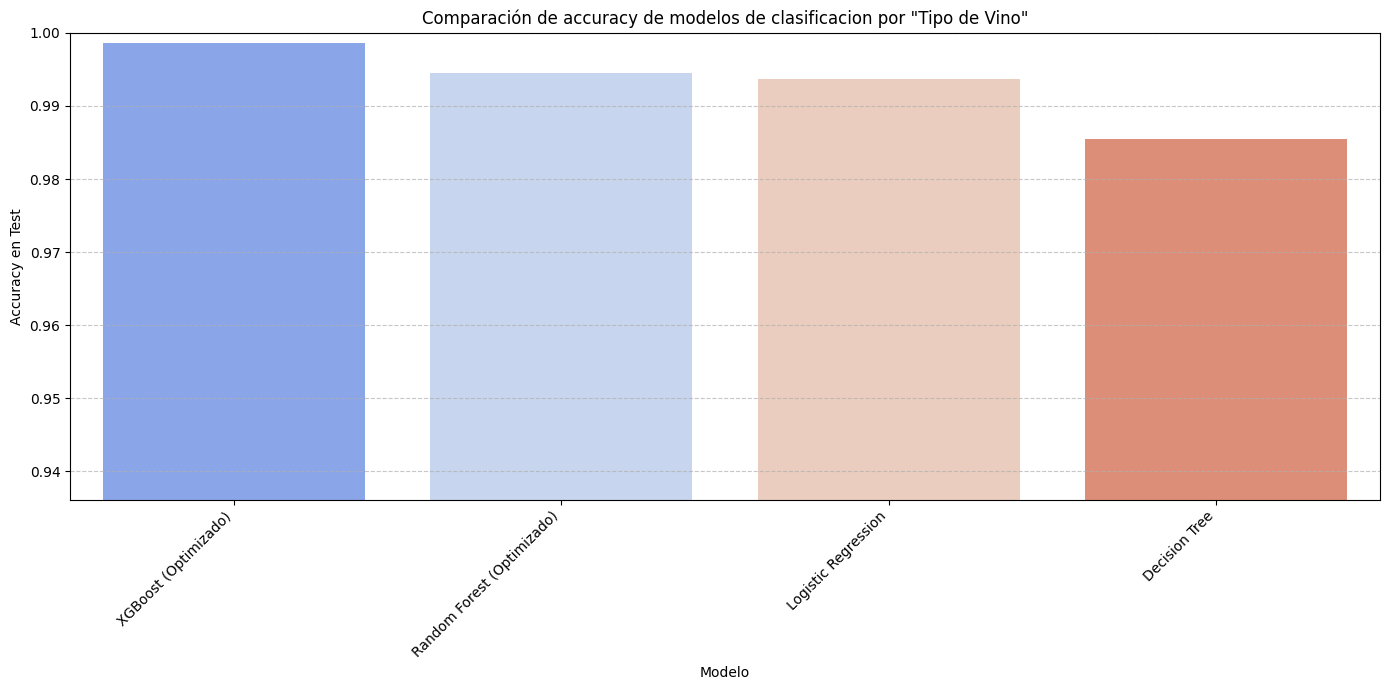

/tmp/ipython-input-2296147022.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




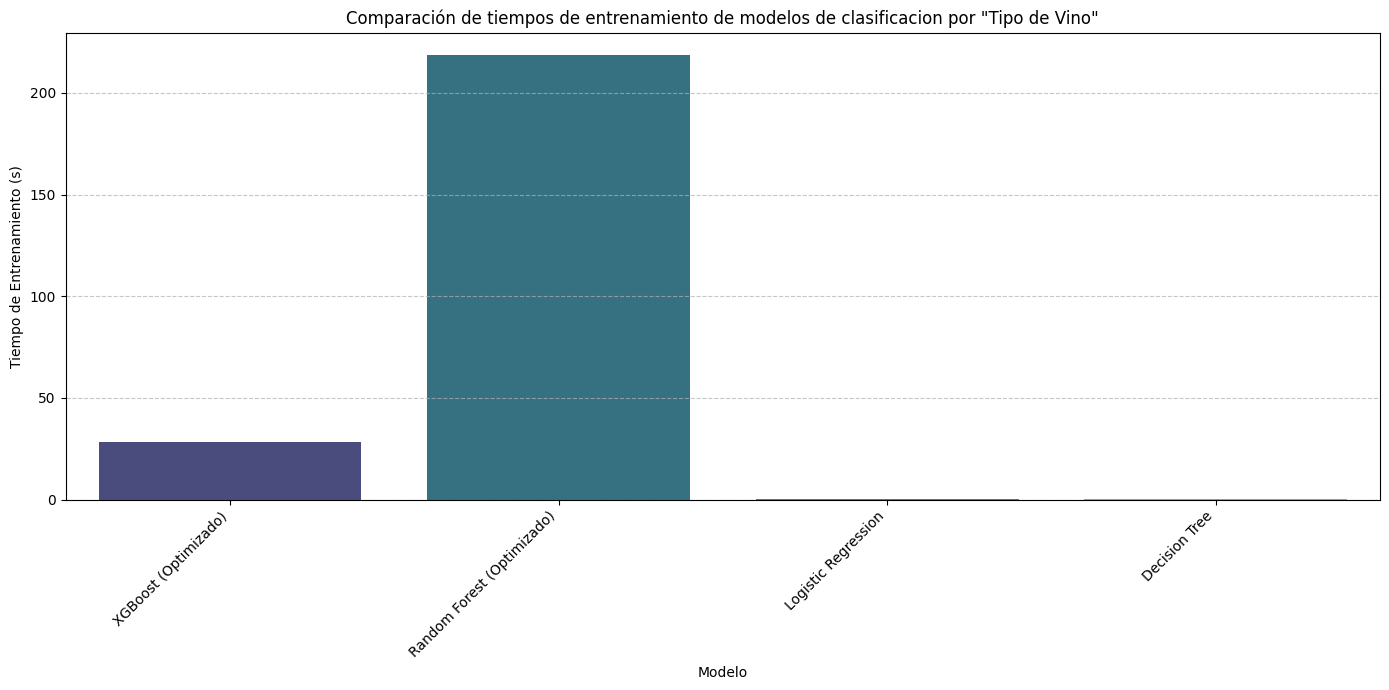

In [ ]:
# Convertir el diccionario de resultados en un DataFrame para una mejor visualización
final_results_df = pd.DataFrame.from_dict(model_results, orient='index')
final_results_df.index.name = 'Modelo'
final_results_df = final_results_df.sort_values(by='Accuracy_Test', ascending=False)

print("\nResumen Comparativo de Rendimiento y Tiempos:")
print(final_results_df.round(4))

# Visualización de la comparación de rendimiento (Accuracy)
plt.figure(figsize=(14, 7))
sns.barplot(x=final_results_df.index, y=final_results_df['Accuracy_Test'], palette='coolwarm')
plt.ylim(final_results_df['Accuracy_Test'].min() * 0.95, 1.0)
plt.ylabel('Accuracy en Test')
plt.title('Comparación de accuracy de modelos de clasificacion por "Tipo de Vino"')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualización de la comparación de tiempos de entrenamiento
plt.figure(figsize=(14, 7))
sns.barplot(x=final_results_df.index, y=final_results_df['Train_Time_s'], palette='viridis')
plt.ylabel('Tiempo de Entrenamiento (s)')
plt.title('Comparación de tiempos de entrenamiento de modelos de clasificacion por "Tipo de Vino"')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En el primer grafico se puede ver el rendimiento de la accuracy en los distintos modelos, donde el modelo XGBoost es el superior, seguido por el Random Forest y la Regresion Logistica casi al mismo nivel. Por ultimo se encuentra el Decision Tree con un 1% menor al resto.

En el segundo grafico se puede ver el Tiempo de Entrenamiento (TdE) en los distintos modelos. El modelo con mayor TdE por una amplia diferencia es el Random Forest Optimizado con 219s. En segundo lugar se encuentra el XGBoost Optimizado con 19s, y finalmente con un valor menor a 1s la Regresion Logistica y el Decision Tree

In [ ]:
print(model_results)

{'Logistic Regression': {'Accuracy_Test': 0.99375, 'F1_Score_Weighted': 0.9937571612471526, 'Train_Time_s': 0.10794544219970703}, 'Decision Tree': {'Accuracy_Test': 0.9854166666666667, 'F1_Score_Weighted': 0.9853997216719041, 'Train_Time_s': 0.19150161743164062}, 'Random Forest (Optimizado)': {'Accuracy_Test': 0.9944444444444445, 'F1_Score_Weighted': 0.9944486980602177, 'Train_Time_s': 218.64073276519775}, 'XGBoost (Optimizado)': {'Accuracy_Test': 0.9986111111111111, 'F1_Score_Weighted': 0.9986121745150545, 'Train_Time_s': 28.26098656654358}}


**Tabla comparativa de Rendimiento de Modelos**:

| Modelo | Accuracy | F1-Score (weighted avg) | Mejores Hiperparámetros (GridSearch) |
| :--- | :--- | :--- | :--- |
| Regresión Logística | 0.9937 | 0.9937 | N/A |
| Árbol de Decisión   | 0.9854 | 0.9854 | N/A |
| Random Forest       | 0.9944    | 0.9944    | {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100} |
| XGBoost             | 0.9986    | 0.9986    | {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
 |

* * *

### Conclusión de modelos de Clasificación

Considero que el mejor modelo para la tarea de clasificación es el Arbol de Decision debido a:
  - Su accuracy y F1-score son ligeramente inferior a los demás modelos, pero los demás al tener un valor cercano a 1 indican que aprendieron de los datos y pueden fallar al enfrentarse con datos nuevos.
  - Su matriz de confusión realiza un buen trabajo y demuestra una mejor tarea de clasificacion para los vinos tintos (9 Falsos Positivos vs 12 para los blancos).
  - Su curva ROC indica que el modelo mantiene un Ratio de Falsos Positivos  y Verdaderos Positivos altos constante.
  - El tiempo de entrenamiento es significativamente menor a los metodos optimizados con una duracion de 0.37s.

Sin embargo, las métricas son inusualmente altas, por lo que mas adelante se llevará a cabo otro experimento para ver como se comporta el modelo con mas datos, tratados de diferente forma y mas error.


<a name="regresion"></a>
## 5. Regresión (Predecir Calidad del Vino)
Ahora, el objetivo es predecir la puntuación de `quality` del vino.

<a name="prep_regresion"></a>
### 5.1. Preparación de Datos para Regresión

In [ ]:
# Definición de Features (X) y Target (y)
# Usaremos las mismas features, pero sin 'Tipo de Vino' y el target ahora es 'Calidad'
X_reg = df.drop(['Tipo de Vino', 'Calidad'], axis=1)
y_reg = df['Calidad']

# División en Train y Test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Escalamiento de datos
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

<a name="modelo_base_regresion"></a>
### 5.2. Modelo Base de Regresión

#### **Linear Regression**

In [ ]:
# Regresión Lineal
print("--- Entrenando Regresión Lineal ---")
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg_scaled)

start_time_lin = time.time()
mae_lin = mean_absolute_error(y_test_reg, y_pred_lin)
end_time_lin = time.time()
r2_lin = r2_score(y_test_reg, y_pred_lin)
lin_train_time = end_time_lin - start_time_lin

print(f"MAE Regresión Lineal: {mae_lin:.4f}")
print(f"R² Score Regresión Lineal: {r2_lin:.4f}")
print(f"Tiempo de entrenamiento (Regresión Lineal): {end_time_lin - start_time_lin:.4f} segundos")

# Agrego los resultados del modelo al diccionario
model_results['Linear Regression'] = {
    'MAE_Test': mae_lin,
    'R2_Test': r2_lin,
    'Train_Time_s': lin_train_time
}

--- Entrenando Regresión Lineal ---
MAE Regresión Lineal: 0.0530
R² Score Regresión Lineal: 0.9915
Tiempo de entrenamiento (Regresión Lineal): 0.0013 segundos


In [ ]:
# Creo un scatterplot para analizar el rendimiento del modelo Linear Regression
fig = px.scatter(x=y_test_reg, y=y_pred_lin, opacity=0.6,
                 labels={'x': 'Valores Reales (y_test_reg)', 'y': 'Valores Predichos (Linear Regression)'},
                 title='Valores Reales vs. Predichos (Linear Regression)')

# Agrego una diagonal de referencia
fig.add_trace(go.Scatter(x=[y_test_reg.min(), y_test_reg.max()], y=[y_test_reg.min(), y_test_reg.max()],
                         mode='lines', line=dict(color='black', dash='dash'),
                         name='Línea de Referencia'))

fig.update_layout(showlegend=True)
fig.show()

El grafico de dispercion muestra cuanto se alejan los valores reales de los predichos, en este vemos que en general el modelo realizo un muy buen trabajo de prediccion ya que los valores se encuentran bastante cerca de la recta teorica.

#### **Decision Tree Regression**

In [ ]:
# Árbol de Decisión para Regresión
print("\n--- Entrenando Árbol de Decisión (Regresión) ---")
tree_reg = DecisionTreeRegressor(max_depth = 3, random_state=42)
tree_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_tree_reg = tree_reg.predict(X_test_reg_scaled)

start_time_tree_reg = time.time()
mae_tree_reg = mean_absolute_error(y_test_reg, y_pred_tree_reg)
end_time_tree_reg = time.time()
r2_tree_reg = r2_score(y_test_reg, y_pred_tree_reg)
train_time_tree_reg = end_time_tree_reg - start_time_tree_reg

print(f"MAE Árbol de Decisión: {mae_tree_reg:.4f}")
print(f"R² Score Árbol de Decisión: {r2_tree_reg:.4f}")
print(f"Tiempo de entrenamiento (Árbol de Decisión): {end_time_tree_reg - start_time_tree_reg:.4f} segundos")

# Agrego los resultados del modelo al diccionario
model_results['Decision Tree Regression'] = {
    'MAE_Test': mae_tree_reg,
    'R2_Test': r2_tree_reg,
    'Train_Time_s': train_time_tree_reg
}


--- Entrenando Árbol de Decisión (Regresión) ---
MAE Árbol de Decisión: 0.2212
R² Score Árbol de Decisión: 0.8054
Tiempo de entrenamiento (Árbol de Decisión): 0.0010 segundos


#### **Random Forest Regression**

In [ ]:
# RandomForest para Regresión
print("\n--- Entrenando Random Forest (Regresión) ---")
rf_reg = RandomForestRegressor(max_depth = 3, random_state=42)
rf_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg_scaled)

start_time_rfr = time.time()
mae_rf_reg = mean_absolute_error(y_test_reg, y_pred_rf_reg)
end_time_rfr = time.time()
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)
train_time_rfr = end_time_rfr - start_time_rfr

print(f"MAE Random Forest: {mae_rf_reg:.4f}")
print(f"R² Score Random Forest: {r2_rf_reg:.4f}")
print(f"Tiempo de entrenamiento (Random Forest): {end_time_rfr - start_time_rfr:.4f} segundos")

# Agrego los resultados del modelo al diccionario
model_results['Random Forest Regression'] = {
    'MAE_Test': mae_rf_reg,
    'R2_Test': r2_rf_reg,
    'Train_Time_s': train_time_rfr
}


--- Entrenando Random Forest (Regresión) ---
MAE Random Forest: 0.1984
R² Score Random Forest: 0.8284
Tiempo de entrenamiento (Random Forest): 0.0010 segundos


<a name="completar_regresion"></a>
### 5.3. Modelos Avanzados y Optimización
Al igual que en la tarea de clasificación, deben implementar y optimizar los modelos `RandomForestRegressor` y `XGBRegressor`.

#### **Random Forest Regressor GSCV**

In [ ]:
# Defino la grilla de parámetros para Random Forest
param_grid_rfr = {
    'n_estimators': [50, 100, 150, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8],
    'max_features': ['sqrt', 'log2']
}

print("Iniciando GridSearchCV para Random Forest Regressor...")
grid_search_rfr = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rfr,
                              cv=3,
                              scoring='r2',
                              n_jobs=-1,
                              verbose=2)

start_time_grid_search = time.time()
grid_search_rfr.fit(X_train_reg_scaled, y_train_reg)
end_time_grid_search = time.time()
grid_search_train_time = end_time_grid_search - start_time_grid_search

print("\n--- Resultados de GridSearchCV (Random Forest Regressor) ---")
print(f"Mejores hiperparámetros encontrados: {grid_search_rfr.best_params_}")
print(f"Mejor puntuación (r2) en validación cruzada: {grid_search_rfr.best_score_:.4f}")

best_rfr_model = grid_search_rfr.best_estimator_

# Evaluo el mejor modelo obtenido en el set test
y_test_pred_rfr_tuned = best_rfr_model.predict(X_test_reg_scaled)
mae_rfr_tuned = mean_absolute_error(y_test_reg, y_test_pred_rfr_tuned)
r2_rfr_tuned = r2_score(y_test_reg, y_test_pred_rfr_tuned)


print(f"MAE del mejor modelo Random Forest Regressor (optimizado) en el conjunto de prueba: {mae_rfr_tuned:.4f}")
print(f"R² Score del mejor modelo Random Forest Regressor (optimizado) en el conjunto de prueba: {r2_rfr_tuned:.4f}")
print(f"Tiempo total de ejecución de GridSearchCV: {grid_search_train_time:.4f} segundos")

# Agrego los resultados del modelo al diccionario
model_results['Random Forest Regressor (Optimizado)'] = {
    'MAE_Test': mae_rfr_tuned,
    'R2_Test': r2_rfr_tuned,
    'Train_Time_s': grid_search_train_time
}

Iniciando GridSearchCV para Random Forest Regressor...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

--- Resultados de GridSearchCV (Random Forest Regressor) ---
Mejores hiperparámetros encontrados: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Mejor puntuación (r2) en validación cruzada: 0.9342
MAE del mejor modelo Random Forest Regressor (optimizado) en el conjunto de prueba: 0.0908
R² Score del mejor modelo Random Forest Regressor (optimizado) en el conjunto de prueba: 0.9537
Tiempo total de ejecución de GridSearchCV: 225.3490 segundos


In [ ]:
# Creo un scatterplot para analizar el rendimiento del modelo
fig = px.scatter(x=y_test_reg, y=y_test_pred_rfr_tuned, opacity=0.6,
                 labels={'x': 'Valores Reales (y_test_reg)', 'y': 'Valores Predichos (Random Forest Regressor)'},
                 title='Valores Reales vs. Predichos (Random Forest Regressor)')

# Agrego una diagonal de referencia
fig.add_trace(go.Scatter(x=[y_test_reg.min(), y_test_reg.max()], y=[y_test_reg.min(), y_test_reg.max()],
                         mode='lines', line=dict(color='black', dash='dash'),
                         name='Línea de Referencia'))

fig.update_layout(showlegend=True)
fig.show()

En este grafico de dispercion vemos que las predicciones del modelo de Random Forest se alejan un poco de los valores reales, los valores 4 son calificados como 5 en algunos casos, el 6 en general esta estable para arriba y abajo, pero el 7 tiende a predecirse como 6, esto se puede deber al desbalance de clases que se concentran entre 5 y 6.


Top 10 características más importantes para Random Forest Regressor:
                               Feature  Importance
18            Indice Alcohol * Calidad    0.598959
16         Relacion Densidad / Alcohol    0.089056
17                    Indice de Cuerpo    0.041339
6                             Densidad    0.036659
9   Ratio Acidez Volatil / Acidez Fija    0.021689
0                       Acidez Volatil    0.021418
13           Ratio Cloruros / Sulfatos    0.020747
14            Indice SO2 libre / total    0.019734
3                             Cloruros    0.017679
10   Ratio Acido Citrico / Acidez Fija    0.017472


/tmp/ipython-input-1052311913.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




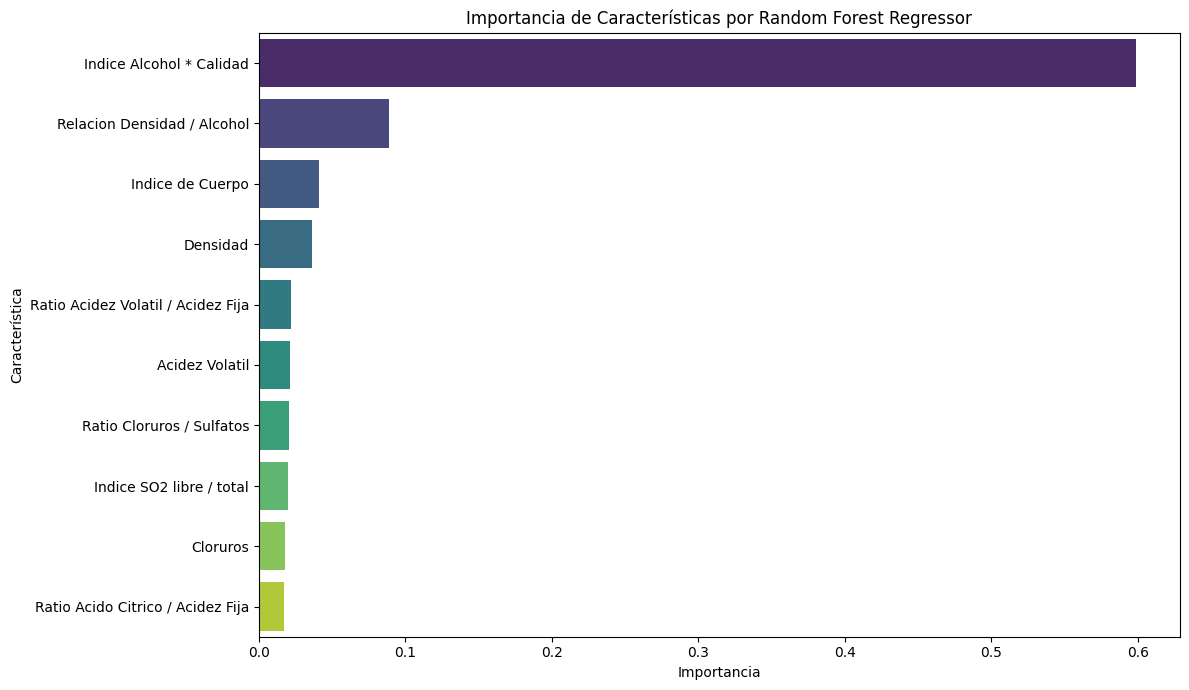

In [ ]:
# Obtengo la importancia de las features del mejor modelo de RandomForest Regressor
feature_importances_rfr = best_rfr_model.feature_importances_

# Creo un dataframe para visutalizacion
features_df_rfr = pd.DataFrame({'Feature': X_train_reg.columns, 'Importance': feature_importances_rfr})

# Ordeno por importancia
features_df_rfr = features_df_rfr.sort_values(by='Importance', ascending=False)

print("\nTop 10 características más importantes para Random Forest Regressor:")
print(features_df_rfr.head(10))

# Visualización de la importancia de las características
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df_rfr.head(10), palette='viridis')
plt.title('Importancia de Características por Random Forest Regressor')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

En este grafico podemos ver que la feature con mayor importancia para el Random Forest es el Indice Alcohol / Calidad con un 60%, seguia en mucha menor medida por la Relacion Densidad / Alcohol.

#### **XGBoost Regressor**

In [ ]:
# Defino la grilla de parámetros para XGBRegressor
param_grid_xgbr = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
}

xgb_reg_base = xgb.XGBRegressor(objective='reg:squarederror',
                                eval_metric='rmse',
                                random_state=42,
                                n_jobs=-1)

print("Iniciando GridSearchCV para XGBoost Regressor...")
grid_search_xgbr = GridSearchCV(estimator=xgb_reg_base,
                                param_grid=param_grid_xgbr,
                                cv=3,
                                scoring='r2',
                                verbose=1,
                                n_jobs=-1)

start_time_xgbr_opt = time.time()
grid_search_xgbr.fit(X_train_reg_scaled, y_train_reg)
end_time_xgbr_opt = time.time()
opt_time_xgbr = end_time_xgbr_opt - start_time_xgbr_opt

print(f"Tiempo de optimización de hiperparámetros (XGBoost Regressor): {opt_time_xgbr:.4f} segundos")
print("Mejores parámetros encontrados para XGBoost Regressor:", grid_search_xgbr.best_params_)
print(f"Mejor puntuación (r2) en validación cruzada: {grid_search_xgbr.best_score_:.4f}")


best_xgbr_model_tuned = grid_search_xgbr.best_estimator_
y_test_pred_xgbr_tuned = best_xgbr_model_tuned.predict(X_test_reg_scaled)
mae_xgbr_tuned = mean_absolute_error(y_test_reg, y_test_pred_xgbr_tuned)
r2_xgbr_tuned = r2_score(y_test_reg, y_test_pred_xgbr_tuned)


print(f"MAE del mejor modelo XGBoost Regressor (optimizado) en el conjunto de prueba: {mae_xgbr_tuned:.4f}")
print(f"R² Score del mejor modelo XGBoost Regressor (optimizado) en el conjunto de prueba: {r2_xgbr_tuned:.4f}")


# Cargo los resultados del mejor modelo al diccionario
model_results['XGBoost Regressor (Optimizado)'] = {
    'MAE_Test': mae_xgbr_tuned,
    'R2_Test': r2_xgbr_tuned,
    'Train_Time_s': opt_time_xgbr
}

Iniciando GridSearchCV para XGBoost Regressor...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tiempo de optimización de hiperparámetros (XGBoost Regressor): 53.2516 segundos
Mejores parámetros encontrados para XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Mejor puntuación (r2) en validación cruzada: 0.9975
MAE del mejor modelo XGBoost Regressor (optimizado) en el conjunto de prueba: 0.0086
R² Score del mejor modelo XGBoost Regressor (optimizado) en el conjunto de prueba: 0.9992


In [ ]:
# Creo un scatterplot para analizar el rendimiento del modelo
fig = px.scatter(x=y_test_reg, y=y_test_pred_xgbr_tuned, opacity=0.6,
                 labels={'x': 'Valores Reales (y_test_reg)', 'y': 'Valores Predichos (XGBoost Regressor)'},
                 title='Valores Reales vs. Predichos (XGBoost Regressor)')

# Agrego una diagonal de referencia
fig.add_trace(go.Scatter(x=[y_test_reg.min(), y_test_reg.max()], y=[y_test_reg.min(), y_test_reg.max()],
                         mode='lines', line=dict(color='black', dash='dash'),
                         name='Línea de Referencia'))

fig.update_layout(showlegend=True)
fig.show()

El grafico de Dispersion para XGBoost Regressor muestra una prediccion casi perfecta, los valores predichos se alejan muy poco del valor real.


Top 10 características más importantes para XGBoost Regressor:
                              Feature  Importance
18           Indice Alcohol * Calidad    0.806634
16        Relacion Densidad / Alcohol    0.181657
15        Indice Sulfatos / SO2 Total    0.004507
3                            Cloruros    0.000989
2                     Azucar Residual    0.000834
17                   Indice de Cuerpo    0.000804
6                            Densidad    0.000652
0                      Acidez Volatil    0.000649
10  Ratio Acido Citrico / Acidez Fija    0.000548
11                       Acidez Total    0.000545


/tmp/ipython-input-2626354818.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




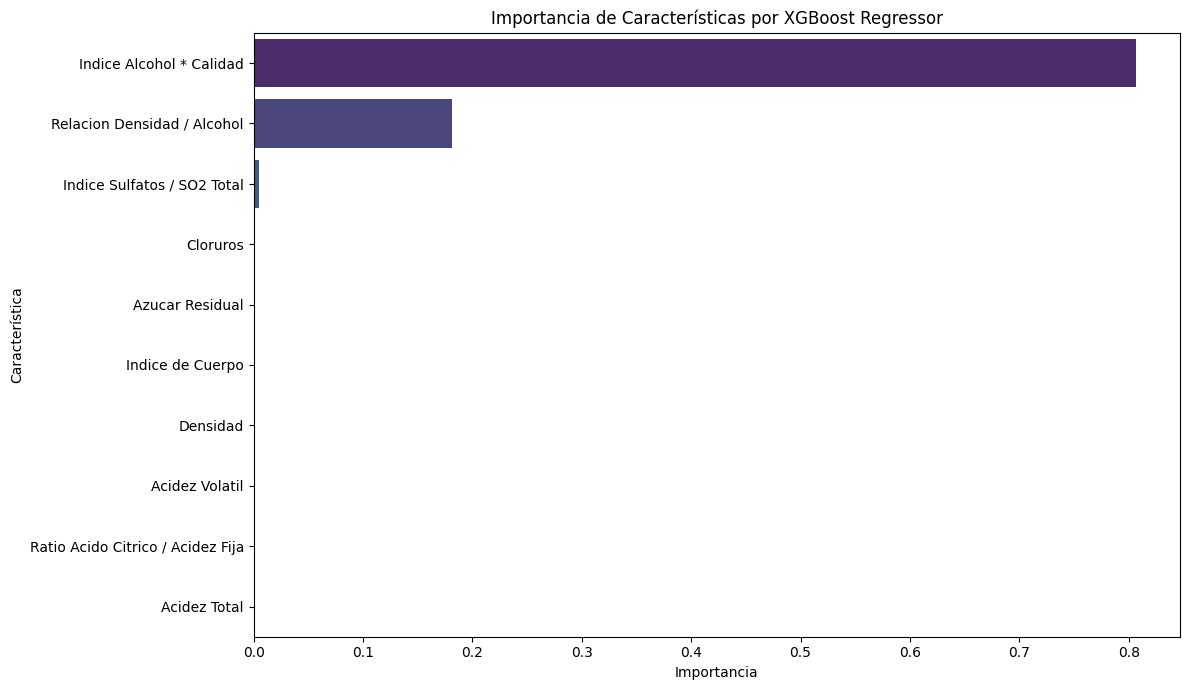

In [ ]:
# Obtengo la importancia de las features del mejor modelo de XGBoost Regressor
feature_importances_xgbr = best_xgbr_model_tuned.feature_importances_

# Creo un dataframe para visualizacion
features_df_xgbr = pd.DataFrame({'Feature': X_train_reg.columns, 'Importance': feature_importances_xgbr})

# Ordeno por importancia
features_df_xgbr = features_df_xgbr.sort_values(by='Importance', ascending=False)

print("\nTop 10 características más importantes para XGBoost Regressor:")
print(features_df_xgbr.head(10))

# Visualización de la importancia de las características
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df_xgbr.head(10), palette='viridis')
plt.title('Importancia de Características por XGBoost Regressor')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

En este grafico podemos ver que la feature con mayor importancia para el Random Forest es el Indice Alcohol / Calidad con un 80%, seguida por la Relacion Densidad / Alcohol con un 18% explicando casi la totalidad del modelo.

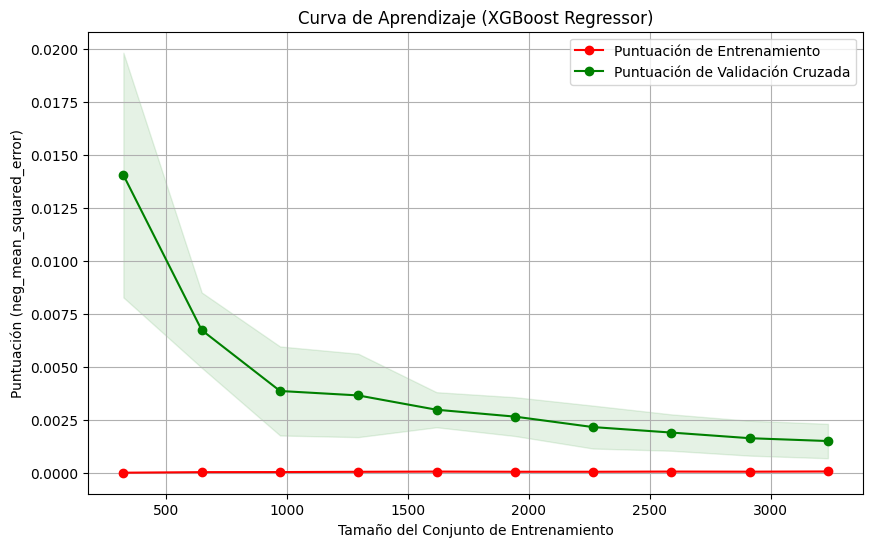

In [ ]:
# Curva de aprendizaje para el mejor modelo de XGBoost Regressor
model_to_plot = best_xgbr_model_tuned

# Defino el scoring para la curva de aprendizaje (igual al del GridSearchCV)
scoring_metric = 'neg_mean_squared_error'

# Calculo la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model_to_plot, X_train_reg_scaled, y_train_reg, cv=4, scoring=scoring_metric, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10) # Use 10 different training set sizes
)

# Convierto los puntajes a positivos y obtengo la media
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafico la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje (XGBoost Regressor)")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel(f"Puntuación ({scoring_metric})")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Puntuación de Validación Cruzada")

plt.legend(loc="best")
plt.show()

En base a esta curva de aprendizaje podemos ver que el modelo de XGBoost Regressor comienza a aprender patrones a partir del 1000, cada vez disminuyendo mas su Puntuacion pero el error de validacion no llega a igualar al de entrenamiento lo que sugiere ligero overfitting.


Resumen Comparativo de Rendimiento y Tiempos para Modelos de Regresión:


,Accuracy_Test,F1_Score_Weighted,Train_Time_s,MAE_Test,R2_Test
Modelo,,,,,
XGBoost Regressor (Optimizado),NaN,NaN,53.2516,0.0086,0.9992
Linear Regression,NaN,NaN,0.0013,0.0530,0.9915
Random Forest Regressor (Optimizado),NaN,NaN,225.3490,0.0908,0.9537
Random Forest Regression,NaN,NaN,0.0010,0.1984,0.8284
Decision Tree Regression,NaN,NaN,0.0010,0.2212,0.8054


/tmp/ipython-input-2069712434.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




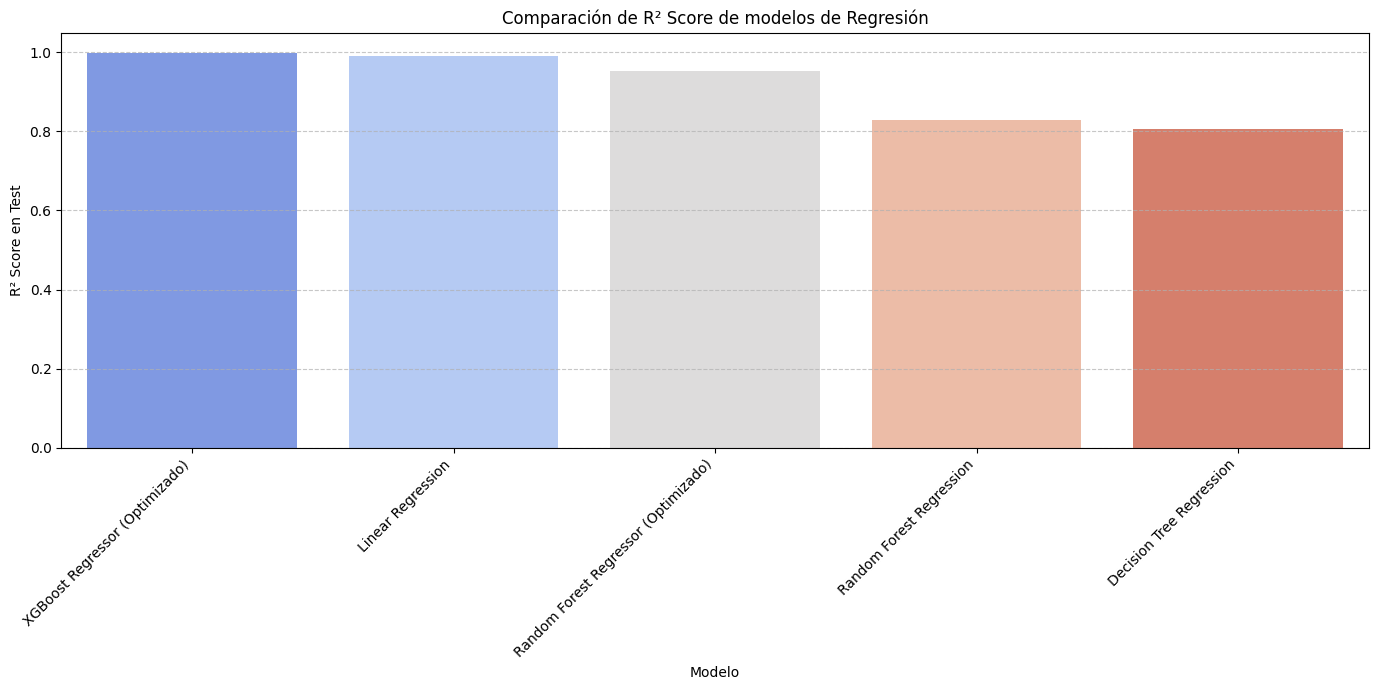

/tmp/ipython-input-2069712434.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




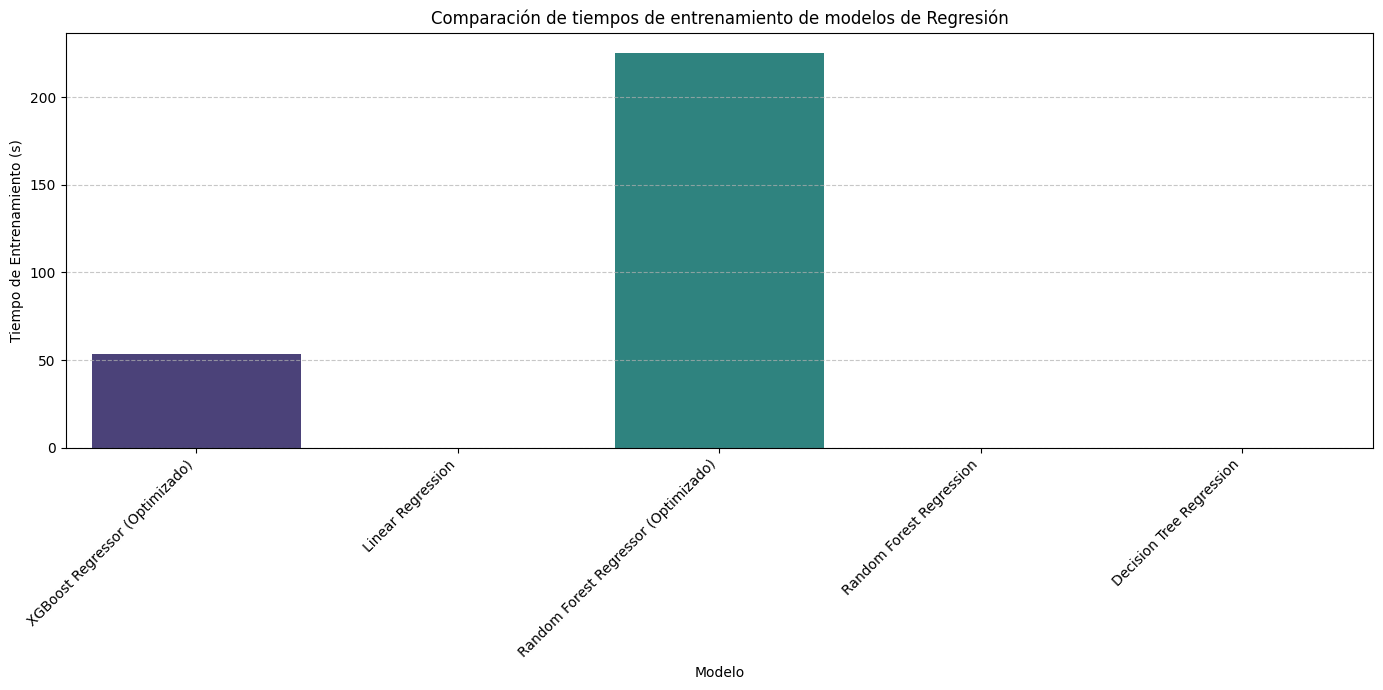

In [ ]:
# Convert the dictionary of results into a DataFrame
final_results_df = pd.DataFrame.from_dict(model_results, orient='index')
final_results_df.index.name = 'Modelo'

# Filter to include only the requested regression models
regression_models = [
    'Linear Regression',
    'Decision Tree Regression',
    'Random Forest Regression',
    'Random Forest Regressor (Optimizado)',
    'XGBoost Regressor (Optimizado)'
]
final_results_df_reg = final_results_df.loc[regression_models].copy()

# Sort by R2_Test (a common metric for regression performance) in descending order
final_results_df_reg = final_results_df_reg.sort_values(by='R2_Test', ascending=False)


print("\nResumen Comparativo de Rendimiento y Tiempos para Modelos de Regresión:")
display(final_results_df_reg.round(4))

# Visualización de la comparación de rendimiento (R2 Score)
plt.figure(figsize=(14, 7))
sns.barplot(x=final_results_df_reg.index, y=final_results_df_reg['R2_Test'], palette='coolwarm')
plt.ylabel('R² Score en Test')
plt.title('Comparación de R² Score de modelos de Regresión')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualización de la comparación de tiempos de entrenamiento
plt.figure(figsize=(14, 7))
sns.barplot(x=final_results_df_reg.index, y=final_results_df_reg['Train_Time_s'], palette='viridis')
plt.ylabel('Tiempo de Entrenamiento (s)')
plt.title('Comparación de tiempos de entrenamiento de modelos de Regresión')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El primer grafico muestra el R2 Score de los modelos. Se puede ver que el XGBoost Regressor y la Linear Regression obtienen valores muy cercanos al 1, seguido por el Random Forest Regressor Optimizado con un valor de 0.95. Luego se encuentra el Random Forest Regressor Base y el Decision Tree con 83% y 80% respectivamente.

El segundo grafico muestra el TdE. Liderado por el Random Forest Regressor Optimizado con 240s. Luego encontramos el XGBoost Regressor con 54s y finalmente la Linear Regression, Random Forest Regression y Decision Tree Regression con tiempos que no alcanzan 1s.

In [ ]:
print(model_results)

{'Logistic Regression': {'Accuracy_Test': 0.99375, 'F1_Score_Weighted': 0.9937571612471526, 'Train_Time_s': 0.10794544219970703}, 'Decision Tree': {'Accuracy_Test': 0.9854166666666667, 'F1_Score_Weighted': 0.9853997216719041, 'Train_Time_s': 0.19150161743164062}, 'Random Forest (Optimizado)': {'Accuracy_Test': 0.9944444444444445, 'F1_Score_Weighted': 0.9944486980602177, 'Train_Time_s': 218.64073276519775}, 'XGBoost (Optimizado)': {'Accuracy_Test': 0.9986111111111111, 'F1_Score_Weighted': 0.9986121745150545, 'Train_Time_s': 28.26098656654358}, 'Linear Regression': {'MAE_Test': 0.0529508633852367, 'R2_Test': 0.9914690807937501, 'Train_Time_s': 0.001298666000366211}, 'Decision Tree Regression': {'MAE_Test': 0.22119516624113836, 'R2_Test': 0.8053861696447012, 'Train_Time_s': 0.0010230541229248047}, 'Random Forest Regression': {'MAE_Test': 0.19842727670796406, 'R2_Test': 0.8284044331138769, 'Train_Time_s': 0.0010027885437011719}, 'Random Forest Regressor (Optimizado)': {'MAE_Test': 0.090832

### Conclusión de los modelos de Regresión

**Escriban su conclusión aquí.**
*¿Qué modelo tuvo el mejor rendimiento? ¿Qué significan los valores de MAE y R² que obtuvieron? ¿La predicción de la calidad es una tarea fácil o difícil para estos modelos? Justifiquen su respuesta basándose en las métricas y el gráfico.*


| Modelo | MAE (Mean Absolute Error) | R² Score | Mejores Hiperparámetros (GridSearch) |
| :--- | :--- | :--- | :--- |
| Regresión Lineal | 0.0530| 0.9915| N/A |
| Árbol de Decisión Regressor (Base) | 0.2212 | 0.8054 | N/A |
| RandomForest Regressor (Base)| 0.1984    | 0.8284    | N/A |
| RandomForest Regressor (Optimizado)| 0.0908    | 0.9342    | {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300} |
| XGBoost Regressor     | 0.0086    | 0.9975    | {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500} |

* * *


El modelo con mejor rendimiento de los evaluados es el Random Forest Regressor Optimizado:
  - Su MAE es razonable (0.0908 vs 0.0086 que representa el mejor valor perteneciente a XGBoost Regressor), esto explica cuanto se equivoca el modelo para predecir los valores en la misma unidad.
  - Su R2 Score de 0.9342 indica que el modelo se funciona muy bien para predecir la Calidad (explica el 93% de los datos).
  - Su contra es que el tiempo de entrenamiento es significativamente mayor a todos los demas (239.9s).

Si tuviera que priorizar el tiempo de entrenamiento, elegiría el Random Forest Regressor (Base) debido a su tiempo tan bajo, a su R2 de casi 0.83, explicando alrededor del 83% de los datos, y un MAE de 0.2.




La prediccion de la calidad fue mas dificil para algunos de los modelos analizados (DecisionTree Regressor GSCV y RandomForest Regressor GSCV) ya que su MAE es significativamente mas alto, y el R2 mas bajo que el de Regresion Lineal, RandomForest Regressor GSCV y XGBoost Regressor.

Los modelos de Regresion Lineal y XGBoost Regressor predijeron casi a la perfección lo que indica que el modelo puede haber aprendido de los datos.

# EXPERIMENTO 2

En base a lo realizado anteriormente, se repetirá el experimento pero con diferentes criterios para tratar outliers e incorporando la informacion obtenida sobre features a tener en cuenta y otras a eliminar.

## Analisis Exploratorio de Datos

In [ ]:
# Trabajo con una copia del DataFrame original df_ori
df_2 = df_ori.copy()

### Outliers y Duplicados

In [ ]:
# Cantidad de filas totales antes de eliminar duplicados
filas_antes = len(df_2)
duplicadas_antes = df_2.duplicated().sum()
print(f"Filas totales antes: {filas_antes}")
print(f"Filas duplicadas antes: {duplicadas_antes}")

# Analizo las filas duplicadas completas
df_duplicadas = df_2[df_2.duplicated(keep=False)].sort_values(by=list(df_2.columns))
print(f"\nTotal de filas duplicadas detectadas: {len(df_duplicadas)}")

# Elimino las duplicadas
df_2 = df_2.drop_duplicates().reset_index(drop=True)

# Cuento filas y duplicados después de limpiar
filas_despues = len(df_2)
duplicadas_despues = df_2.duplicated().sum()
print(f"\nFilas totales después: {filas_despues}")
print(f"Filas duplicadas después: {duplicadas_despues}")

# Verificar si cambió la cantidad por tipo de vino
print("\nDistribución por 'Tipo de Vino' después de eliminar duplicados:")
print(df_2['Tipo de Vino'].value_counts())


Filas totales antes: 6497
Filas duplicadas antes: 1177

Total de filas duplicadas detectadas: 2169

Filas totales después: 5320
Filas duplicadas después: 0

Distribución por 'Tipo de Vino' después de eliminar duplicados:
Tipo de Vino
white    3961
red      1359
Name: count, dtype: int64


En este caso voy a eliminar los outliers para ambos tipos de vino excluyendo 'Calidad', ya que asumo que las calificaciones son correctas debido a que se encuentran en valores logicos (entre 1 y 10).

In [ ]:
df_2 = df_ori.copy()

# Selecciono las columnas numericas excluyendo 'Calidad'
numerical_cols_no_quality = df_2.select_dtypes(include=np.number).drop(columns=['Calidad'])

# Calculo Q1, Q3, e IQR para columnas numericas (excluyendo 'Calidad')
Q1 = numerical_cols_no_quality.quantile(0.25)
Q3 = numerical_cols_no_quality.quantile(0.75)
IQR = Q3 - Q1

# Definir los limites para outliers (excluyendo 'Calidad')
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bounds for numerical columns (excluding 'Calidad'):\n", lower_bound)
print("\nUpper bounds for numerical columns (excluding 'Calidad'):\n", upper_bound)

# Identifico outliers para cada columna numerica
outliers_count = {}
for col in lower_bound.index:
    col_outliers = df_2[(df_2[col] < lower_bound[col]) | (df_2[col] > upper_bound[col])]
    outliers_count[col] = len(col_outliers)

print("Numeros de outliers por columna numerica (utilizando IQR):")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Lower bounds for numerical columns (excluding 'Calidad'):
 Acidez Fija         4.450000
Acidez Volatil     -0.025000
Acido Citrico       0.040000
Azucar Residual    -7.650000
Cloruros           -0.002500
SO2 Libre         -19.000000
SO2 Total         -41.500000
Densidad            0.985365
pH                  2.795000
Sulfatos            0.175000
Alcohol             6.800000
dtype: float64

Upper bounds for numerical columns (excluding 'Calidad'):
 Acidez Fija          9.650000
Acidez Volatil       0.655000
Acido Citrico        0.600000
Azucar Residual     17.550000
Cloruros             0.105500
SO2 Libre           77.000000
SO2 Total          274.500000
Densidad             1.003965
pH                   3.635000
Sulfatos             0.855000
Alcohol             14.000000
dtype: float64
Numeros de outliers por columna numerica (utilizando IQR):
Acidez Fija: 357
Acidez Volatil: 377
Acido Citrico: 509
Azucar Residual: 118
Cloruros: 286
SO2 Libre: 62
SO2 Total: 10
Densidad: 3
pH: 73
Sulfa

In [ ]:
# Defino las filas a eliminar
rows_to_drop_exp2 = []

for col in lower_bound.index:
    col_outliers = df_2[(df_2[col] < lower_bound[col]) | (df_2[col] > upper_bound[col])]
    rows_to_drop_exp2.extend(col_outliers.index.tolist())

rows_to_drop_exp2 = list(set(rows_to_drop_exp2))

print(f"Numero de filas con outliers unicos: {len(rows_to_drop_exp2)}")
print(f"\nForma original del DataFrame df_2: {df_2.shape}")

df_2 = df_2.drop(rows_to_drop_exp2)

print(f"Forma del DataFrame df_2 después de eliminar outliers: {df_2.shape}")

print("\nPrimeras 5 filas del DataFrame después de eliminar outliers:")
display(df_2.head())

print("\nEstadísticas Descriptivas del DataFrame después de eliminar outliers:")
display(df_2.describe())

print("\nDistribución de la variable 'Tipo de Vino' después de eliminar outliers:")
print(df_2['Tipo de Vino'].value_counts())

Numero de filas con outliers unicos: 1473

Forma original del DataFrame df_2: (6497, 13)
Forma del DataFrame df_2 después de eliminar outliers: (5024, 13)

Primeras 5 filas del DataFrame después de eliminar outliers:


,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red



Estadísticas Descriptivas del DataFrame después de eliminar outliers:


,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000
mean,6.967546,0.298435,0.316131,5.561764,0.047410,31.905951,124.715764,0.994122,3.210472,0.505000,10.570302,5.891123
std,0.878608,0.114800,0.100481,4.495427,0.016354,15.583136,49.787343,0.002786,0.148075,0.116452,1.195532,0.863515
min,4.700000,0.080000,0.040000,0.600000,0.009000,2.000000,6.000000,0.987110,2.800000,0.220000,8.400000,3.000000
25%,6.400000,0.220000,0.260000,1.800000,0.036000,20.000000,95.000000,0.991820,3.110000,0.420000,9.500000,5.000000
50%,6.900000,0.280000,0.310000,3.900000,0.044000,31.000000,125.000000,0.994100,3.200000,0.490000,10.400000,6.000000
75%,7.500000,0.350000,0.370000,8.400000,0.054000,43.000000,159.000000,0.996293,3.310000,0.580000,11.400000,6.000000
max,9.600000,0.655000,0.600000,17.500000,0.105000,77.000000,272.000000,1.001820,3.630000,0.850000,14.000000,9.000000



Distribución de la variable 'Tipo de Vino' después de eliminar outliers:
Tipo de Vino
white    4336
red       688
Name: count, dtype: int64


Analizo la distribucion de los datos segun 'Tipo de Vino' post procesamiento de outliers y duplicados:

In [ ]:
# Realizo un barplot para analizar la distribucion de la variable categorica Tipo de Vino
type_counts = df_2['Tipo de Vino'].value_counts(normalize=True).reset_index()
type_counts.columns = ['Tipo de Vino', 'proportion']
type_counts['proportion'] = type_counts['proportion'] * 100

fig = px.bar(type_counts, x='Tipo de Vino', y='proportion',
             title='Distribución Relativa del Tipo de Vino',
             labels={'Tipo de Vino': 'Tipo de Vino', 'proportion': 'Porcentaje'},
             color='Tipo de Vino',
             color_discrete_map={'red': '#B22222', 'white': '#9DC183'},
             )
fig.show()

Las clases se encuentran mas desbalanceadas debido al procesamiento, 86% de los valores corresponden al vino blanco y 14% al vino tinto.

### Datos Sinteticos

Voy a generar datos sinteticos debido a la poca cantidad de datos resultantes luego de tratar los outliers y datos duplicados y asi balancear las clases

In [ ]:
# Separo los dataframes en base al Tipo de Vino para ver sus medias y desviaciones
df_red = df_2[df_2['Tipo de Vino'] == 'red']
df_white = df_2[df_2['Tipo de Vino'] == 'white']

In [ ]:
# Usare las medias sin modificar para la generacion de datos sinteticos
# A la desviacion estandar le agregare un 5% de error en los datos sinteticos
df_red.describe()

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,7.721366,0.461991,0.271119,2.439680,0.076090,17.101017,51.130814,0.996214,3.334956,0.623939,10.417733,5.677326
std,0.959679,0.118627,0.131861,1.235013,0.013045,9.889435,33.377690,0.001557,0.113431,0.102391,1.057257,0.740162
min,5.000000,0.120000,0.040000,0.900000,0.012000,3.000000,6.000000,0.990070,2.890000,0.370000,8.700000,4.000000
25%,7.100000,0.380000,0.170000,1.900000,0.069000,9.000000,25.000000,0.995287,3.260000,0.550000,9.500000,5.000000
50%,7.650000,0.470000,0.265000,2.100000,0.077000,15.000000,42.500000,0.996335,3.330000,0.610000,10.200000,6.000000
75%,8.400000,0.560000,0.370000,2.500000,0.084000,24.000000,68.250000,0.997300,3.400000,0.700000,11.100000,6.000000
max,9.600000,0.655000,0.600000,13.400000,0.105000,72.000000,165.000000,1.000100,3.630000,0.850000,14.000000,8.000000


Genero la funcion para generar los datos sinteticos de ambos Tipos de Vino teniendo en cuenta lo mencionado anteriormente

In [ ]:
class DataGenerator(ABC):
    " Clase que define la estructura de un generador de datos"
    def __init__(self, seed: int = 42):
        self.seed = seed
        random.seed(self.seed)

    @abstractmethod
    def generate_record(self, record_id: int) -> Dict[str, Any]:
        " Método para generar un registro individual"
        pass

    def generate_dataset(self, num_records: int) -> List[Dict[str, Any]]:
      " Método para generar una lista de registros sintéticos "
      return [self.generate_record(i + 1) for i in range(num_records)]

In [ ]:
class RedWineDataGenerator(DataGenerator):
    """Generador de datos sintéticos para vino tinto."""

    def __init__(self, seed: int = 42):
        super().__init__(seed)

    def Acidez_Fija(self) -> float:
        return random.gauss(7.7200, 1.0233)

    def Acidez_Volatil(self) -> float:
        return random.gauss(0.4601, 0.1234)

    def Acido_Citrico(self) -> float:
        return random.gauss(0.2714, 0.1395)

    def Azucar_Residual(self) -> float:
        return random.gauss(2.4490, 1.3128)

    def Cloruros(self) -> float:
        return random.gauss(0.0759, 0.0137)

    def SO2_Libre(self) -> float:
        return random.gauss(16.9853, 10.4622)

    def SO2_Total(self) -> float:
        return random.gauss(51.1603, 5.3428)

    def Densidad(self) -> float:
        return random.gauss(0.9962, 0.0016)

    def pH(self) -> float:
        return random.gauss(3.3320, 0.1180)

    def Sulfatos(self) -> float:
        return random.gauss(0.6217, 0.1048)

    def Alcohol(self) -> float:
        return random.gauss(10.4222, 1.1256)

    def Calidad(self) -> int:
        valor = int(round(random.gauss(5.6689, 0.8787)))
        return min(max(valor, 4), 8)

    def generate_record(self, record_id: int) -> Dict[str, Any]:
        """Genera un registro completo de vino tinto."""
        return {
            'Acidez Fija': self.Acidez_Fija(),
            'Acidez Volatil': self.Acidez_Volatil(),
            'Acido Citrico': self.Acido_Citrico(),
            'Azucar Residual': self.Azucar_Residual(),
            'Cloruros': self.Cloruros(),
            'SO2 Libre': self.SO2_Libre(),
            'SO2 Total': self.SO2_Total(),
            'Densidad': self.Densidad(),
            'pH': self.pH(),
            'Sulfatos': self.Sulfatos(),
            'Alcohol': self.Alcohol(),
            'Calidad': self.Calidad(),
            'Tipo de Vino': 'red',
        }

    def generate_dataset(self, n_red: int) -> List[Dict[str, Any]]:
        """Genera un dataset de vinos tintos."""
        return [self.generate_record(i + 1) for i in range(n_red)]


Genero un dataset con Tipos de Vino tinto para llevar al dataset original de un desbalance del 86-14% a un aproximado de 55-45%.

In [ ]:
wine_gen = RedWineDataGenerator(seed=42)

# Genero 2800 tintos
dataset = wine_gen.generate_dataset(n_red=2800)

# Convierto a DataFrame
df_sintetico = pd.DataFrame(dataset)

# Verifico la creacion del dataframe
print(df_sintetico['Tipo de Vino'].value_counts())
df_sintetico.head()

Tipo de Vino
red    2800
Name: count, dtype: int64


,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino
0,7.572552,0.438764,0.255871,3.370564,0.074152,1.319689,52.935810,0.995772,3.306399,0.633845,10.683674,7,red
1,8.391936,0.473737,0.168404,1.116951,0.079275,30.702090,51.382864,0.996030,3.394750,0.469368,10.070701,6,red
2,8.613755,0.430406,0.323936,2.774855,0.086618,5.338547,54.196350,0.993777,3.022846,0.558098,9.391364,6,red
3,8.399743,0.309666,0.389607,1.133308,0.074718,13.910462,51.771622,0.997510,3.407333,0.658368,11.153782,6,red
4,7.078406,0.371576,0.205839,3.104516,0.072473,41.422428,46.782984,0.994442,3.422680,0.770710,10.991408,6,red


Fusiono los dataframes

In [ ]:
# Concateno el df_2 con el df_sintetico
df_comb = pd.concat([df_2, df_sintetico], ignore_index=True)
df_comb.head()

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino
0,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
1,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
2,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red
3,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
4,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red


Verifico la nueva distribución de los datos luego de agregar datos sinteticos para el Tipo de Vino tinto

In [ ]:
# Analizo la proporcion para cada Tipo de Vino
type_counts = df_comb['Tipo de Vino'].value_counts(normalize=True).reset_index()
type_counts.columns = ['Tipo de Vino', 'proportion']
type_counts['proportion'] = type_counts['proportion'] * 100

print(type_counts['proportion'])

0    55.419223
1    44.580777
Name: proportion, dtype: float64


In [ ]:
print(df_comb['Tipo de Vino'].value_counts())
print(f"\nProporcion de datos de Vino Tinto sinteticos con 5% de error agregado \nen la Desviacion Estandar: {2800/3488}")

Tipo de Vino
white    4336
red      3488
Name: count, dtype: int64

Proporcion de datos de Vino Tinto sinteticos con 5% de error agregado 
en la Desviacion Estandar: 0.8027522935779816


Ya que el 80% de los vinos tintos tiene un error agregado del 5% en la Desviacion Estandar para intentar mejorar el modelo, aplicare el mismo criterio para agregar el mismo error a los datos del vino blanco.

In [ ]:
df_noisy = df_comb.copy()

# Filtro solo vinos blancos
mask_white = df_noisy['Tipo de Vino'] == 'white'

# Selecciono el 80% de los vinos blancos para agregar ruido
idx_white_80 = df_noisy[mask_white].sample(frac=0.8, random_state=42).index

# Defino las columnas numéricas para agregar ruido
cols_numericas = [
    'Acidez Fija', 'Acidez Volatil', 'Acido Citrico', 'Azucar Residual',
    'Cloruros', 'SO2 Libre', 'SO2 Total', 'Densidad',
    'pH', 'Sulfatos', 'Alcohol'
]

# Agrego ruido gaussiano con varianza = 5% de la varianza original (en blancos)
for col in cols_numericas:
    # desviación estándar original SOLO en vinos blancos
    std_original = df_noisy.loc[mask_white, col].std()

    # desviación estándar del ruido: sqrt(0.05) * std_original
    std_ruido = (0.05 ** 0.5) * std_original

    # generar ruido solo para el 80% seleccionado
    ruido = np.random.normal(loc=0, scale=std_ruido, size=len(idx_white_80))

    # sumar ruido
    df_noisy.loc[idx_white_80, col] = df_noisy.loc[idx_white_80, col] + ruido


In [ ]:
# Verifico estadisticos
df_comb.info()
df_comb.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824 entries, 0 to 7823
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Acidez Fija      7824 non-null   float64
 1   Acidez Volatil   7824 non-null   float64
 2   Acido Citrico    7824 non-null   float64
 3   Azucar Residual  7824 non-null   float64
 4   Cloruros         7824 non-null   float64
 5   SO2 Libre        7824 non-null   float64
 6   SO2 Total        7824 non-null   float64
 7   Densidad         7824 non-null   float64
 8   pH               7824 non-null   float64
 9   Sulfatos         7824 non-null   float64
 10  Alcohol          7824 non-null   float64
 11  Calidad          7824 non-null   int64  
 12  Tipo de Vino     7824 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 794.8+ KB


,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000,7824.000000
mean,7.225788,0.356485,0.299178,4.446401,0.057580,26.648878,98.446674,0.994867,3.254550,0.546769,10.513095,5.813778
std,0.985015,0.142290,0.117686,3.976842,0.020696,15.634188,53.289552,0.002621,0.150351,0.126103,1.168431,0.889503
min,4.330221,-0.001131,-0.146121,-1.923535,0.009000,-24.073056,6.000000,0.987110,2.800000,0.209074,6.156412,3.000000
25%,6.500000,0.240000,0.235299,1.700000,0.041000,15.000000,51.824773,0.992990,3.150000,0.450000,9.549961,5.000000
50%,7.102413,0.330000,0.300000,2.786962,0.053638,25.000000,90.000000,0.995277,3.260000,0.540000,10.400000,6.000000
75%,7.900000,0.460000,0.370000,6.100000,0.074633,36.000000,138.000000,0.996820,3.360000,0.635195,11.300000,6.000000
max,10.866354,0.910050,0.735973,17.500000,0.127303,77.000000,272.000000,1.001820,3.786969,1.023131,14.148661,9.000000


### Creacion de Features
Genero las features que tuvieron algun impacto en los modelos realizados en el primer experimento

In [ ]:
df_comb['Ratio Acidez Volatil / Acidez Fija'] = df_comb['Acidez Volatil'] / df_comb['Acidez Fija']
df_comb['Densidad / Azucar Residual'] = df_comb['Densidad'] / df_comb['Azucar Residual']
df_comb['Indice SO2 libre / total'] = df_comb['SO2 Libre'] / df_comb['SO2 Total']
df_comb['Indice Sulfatos / SO2 Total'] = df_comb['Sulfatos'] / df_comb['SO2 Total']
df_comb['Relacion Densidad / Alcohol'] = df_comb['Densidad'] / df_comb['Alcohol']
df_comb['Indice de Cuerpo'] = df_comb['Alcohol'] * 0.5 + df_comb['Densidad'] * 0.3 + df_comb['Azucar Residual'] * 0.2
df_comb['Indice Alcohol * Calidad'] = df_comb['Alcohol'] * df_comb['Calidad']
display(df_comb.head())

,Acidez Fija,Acidez Volatil,Acido Citrico,Azucar Residual,Cloruros,SO2 Libre,SO2 Total,Densidad,pH,Sulfatos,Alcohol,Calidad,Tipo de Vino,Ratio Acidez Volatil / Acidez Fija,Densidad / Azucar Residual,Indice SO2 libre / total,Indice Sulfatos / SO2 Total,Relacion Densidad / Alcohol,Indice de Cuerpo,Indice Alcohol * Calidad
0,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,0.075949,0.622750,0.254237,0.007797,0.106000,5.31892,47.0
1,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,0.066667,0.163574,0.166667,0.007843,0.095029,6.76934,52.5
2,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red,0.086567,0.553278,0.230769,0.008308,0.108250,5.25877,46.0
3,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,0.066667,0.163574,0.166667,0.007843,0.095029,6.76934,52.5
4,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red,0.032941,0.553833,0.339806,0.007282,0.094943,5.90907,73.5


### Conclusion EDA

Según el EDA realizado:

- No se encontraron valores nulos en el dataset.
- Se eliminaron 1177 filas duplicadas.
- Se eliminaron 1473 filas con outliers.
- La variable Tipo de Vino está muy desbalanceada, con una mayor proporción de vinos blancos (86% de blancos vs 14% de tintos).
- Se generaron datos sinteticos para balancear las clases, resultado final: 55% para vinos blancos y 45% para tintos.
- Se generó un error del 5% en la desviación estandar en el 80% de los datos para ambos tipos de vino para someter a los modelos a un escenario mas complejo para intentar disminuir su accuracy un poco.
- Se crearon las features consideradas relevantes en el Experimento 1.

## Clasificacion (Predecir Tipo de Vino)
El objetivo aquí es construir un modelo que pueda identificar si un vino es tinto o blanco basándose en sus características fisicoquímicas.

### Preparacion de Datos
Defino las variables X (features) e y (target), y luego dividire los datos y los escalare.

In [ ]:
# Diccionario para almacenar resultados de rendimiento y tiempos
model_results_2 = {}

In [ ]:
# Definición de Features (X) y Target (y)
X_clf = df_comb.drop('Tipo de Vino', axis=1)
y_clf = df_comb['Tipo de Vino']

# División en Train y Test (estratificada para mantener la proporción de clases)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)

# Escalar las features es crucial para muchos modelos
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print("Forma de X_train escalado:", X_train_clf_scaled.shape)
print("Forma de X_test escalado:", X_test_clf_scaled.shape)

Forma de X_train escalado: (5868, 19)
Forma de X_test escalado: (1956, 19)


### Modelos Base de Clasificacion

#### Logistic Regression

In [ ]:
# Regresión Logística

print("--- Entrenando Regresión Logística ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

start_time = time.time()
log_reg.fit(X_train_clf_scaled, y_train_clf)
end_time = time.time()
train_time_dt = end_time - start_time

y_pred_log = log_reg.predict(X_test_clf_scaled)

print(f"Tiempo de entrenamiento (Logistic Regression): {train_time_dt:.4f} segundos")
print("\n\n\nReporte de clasificación (Logistic Regression - Test):")
print(classification_report(y_test_clf, y_pred_log))

# Obtener el classification report para calcular el F1-score
report_log_reg = classification_report(y_test_clf, y_pred_log, output_dict=True)
f1_score_log_reg_weighted = report_log_reg['weighted avg']['f1-score']

# Guardamos los resultados y tiempo de entrenamiento en nuestro diccionario
model_results_2['Logistic Regression'] = {
    'Accuracy_Test': accuracy_score(y_test_clf, y_pred_log),
    'F1_Score_Weighted': f1_score_log_reg_weighted,
    'Train_Time_s': train_time_dt
}

--- Entrenando Regresión Logística ---
Tiempo de entrenamiento (Logistic Regression): 0.0293 segundos



Reporte de clasificación (Logistic Regression - Test):
              precision    recall  f1-score   support

         red       0.99      1.00      1.00       872
       white       1.00      0.99      1.00      1084

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956



#### Decision Tree

In [ ]:
# Árbol de Decisión
print("\n--- Entrenando Árbol de Decisión ---")
tree_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

start_time = time.time()
tree_clf.fit(X_train_clf_scaled, y_train_clf)
end_time = time.time()
train_time_dt = end_time - start_time

y_pred_tree = tree_clf.predict(X_test_clf_scaled)

print(f"Tiempo de entrenamiento (Decision Tree): {train_time_dt:.4f} segundos")
print("\n\n\nReporte de clasificación (Decision Tree - Test):")
print(classification_report(y_test_clf, y_pred_tree))

# Obtener el classification report para calcular el F1-score
report_tree = classification_report(y_test_clf, y_pred_tree, output_dict=True)
f1_score_tree_weighted = report_tree['weighted avg']['f1-score']

# Guardamos los resultados y tiempo de entrenamiento en nuestro diccionario
model_results_2['Decision Tree'] = {
    'Accuracy_Test': accuracy_score(y_test_clf, y_pred_tree),
    'F1_Score_Weighted': f1_score_tree_weighted,
    'Train_Time_s': train_time_dt
}


--- Entrenando Árbol de Decisión ---
Tiempo de entrenamiento (Decision Tree): 0.1487 segundos



Reporte de clasificación (Decision Tree - Test):
              precision    recall  f1-score   support

         red       0.99      1.00      0.99       872
       white       1.00      0.99      0.99      1084

    accuracy                           0.99      1956
   macro avg       0.99      0.99      0.99      1956
weighted avg       0.99      0.99      0.99      1956



### Modelos Avanzados y Optimizacion

#### Random Forest

In [ ]:
# Defino la grilla de parámetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 300],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 8],
    'max_features': ['sqrt', 'log2']
}

print("Iniciando GridSearchCV para Random Forest...")
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=2)

start_time_grid_search = time.time()
grid_search_rf.fit(X_train_clf_scaled, y_train_clf)
end_time_grid_search = time.time()
rf_train_time = end_time_grid_search - start_time_grid_search

print("\n--- Resultados de GridSearchCV (Random Forest) ---")
print(f"Mejores hiperparámetros encontrados: {grid_search_rf.best_params_}")
print(f"Mejor puntuación (precisión) en validación cruzada: {grid_search_rf.best_score_:.4f}")

best_rf_model = grid_search_rf.best_estimator_
y_test_pred_rf = best_rf_model.predict(X_test_clf_scaled)
test_accuracy_optimized_rf = accuracy_score(y_test_clf, y_test_pred_rf)
print(f"Accuracy del mejor modelo Random Forest (optimizado) en el conjunto de prueba: {test_accuracy_optimized_rf:.4f}")
print(f"Tiempo total de ejecución de GridSearchCV: {rf_train_time:.4f} segundos")

# Obtener el classification report para calcular el F1-score
report_rf = classification_report(y_test_clf, y_test_pred_rf, output_dict=True)
f1_score_rf_weighted = report_rf['weighted avg']['f1-score']
print(f"F1-Score (weighted avg) del mejor modelo Random Forest: {f1_score_rf_weighted:.4f}")

model_results_2['Random Forest (Optimizado)'] = {
    'Accuracy_Test': test_accuracy_optimized_rf,
    'F1_Score_Weighted': f1_score_rf_weighted,
    'Train_Time_s': rf_train_time
}

Iniciando GridSearchCV para Random Forest...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

--- Resultados de GridSearchCV (Random Forest) ---
Mejores hiperparámetros encontrados: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuación (precisión) en validación cruzada: 0.9949
Accuracy del mejor modelo Random Forest (optimizado) en el conjunto de prueba: 0.9985
Tiempo total de ejecución de GridSearchCV: 171.8417 segundos
F1-Score (weighted avg) del mejor modelo Random Forest: 0.9985


ROC-AUC para Random Forest (Optimizado): 0.9999


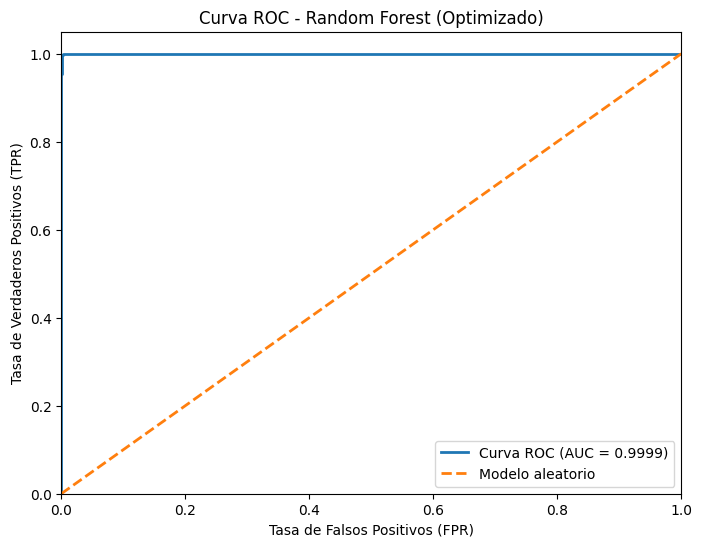

In [ ]:
pos_label = 'white'
pos_index = list(best_rf_model.classes_).index(pos_label)

y_pred_proba_rf = best_rf_model.predict_proba(X_test_clf_scaled)[:, pos_index]

# Calcular puntos ROC
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_proba_rf, pos_label=pos_label)

# Calcular AUC
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC para Random Forest (Optimizado): {roc_auc:.4f}")

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, label='Modelo aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest (Optimizado)')
plt.legend(loc="lower right")
plt.show()

La curva ROC para el Random Forest Classifier es "perfecta", con un valor AUC casi 1. Por lo que Supone una clasificacion perfecta, lo cual pone en duda la calidad del modelo y la capacidad para clasificar nuevos datos fuera del dataset.

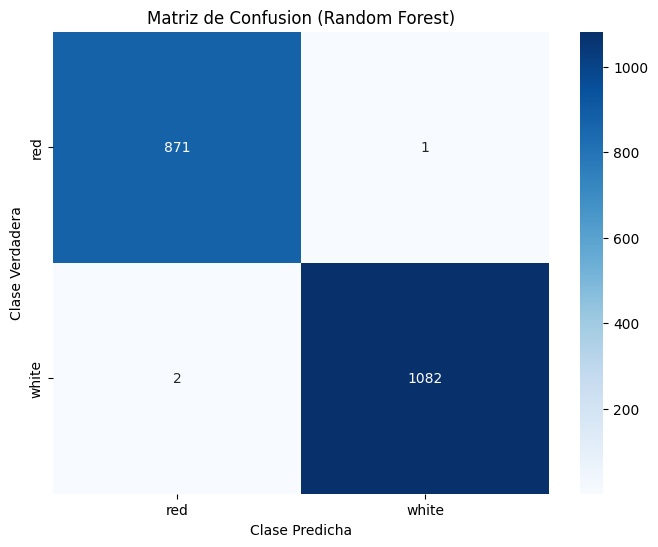

In [ ]:
# Calculo la matriz de confusion para el set test
cm = confusion_matrix(y_test_clf, y_test_pred_rf)

# Obtengo las labels de las clases
class_labels = best_rf_model.classes_

# Creo un heatmap de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusion (Random Forest)')
plt.show()

En base a la Matriz de Confusion podemos ver que el modelo clasifica casi de manera perfecta, con solo un error para los blancos y 2 para el tinto.


Top 10 características más importantes:
                               Feature  Importance
6                            SO2 Total    0.300160
15         Indice Sulfatos / SO2 Total    0.227505
4                             Cloruros    0.169277
1                       Acidez Volatil    0.065304
7                             Densidad    0.044137
9                             Sulfatos    0.038123
12  Ratio Acidez Volatil / Acidez Fija    0.033938
3                      Azucar Residual    0.031262
13          Densidad / Azucar Residual    0.025323
5                            SO2 Libre    0.018689


/tmp/ipython-input-2987964873.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




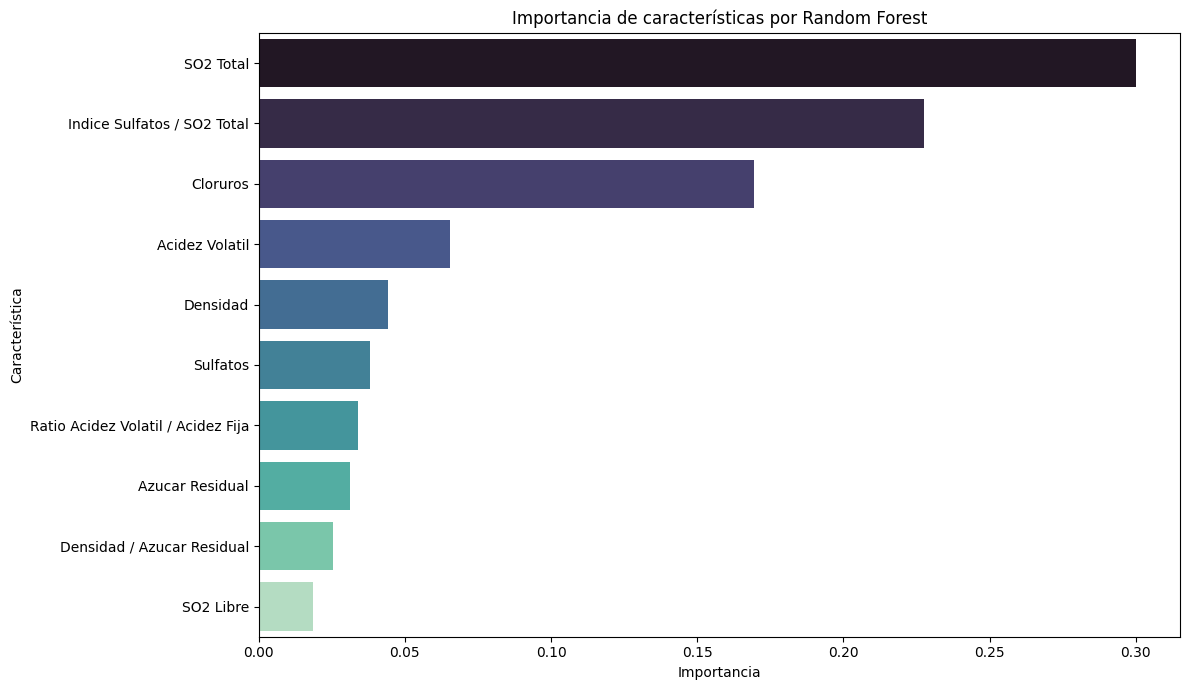

In [ ]:
# Usare el mejor modelo de Random Forest encontrado por GridSearchCV
feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X_train_clf.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 características más importantes:")
print(features_df.head(10))

# Visualización de la importancia de las características
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='mako')
plt.title('Importancia de características por Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

Las features con mayor importancia para este modelo son:
- SO2 Total
- Indice Sulfatos / SO2 Total
- Cloruros

#### XGBoost Classifier

In [ ]:
# Encode the target variable
y_train_clf_encoded, y_labels = pd.factorize(y_train_clf)
y_test_clf_encoded = pd.Categorical(y_test_clf, categories=y_labels).codes

# Defino la grilla de parámetros para XGBClassifier
param_grid_xgb = {
    'n_estimators': [300, 500, 700],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
}

xgb_tuned_base = xgb.XGBClassifier(objective='binary:logistic',
                                   eval_metric='logloss',
                                   random_state=42,
                                   n_jobs=-1)

grid_search_xgb = GridSearchCV(estimator=xgb_tuned_base,
                               param_grid=param_grid_xgb,
                               cv=3,
                               scoring='accuracy',
                               verbose=1,
                               n_jobs=-1)

start_time_xgb_opt = time.time()
grid_search_xgb.fit(X_train_clf_scaled, y_train_clf_encoded)
end_time_xgb_opt = time.time()
opt_time_xgb = end_time_xgb_opt - start_time_xgb_opt

print(f"Tiempo de optimización de hiperparámetros (XGBoost): {opt_time_xgb:.4f} segundos")
print("Mejores parámetros encontrados para XGBoost:", grid_search_xgb.best_params_)
print("Mejor accuracy en CV para XGBoost:", grid_search_xgb.best_score_)

best_xgb_model_tuned = grid_search_xgb.best_estimator_
y_test_pred_xgb_tuned = best_xgb_model_tuned.predict(X_test_clf_scaled)
test_accuracy_best_xgb_tuned = accuracy_score(y_test_clf_encoded, y_test_pred_xgb_tuned)

# Obtener el classification report para calcular el F1-score
report_xgb = classification_report(y_test_clf_encoded, y_test_pred_xgb_tuned, output_dict=True)
f1_score_xgb_weighted = report_xgb['weighted avg']['f1-score']

print(f"Accuracy del mejor modelo XGBoost (optimizado) en el conjunto de prueba: {test_accuracy_best_xgb_tuned:.4f}")
print(f"F1-Score (weighted avg) del mejor modelo XGBoost: {f1_score_xgb_weighted:.4f}")
print("\nReporte de Clasificación (XGBoost Optimizado - Test):")
print(classification_report(y_test_clf_encoded, y_test_pred_xgb_tuned))

model_results_2['XGBoost (Optimizado)'] = {
    'Accuracy_Test': test_accuracy_best_xgb_tuned,
    'F1_Score_Weighted': f1_score_xgb_weighted,
    'Train_Time_s': opt_time_xgb
}

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tiempo de optimización de hiperparámetros (XGBoost): 30.3610 segundos
Mejores parámetros encontrados para XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Mejor accuracy en CV para XGBoost: 0.9953987730061349
Accuracy del mejor modelo XGBoost (optimizado) en el conjunto de prueba: 0.9974
F1-Score (weighted avg) del mejor modelo XGBoost: 0.9974

Reporte de Clasificación (XGBoost Optimizado - Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1084
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956



ROC-AUC para XGBoost (Optimizado): 0.9998


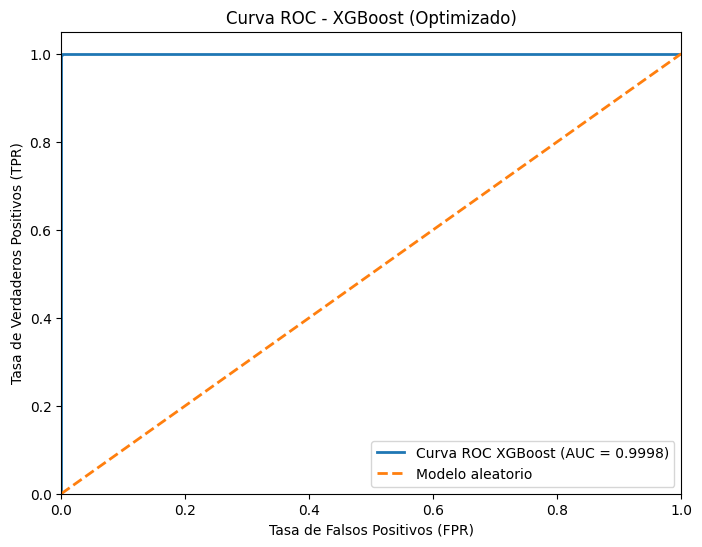

In [ ]:
# Probabilidades de la clase positiva (código 1) en el conjunto de prueba
y_pred_proba_xgb = best_xgb_model_tuned.predict_proba(X_test_clf_scaled)[:, 1]

# Calcular puntos ROC (usamos las etiquetas codificadas y definimos la clase positiva)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_clf_encoded, y_pred_proba_xgb, pos_label=1)

# Calcular AUC
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print(f"ROC-AUC para XGBoost (Optimizado): {roc_auc_xgb:.4f}")

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'Curva ROC XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, label='Modelo aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - XGBoost (Optimizado)')
plt.legend(loc="lower right")
plt.show()

La curva ROC para el XGBoost Classifier es "perfecta", con un valor AUC casi 1. Por lo que Supone una clasificacion perfecta, lo cual pone en duda la calidad del modelo y la capacidad para clasificar nuevos datos fuera del dataset.

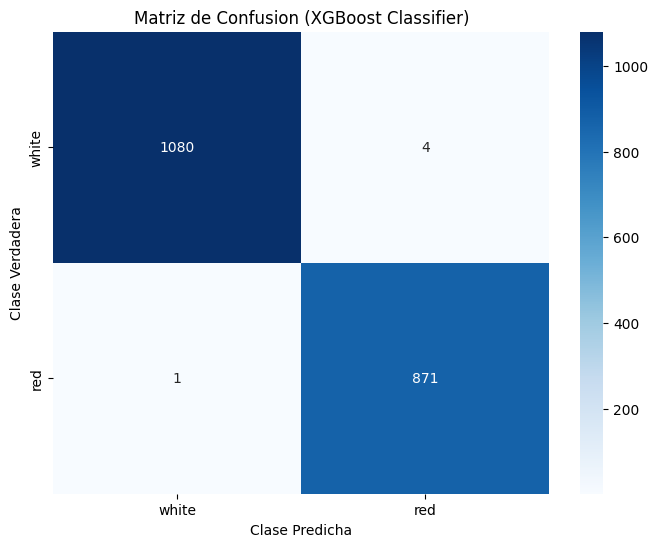

In [ ]:
# Calculo la matriz de confusion para el set test
cm = confusion_matrix(y_test_clf_encoded, y_test_pred_xgb_tuned)

# Obtengo las labels de las clases
class_labels = y_labels

# Creo un heatmap de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusion (XGBoost Classifier)')
plt.show()

El modelo de clasificacion de XGBoost Classifier funciona mejor para los vinos blancos con solo 1 error. Para el tinto se encuentran 4 clasificados como blancos.

/tmp/ipython-input-4239776551.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




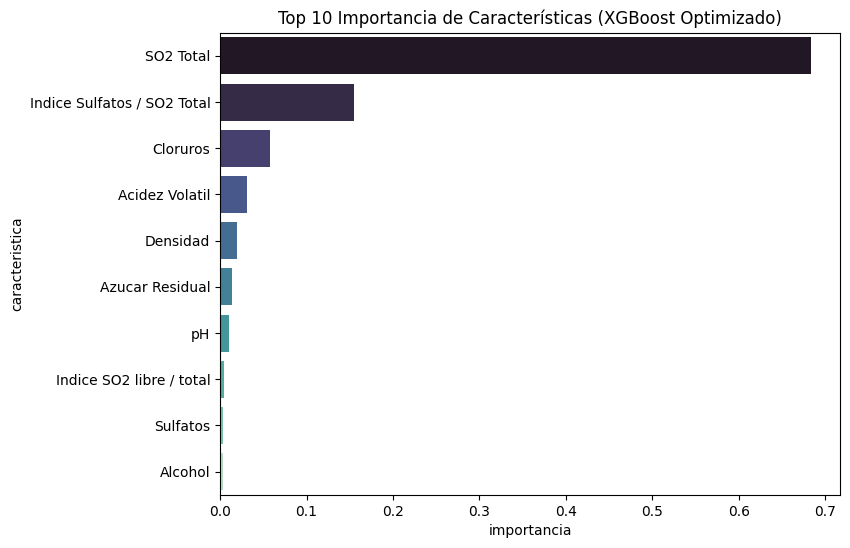

In [ ]:
# Importancia de Features para XGBoost
fi_xgb = pd.DataFrame(columns=["caracteristica", "importancia"])
fi_xgb["caracteristica"] = X_train_clf.columns
fi_xgb["importancia"] = best_xgb_model_tuned.feature_importances_
fi_xgb = fi_xgb.sort_values("importancia", ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(y=fi_xgb.caracteristica, x=fi_xgb.importancia, palette='mako')
plt.title('Top 10 Importancia de Características (XGBoost Optimizado)')
plt.show()

La feature con mayor importancia es el SO2 Total con casi un 70%, seguida por el Indice Sulfatos / SO2 Total.

### Conclusion Clasificacion

/tmp/ipython-input-3418705035.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.





Resumen Comparativo de Rendimiento y Tiempos:
                            Accuracy_Test  F1_Score_Weighted  Train_Time_s
Modelo                                                                    
Random Forest (Optimizado)         0.9985             0.9985      171.8417
XGBoost (Optimizado)               0.9974             0.9974       30.3610
Logistic Regression                0.9959             0.9959        0.0293
Decision Tree                      0.9923             0.9923        0.1487


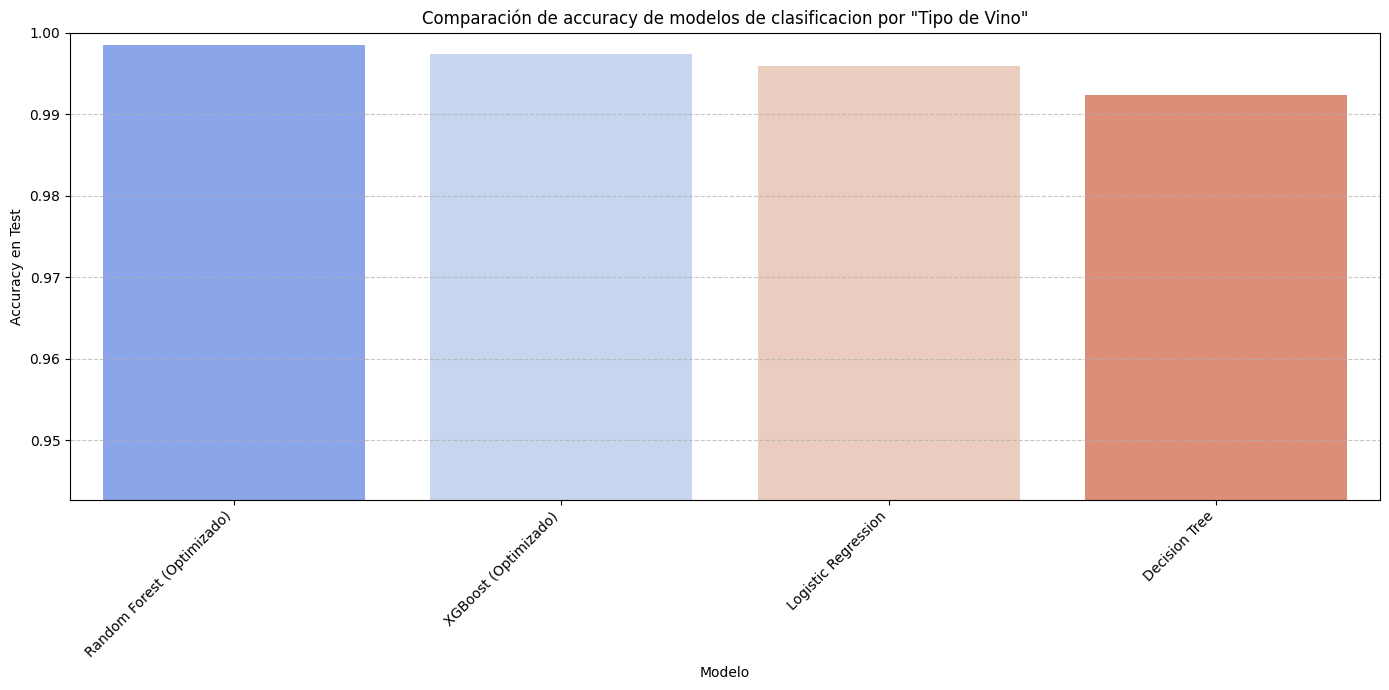

/tmp/ipython-input-3418705035.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




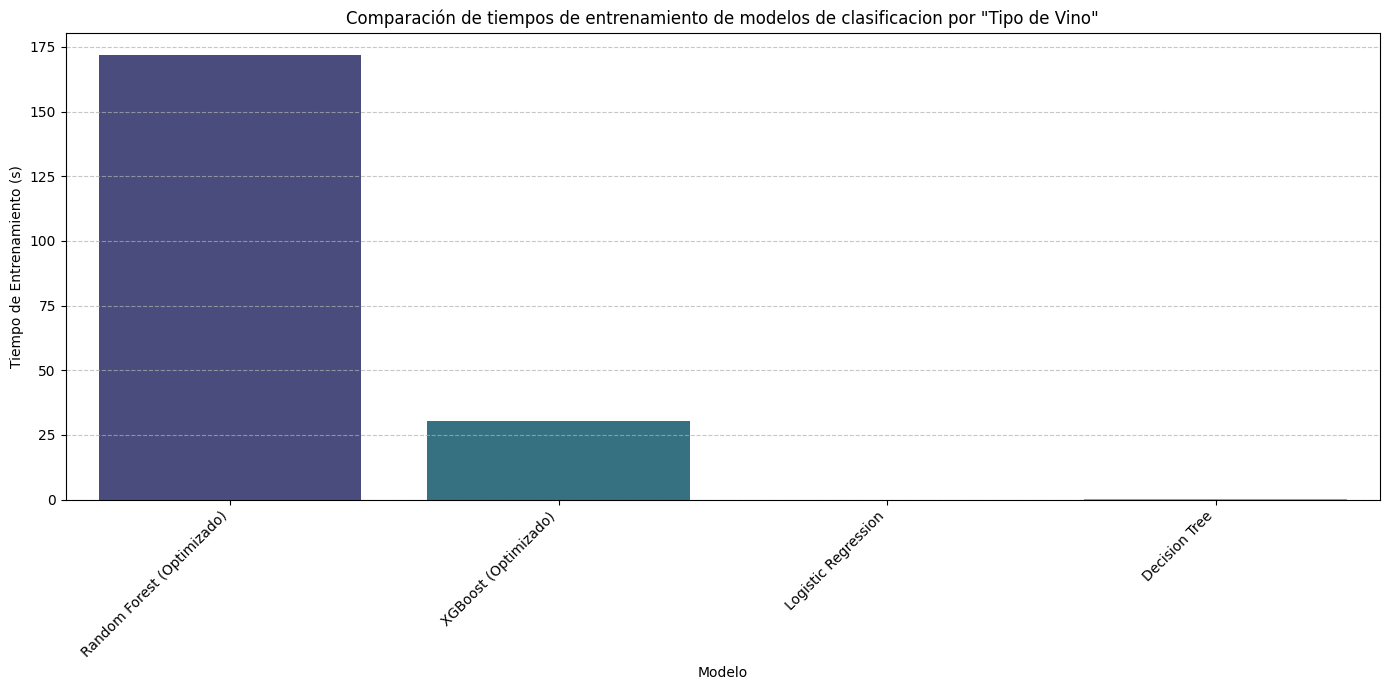

In [ ]:
# Convertir el diccionario de resultados en un DataFrame para una mejor visualización
final_results_df = pd.DataFrame.from_dict(model_results_2, orient='index')
final_results_df.index.name = 'Modelo'
final_results_df = final_results_df.sort_values(by='Accuracy_Test', ascending=False)

print("\nResumen Comparativo de Rendimiento y Tiempos:")
print(final_results_df.round(4))

# Visualización de la comparación de rendimiento (Accuracy)
plt.figure(figsize=(14, 7))
sns.barplot(x=final_results_df.index, y=final_results_df['Accuracy_Test'], palette='coolwarm')
plt.ylim(final_results_df['Accuracy_Test'].min() * 0.95, 1.0)
plt.ylabel('Accuracy en Test')
plt.title('Comparación de accuracy de modelos de clasificacion por "Tipo de Vino"')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualización de la comparación de tiempos de entrenamiento
plt.figure(figsize=(14, 7))
sns.barplot(x=final_results_df.index, y=final_results_df['Train_Time_s'], palette='viridis')
plt.ylabel('Tiempo de Entrenamiento (s)')
plt.title('Comparación de tiempos de entrenamiento de modelos de clasificacion por "Tipo de Vino"')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(model_results_2)

{'Logistic Regression': {'Accuracy_Test': 0.9959100204498977, 'F1_Score_Weighted': 0.9959109200422984, 'Train_Time_s': 0.029314279556274414}, 'Decision Tree': {'Accuracy_Test': 0.9923312883435583, 'F1_Score_Weighted': 0.992334196604674, 'Train_Time_s': 0.14867949485778809}, 'Random Forest (Optimizado)': {'Accuracy_Test': 0.9984662576687117, 'F1_Score_Weighted': 0.9984663432503343, 'Train_Time_s': 171.84173846244812}, 'XGBoost (Optimizado)': {'Accuracy_Test': 0.9974437627811861, 'F1_Score_Weighted': 0.9974441865391654, 'Train_Time_s': 30.360998392105103}}


**Tabla comparativa de Rendimiento de Modelos**:

| Modelo | Accuracy | F1-Score (weighted avg) | Mejores Hiperparámetros (GridSearch) |
| :--- | :--- | :--- | :--- |
| Regresión Logística | 0.9959 | 0.9959 | N/A |
| Árbol de Decisión   | 0.9923 | 0.9923 | N/A |
| Random Forest       | 0.9984    | 0.9984    | {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100} |
| XGBoost             | 0.9974    | 0.9974    | {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
 |

* * *



Los resultados obtenidos en los modelos son mas altos a los modelos pertenecientes al experimento 1 a pesar de los datos sinteticos y el error en la desviacion estandar generados. Este efecto puede estar explicado por la correcta limpieza de datos (eliminacion de duplicados y outliers) que contrarresta los efectos de los datos sinteticos y el error. No me quedaría con ningún modelo debido a sus metricas casi iguales a 1, sino que probaria agregando mas datos sinteticos, error o datos pertenecientes a otro dataset, como por ejemplo [https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data].

## Regresion (Calidad del Vino)

### Preparacion de Datos

In [ ]:
# Definición de Features (X) y Target (y)
# Usaremos las mismas features, pero sin 'Tipo de Vino' y el target ahora es 'Calidad'
X_reg = df_comb.drop(['Tipo de Vino', 'Calidad'], axis=1)
y_reg = df_comb['Calidad']

# División en Train y Test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Escalamiento de datos
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

### Modelos Base de Regresion

#### Regresion Lineal

In [ ]:
# Regresión Lineal
print("--- Entrenando Regresión Lineal ---")
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg_scaled)

start_time_lin = time.time()
mae_lin = mean_absolute_error(y_test_reg, y_pred_lin)
end_time_lin = time.time()
r2_lin = r2_score(y_test_reg, y_pred_lin)
lin_train_time = end_time_lin - start_time_lin

print(f"MAE Regresión Lineal: {mae_lin:.4f}")
print(f"R² Score Regresión Lineal: {r2_lin:.4f}")
print(f"Tiempo de entrenamiento (Regresión Lineal): {end_time_lin - start_time_lin:.4f} segundos")

# Agrego los resultados del modelo al diccionario
model_results_2['Linear Regression'] = {
    'MAE_Test': mae_lin,
    'R2_Test': r2_lin,
    'Train_Time_s': lin_train_time
}

--- Entrenando Regresión Lineal ---
MAE Regresión Lineal: 0.0664
R² Score Regresión Lineal: 0.9881
Tiempo de entrenamiento (Regresión Lineal): 0.0013 segundos


#### Decision Tree Regression

In [ ]:
# Árbol de Decisión para Regresión
print("\n--- Entrenando Árbol de Decisión (Regresión) ---")
tree_reg = DecisionTreeRegressor(max_depth = 3, random_state=42)
tree_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_tree_reg = tree_reg.predict(X_test_reg_scaled)

start_time_tree_reg = time.time()
mae_tree_reg = mean_absolute_error(y_test_reg, y_pred_tree_reg)
end_time_tree_reg = time.time()
r2_tree_reg = r2_score(y_test_reg, y_pred_tree_reg)
train_time_tree_reg = end_time_tree_reg - start_time_tree_reg

print(f"MAE Árbol de Decisión: {mae_tree_reg:.4f}")
print(f"R² Score Árbol de Decisión: {r2_tree_reg:.4f}")
print(f"Tiempo de entrenamiento (Árbol de Decisión): {end_time_tree_reg - start_time_tree_reg:.4f} segundos")

# Agrego los resultados del modelo al diccionario
model_results_2['Decision Tree Regression'] = {
    'MAE_Test': mae_tree_reg,
    'R2_Test': r2_tree_reg,
    'Train_Time_s': train_time_tree_reg
}


--- Entrenando Árbol de Decisión (Regresión) ---
MAE Árbol de Decisión: 0.1844
R² Score Árbol de Decisión: 0.8221
Tiempo de entrenamiento (Árbol de Decisión): 0.0012 segundos


#### Random Forest Regression

In [ ]:
# RandomForest para Regresión
print("\n--- Entrenando Random Forest (Regresión) ---")
rf_reg = RandomForestRegressor(max_depth = 3, random_state=42)
rf_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg_scaled)

start_time_rfr = time.time()
mae_rf_reg = mean_absolute_error(y_test_reg, y_pred_rf_reg)
end_time_rfr = time.time()
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)
train_time_rfr = end_time_rfr - start_time_rfr

print(f"MAE Random Forest: {mae_rf_reg:.4f}")
print(f"R² Score Random Forest: {r2_rf_reg:.4f}")
print(f"Tiempo de entrenamiento (Random Forest): {end_time_rfr - start_time_rfr:.4f} segundos")

# Agrego los resultados del modelo al diccionario
model_results_2['Random Forest Regression'] = {
    'MAE_Test': mae_rf_reg,
    'R2_Test': r2_rf_reg,
    'Train_Time_s': train_time_rfr
}


--- Entrenando Random Forest (Regresión) ---
MAE Random Forest: 0.1916
R² Score Random Forest: 0.8445
Tiempo de entrenamiento (Random Forest): 0.0013 segundos


In [ ]:
# Creo un scatterplot para analizar el rendimiento del modelo
fig = px.scatter(x=y_test_reg, y=y_pred_rf_reg, opacity=0.6,
                 labels={'x': 'Valores Reales (y_test_reg)', 'y': 'Valores Predichos (Random Forest Regressor)'},
                 title='Valores Reales vs. Predichos (Random Forest Regressor)')

# Agrego una diagonal de referencia
fig.add_trace(go.Scatter(x=[y_test_reg.min(), y_test_reg.max()], y=[y_test_reg.min(), y_test_reg.max()],
                         mode='lines', line=dict(color='black', dash='dash'),
                         name='Línea de Referencia'))

fig.update_layout(showlegend=True)
fig.show()

El grafico de dispersion del Random Forest muestra una dispersion similar a la del Experimento 1, tendiendo a clasificar hacia el valor 6, sugiero que esto se puede deber al desbalance de clases y la concentracion de valores alrededor de 5 y 6.

### Modelos Avanzados y Optimizacion

#### Random Forest Regressor

In [ ]:
# Defino la grilla de parámetros para Random Forest
param_grid_rfr = {
    'n_estimators': [50, 100, 150, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8],
    'max_features': ['sqrt', 'log2']
}

print("Iniciando GridSearchCV para Random Forest Regressor...")
grid_search_rfr = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rfr,
                              cv=3,
                              scoring='r2',
                              n_jobs=-1,
                              verbose=2)

start_time_grid_search = time.time()
grid_search_rfr.fit(X_train_reg_scaled, y_train_reg)
end_time_grid_search = time.time()
grid_search_train_time = end_time_grid_search - start_time_grid_search

print("\n--- Resultados de GridSearchCV (Random Forest Regressor) ---")
print(f"Mejores hiperparámetros encontrados: {grid_search_rfr.best_params_}")
print(f"Mejor puntuación (r2) en validación cruzada: {grid_search_rfr.best_score_:.4f}")

best_rfr_model = grid_search_rfr.best_estimator_

# Evaluo el mejor modelo obtenido en el set test
y_test_pred_rfr_tuned = best_rfr_model.predict(X_test_reg_scaled)
mae_rfr_tuned = mean_absolute_error(y_test_reg, y_test_pred_rfr_tuned)
r2_rfr_tuned = r2_score(y_test_reg, y_test_pred_rfr_tuned)


print(f"MAE del mejor modelo Random Forest Regressor (optimizado) en el conjunto de prueba: {mae_rfr_tuned:.4f}")
print(f"R² Score del mejor modelo Random Forest Regressor (optimizado) en el conjunto de prueba: {r2_rfr_tuned:.4f}")
print(f"Tiempo total de ejecución de GridSearchCV: {grid_search_train_time:.4f} segundos")

# Agrego los resultados del modelo al diccionario
model_results_2['Random Forest Regressor (Optimizado)'] = {
    'MAE_Test': mae_rfr_tuned,
    'R2_Test': r2_rfr_tuned,
    'Train_Time_s': grid_search_train_time
}

Iniciando GridSearchCV para Random Forest Regressor...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

--- Resultados de GridSearchCV (Random Forest Regressor) ---
Mejores hiperparámetros encontrados: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}
Mejor puntuación (r2) en validación cruzada: 0.9574
MAE del mejor modelo Random Forest Regressor (optimizado) en el conjunto de prueba: 0.0788
R² Score del mejor modelo Random Forest Regressor (optimizado) en el conjunto de prueba: 0.9715
Tiempo total de ejecución de GridSearchCV: 317.8670 segundos


In [ ]:
# Creo un scatterplot para analizar el rendimiento del modelo
fig = px.scatter(x=y_test_reg, y=y_test_pred_rfr_tuned, opacity=0.6,
                 labels={'x': 'Valores Reales (y_test_reg)', 'y': 'Valores Predichos (Random Forest Regressor Optimizado)'},
                 title='Valores Reales vs. Predichos (Random Forest Regressor Optimizado)')

# Agrego una diagonal de referencia
fig.add_trace(go.Scatter(x=[y_test_reg.min(), y_test_reg.max()], y=[y_test_reg.min(), y_test_reg.max()],
                         mode='lines', line=dict(color='black', dash='dash'),
                         name='Línea de Referencia'))

fig.update_layout(showlegend=True)
fig.show()


Top 10 características más importantes para Random Forest Regressor:
                               Feature  Importance
17            Indice Alcohol * Calidad    0.693791
10                             Alcohol    0.059471
15         Relacion Densidad / Alcohol    0.056320
7                             Densidad    0.026006
16                    Indice de Cuerpo    0.021478
4                             Cloruros    0.018430
1                       Acidez Volatil    0.013495
6                            SO2 Total    0.013420
11  Ratio Acidez Volatil / Acidez Fija    0.012581
5                            SO2 Libre    0.012297


/tmp/ipython-input-1052311913.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




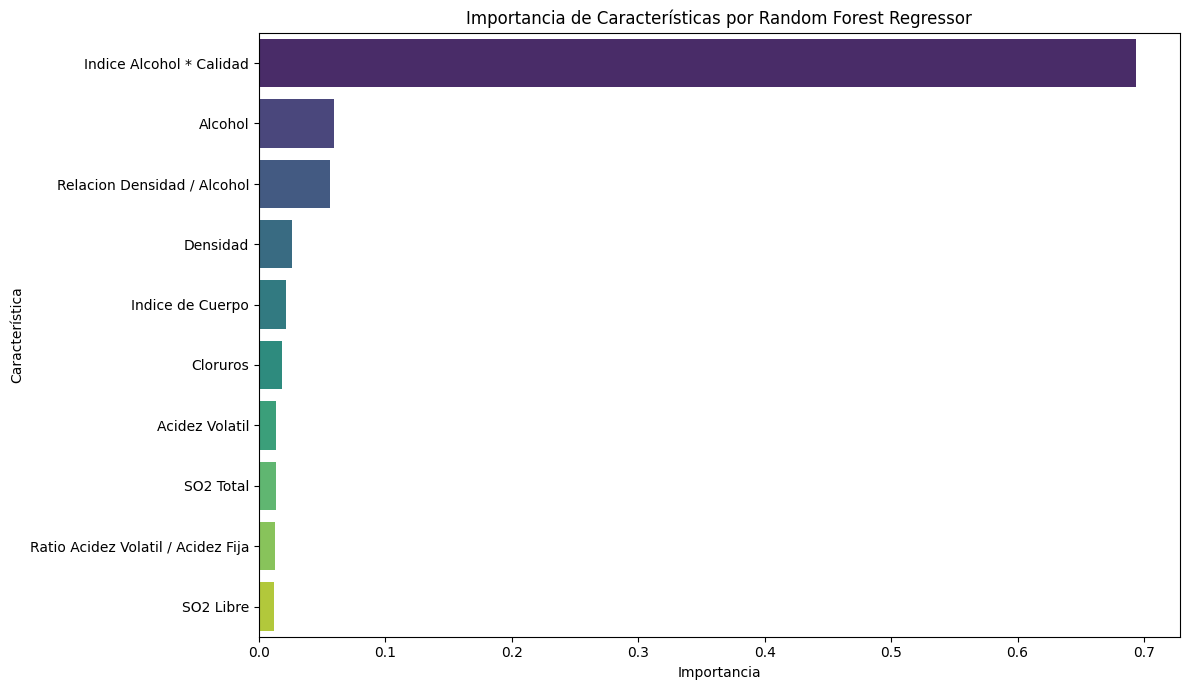

In [ ]:
# Obtengo la importancia de las features del mejor modelo de RandomForest Regressor
feature_importances_rfr = best_rfr_model.feature_importances_

# Creo un dataframe para visutalizacion
features_df_rfr = pd.DataFrame({'Feature': X_train_reg.columns, 'Importance': feature_importances_rfr})

# Ordeno por importancia
features_df_rfr = features_df_rfr.sort_values(by='Importance', ascending=False)

print("\nTop 10 características más importantes para Random Forest Regressor:")
print(features_df_rfr.head(10))

# Visualización de la importancia de las características
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df_rfr.head(10), palette='viridis')
plt.title('Importancia de Características por Random Forest Regressor')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

#### XGBoost Classifier

In [ ]:
# Defino la grilla de parámetros para XGBRegressor
param_grid_xgbr = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
}

xgb_reg_base = xgb.XGBRegressor(objective='reg:squarederror',
                                eval_metric='rmse',
                                random_state=42,
                                n_jobs=-1)

print("Iniciando GridSearchCV para XGBoost Regressor...")
grid_search_xgbr = GridSearchCV(estimator=xgb_reg_base,
                                param_grid=param_grid_xgbr,
                                cv=3,
                                scoring='r2',
                                verbose=1,
                                n_jobs=-1)

start_time_xgbr_opt = time.time()
grid_search_xgbr.fit(X_train_reg_scaled, y_train_reg)
end_time_xgbr_opt = time.time()
opt_time_xgbr = end_time_xgbr_opt - start_time_xgbr_opt

print(f"Tiempo de optimización de hiperparámetros (XGBoost Regressor): {opt_time_xgbr:.4f} segundos")
print("Mejores parámetros encontrados para XGBoost Regressor:", grid_search_xgbr.best_params_)
print(f"Mejor puntuación (r2) en validación cruzada: {grid_search_xgbr.best_score_:.4f}")


best_xgbr_model_tuned = grid_search_xgbr.best_estimator_
y_test_pred_xgbr_tuned = best_xgbr_model_tuned.predict(X_test_reg_scaled)
mae_xgbr_tuned = mean_absolute_error(y_test_reg, y_test_pred_xgbr_tuned)
r2_xgbr_tuned = r2_score(y_test_reg, y_test_pred_xgbr_tuned)


print(f"MAE del mejor modelo XGBoost Regressor (optimizado) en el conjunto de prueba: {mae_xgbr_tuned:.4f}")
print(f"R² Score del mejor modelo XGBoost Regressor (optimizado) en el conjunto de prueba: {r2_xgbr_tuned:.4f}")


# Cargo los resultados del mejor modelo al diccionario
model_results_2['XGBoost Regressor (Optimizado)'] = {
    'MAE_Test': mae_xgbr_tuned,
    'R2_Test': r2_xgbr_tuned,
    'Train_Time_s': opt_time_xgbr
}

Iniciando GridSearchCV para XGBoost Regressor...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tiempo de optimización de hiperparámetros (XGBoost Regressor): 66.3122 segundos
Mejores parámetros encontrados para XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Mejor puntuación (r2) en validación cruzada: 0.9972
MAE del mejor modelo XGBoost Regressor (optimizado) en el conjunto de prueba: 0.0122
R² Score del mejor modelo XGBoost Regressor (optimizado) en el conjunto de prueba: 0.9986



Top 10 características más importantes para XGBoost Regressor:
                               Feature  Importance
17            Indice Alcohol * Calidad    0.648116
10                             Alcohol    0.238227
15         Relacion Densidad / Alcohol    0.096534
8                                   pH    0.002898
6                            SO2 Total    0.002399
11  Ratio Acidez Volatil / Acidez Fija    0.002068
14         Indice Sulfatos / SO2 Total    0.001698
3                      Azucar Residual    0.001490
4                             Cloruros    0.001465
16                    Indice de Cuerpo    0.001112


/tmp/ipython-input-2807389734.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




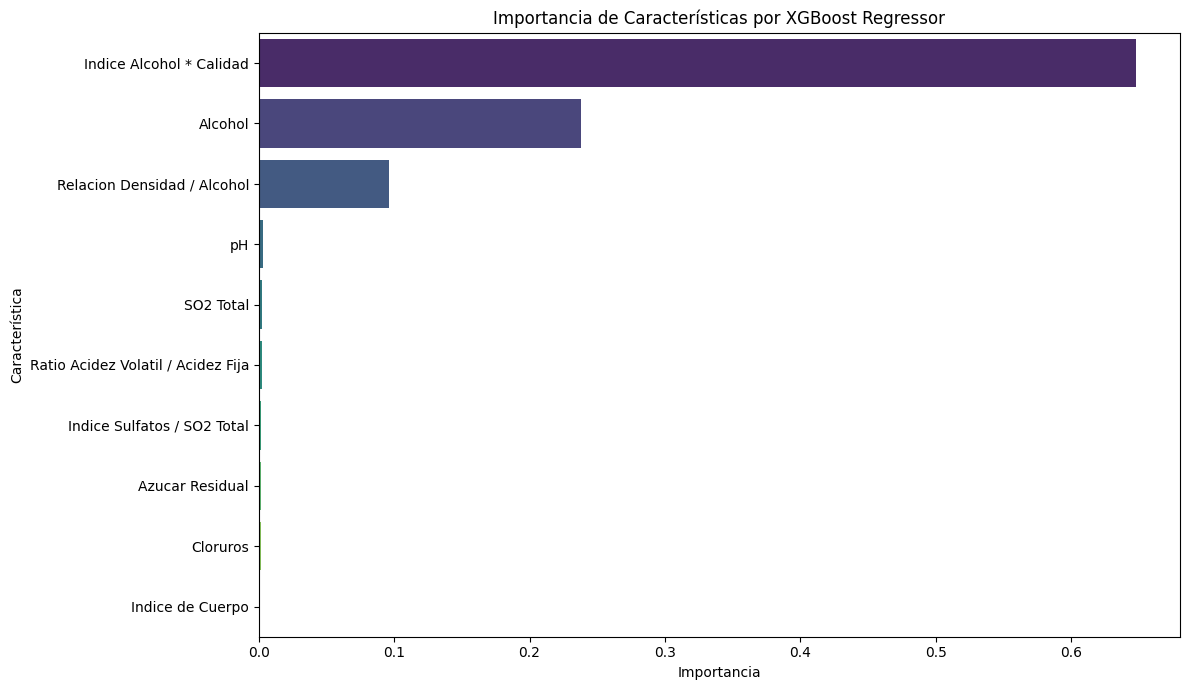

In [ ]:
# Obtengo la importancia de las features del mejor modelo de XGBoost Regressor
feature_importances_xgbr = best_xgbr_model_tuned.feature_importances_

# Creo un dataframe para visualizacion
features_df_xgbr = pd.DataFrame({'Feature': X_train_reg.columns, 'Importance': feature_importances_xgbr})

# Ordeno por importancia
features_df_xgbr = features_df_xgbr.sort_values(by='Importance', ascending=False)

print("\nTop 10 características más importantes para XGBoost Regressor:")
print(features_df_xgbr.head(10))

# Visualización de la importancia de las características
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df_xgbr.head(10), palette='viridis')
plt.title('Importancia de Características por XGBoost Regressor')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

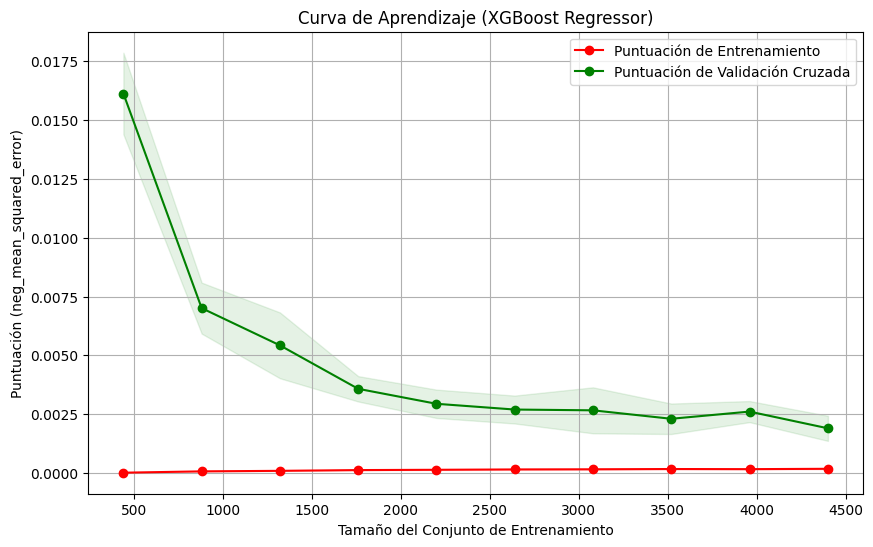

In [ ]:
# Curva de aprendizaje para el mejor modelo de XGBoost Regressor
model_to_plot = best_xgbr_model_tuned

# Defino el scoring para la curva de aprendizaje (igual al del GridSearchCV)
scoring_metric = 'neg_mean_squared_error'

# Calculo la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model_to_plot, X_train_reg_scaled, y_train_reg, cv=4, scoring=scoring_metric, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10) # Use 10 different training set sizes
)

# Convierto los puntajes a positivos y obtengo la media
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafico la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje (XGBoost Regressor)")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel(f"Puntuación ({scoring_metric})")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Puntuación de Validación Cruzada")

plt.legend(loc="best")
plt.show()

## Conclusiones


Resumen Comparativo de Rendimiento y Tiempos para Modelos de Regresión:


,Accuracy_Test,F1_Score_Weighted,Train_Time_s,MAE_Test,R2_Test
Modelo,,,,,
XGBoost Regressor (Optimizado),NaN,NaN,66.3122,0.0122,0.9986
Linear Regression,NaN,NaN,0.0013,0.0664,0.9881
Random Forest Regressor (Optimizado),NaN,NaN,317.8670,0.0788,0.9715
Random Forest Regression,NaN,NaN,0.0013,0.1916,0.8445
Decision Tree Regression,NaN,NaN,0.0012,0.1844,0.8221


/tmp/ipython-input-633474931.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




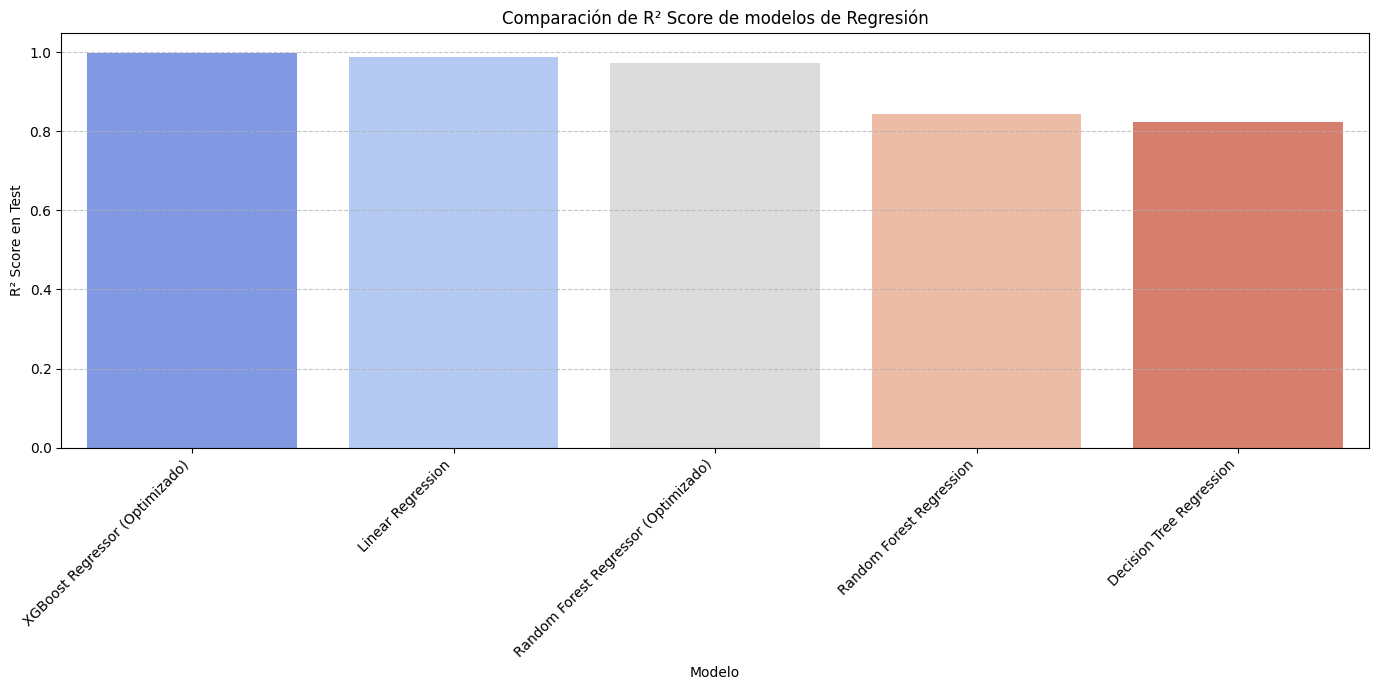

/tmp/ipython-input-633474931.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




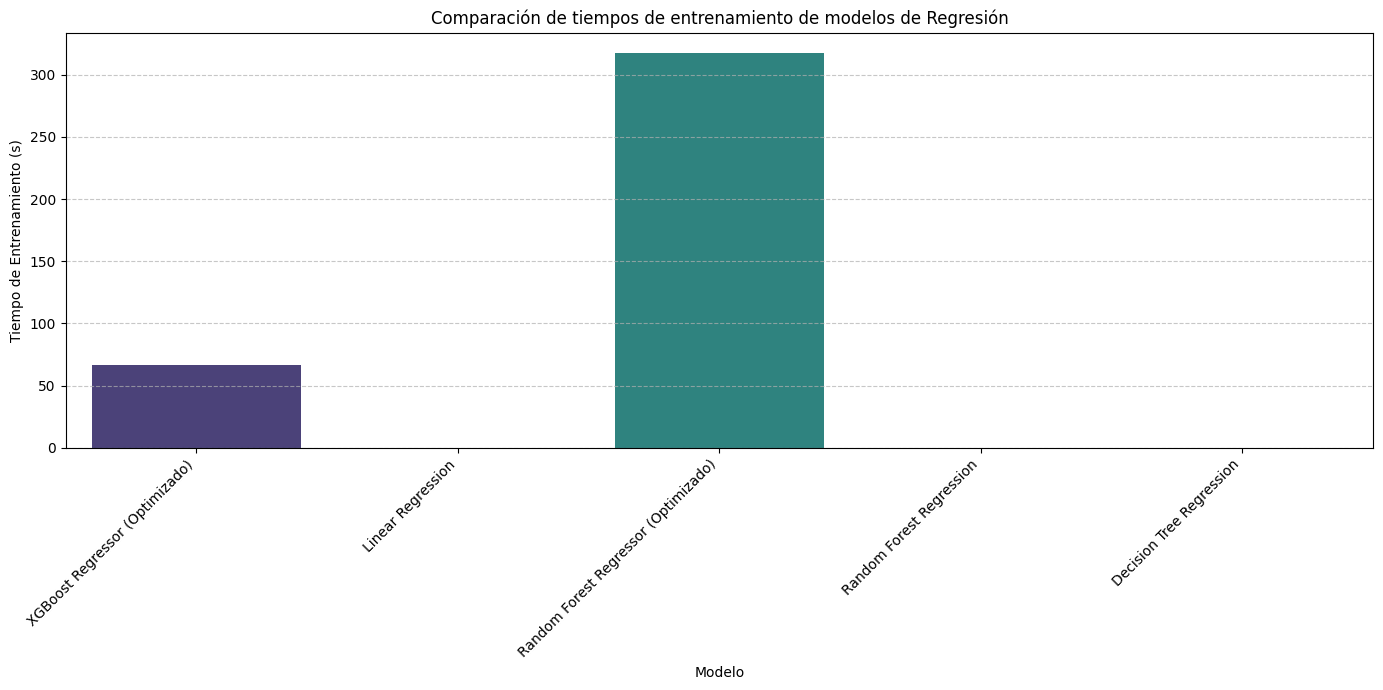

In [ ]:
# Convert the dictionary of results into a DataFrame
final_results_df = pd.DataFrame.from_dict(model_results_2, orient='index')
final_results_df.index.name = 'Modelo'

# Filter to include only the requested regression models
regression_models = [
    'Linear Regression',
    'Decision Tree Regression',
    'Random Forest Regression',
    'Random Forest Regressor (Optimizado)',
    'XGBoost Regressor (Optimizado)'
]
final_results_df_reg = final_results_df.loc[regression_models].copy()

# Sort by R2_Test (a common metric for regression performance) in descending order
final_results_df_reg = final_results_df_reg.sort_values(by='R2_Test', ascending=False)


print("\nResumen Comparativo de Rendimiento y Tiempos para Modelos de Regresión:")
display(final_results_df_reg.round(4))

# Visualización de la comparación de rendimiento (R2 Score)
plt.figure(figsize=(14, 7))
sns.barplot(x=final_results_df_reg.index, y=final_results_df_reg['R2_Test'], palette='coolwarm')
plt.ylabel('R² Score en Test')
plt.title('Comparación de R² Score de modelos de Regresión')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualización de la comparación de tiempos de entrenamiento
plt.figure(figsize=(14, 7))
sns.barplot(x=final_results_df_reg.index, y=final_results_df_reg['Train_Time_s'], palette='viridis')
plt.ylabel('Tiempo de Entrenamiento (s)')
plt.title('Comparación de tiempos de entrenamiento de modelos de Regresión')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Deberán completar la siguiente tabla:

| Modelo | MAE (Mean Absolute Error) | R² Score | Mejores Hiperparámetros (GridSearch) |
| :--- | :--- | :--- | :--- |
| Regresión Lineal | 0.0664| 0.9881| N/A |
| Árbol de Decisión Regressor (Base) | 0.1844 | 0.8221 | N/A |
| RandomForest Regressor (Base)| 0.1916    | 0.8445    | N/A |
| RandomForest Regressor (Optimizado)| 0.0788    | 0.9715    | {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300} |
| XGBoost Regressor     | 0.0122    | 0.9986    | {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150} |

* * *

En el caso de la Regresion, el mejor modelo encontrado es el Random Forest Regressor debido a:
- Su R2 indica que el modelo explica el 84% de los datos.
- Su MAE de 0.19 es alto pero no lo suficiente como para descartarlo.
- El tiempo de entrenamiento es significativamente menor a los modelos optimizados, siendo uno de los mas veloces.

Si bien la recta es mejor en el Random Forest Optimizado, el tiempo de entrenamiento es muy superior. y su valor de R2 es demasiado alto (0.97) por lo que quizas se podria trabajar en bajarlo un poco mas o subir el del Random Forest Base.

<a name="final"></a>
## 6. Conclusiones Finales del Proyecto

En esta sección final, deben resumir los hallazgos de todo el proyecto.
* ¿Qué tarea fue más "fácil" para los modelos: clasificar el tipo de vino o predecir su calidad? ¿Por qué creen que fue así?
* ¿Qué importancia tuvo el preprocesamiento (escalado de datos)?
* ¿Valió la pena utilizar `GridSearchCV`? ¿Mejoró significativamente el rendimiento de los modelos base?
* Si tuvieran que presentarle una solución a la bodega, ¿qué modelos recomendarían para cada tarea y por qué?

- La tarea mas facil de realizar para los modelos fue la de Clasificación por Tipo de Vino. Creo que esto fue debido a que al tener que encasillar a un conjunto de datos en solo dos posibles resultados, pero si hay desbalance, el modelo puede aprender a predecir siempre la clase mayoritaria y por eso se intentaron balancear las clases, mientras que en un modelo de predicción de valores continuos, el modelo se enfrenta a mayores opciones o debe hacer estimaciones en las que puede complicarse cuando no tenemos casos extremos, lo que puede aplanar la curva, caso encontrado en este dataset donde presenta pocos valores extremos.

- Es importante para los modelos de Regresion Lineal y Logistica para evitar errores numericos causados por variables con valores grandes.

- GridSearchCV sin duda mejoro los modelos pero a un extremo de tener valores cercanos a 1, simulando un modelo perfecto que en realidad no lo es, sino un modelo que aprendió el dataset y podria no funcionar correctamente con datos nuevos, por lo que no serian confiables.

- Para el Modelo de Regresion utilizaria el
Random Forest Regressor, elegiria el Base si se deberia priorizar el tiempo de entrenamiento, ya que tiene una buena performance. Si sobran recursos, optaria por el Optimizado ya que es un modelo muy robusto, aunque propondria seguir validandolo ya que sus metricas son muy altas.

## **A MEJORAR**

Luego de finalizar el trabajo e iterar numerosas veces, me di cuenta de un grave error (del cual aprendí para el proximo trabajo). En la sección de la predicción de Calidad del vino, use la variable creada a partir de Calidad, llamada Indice Alcohol * Calidad, lo cual genera los modelos con un R2 de 1, es una variable que no deberia tener en cuenta debido a que para obtenerla, necesitaria el mismo dato que estoy intentando predecir. Dicho esto, genere una nueva notebook sin esa variable y el R2 de los modelos daban valores inferiores a 0.4, lo que significaba que iba a tener que volver a redactar todos los graficos y conclusiones. Por lo tanto quería dejar explicito el error y es algo que tendré en cuenta a futuro.

También para los proximos trabajos utilizaré mas funciones para los graficos generados para evitar tal magnitud de codigo (y evitar posibles errores).

Quiero dejar asentado también que ir y volver e iterar tantas veces con distintos errores y numerosas pruebas me ayudó a aprender y fijar los conocimientos sobre estos modelos y a llevar un flujo mas ordenado (a pesar de que se que a medida que avance con otros trabajos ira mejorando aun mas gracias a los ejemplos provistos).